In [1]:
# This is the main file for the implementation of volatility managed portfolios
# As part of the Master Project for the Msc in Financial Engineering at EDHEC Buusiness School
# Property of Wiktor Kotwicki, Moana Valdenaire, and Nicolas Gamboa Alvarez
# EDHEC Business School, 2024-2025

In [2]:
# TODO's:
# URGENTS:
# Implement the support for FX and METALS (TODO: PX_BID and PX_ASK are not in the repository, I cannot do this until this is done)
# Enhance the volatility managed portfolio construction: Tackle the issue of C
# For both the Future and the Strategy classes, add functions that estimate the transaction costs for a transaction
# Add a function to the Strategy class that estimates the most efficient transaction (i.e. if we rebalance, we don't sell all and then buy back, we buy or sell the difference)
# Implement a GARCH estimator for the volatility within the Future class # TODO: Wiktor is doing this
# Add estimations for only downside volatility
# Implement also GMV and maybe Max Sharpe as possible benchmark strategies

# 'Build the matrix'.
# NUMBA optimization (make paralel portfolio_builder.py) First try with numba had several issues: DataFrames are not well supported and f-strings are not supported

In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import portfolio_builder as pb
import pickle

In [4]:
# Desabling warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Importing PX_BID data for each index
euroindex_GX1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/GX1_PX_BID.csv')
euroindex_CF1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/CF1_PX_BID.csv')
euroindex_AJ1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/AJ1_PX_BID.csv')
euroindex_ST1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/ST1_PX_BID.csv')
euroindex_EO1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/EO1_PX_BID.csv')
euroindex_PP1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/PP1_PX_BID.csv')
euroindex_IB1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/IB1_PX_BID.csv')
euroindex_BE1_PX_BID = pd.read_csv('data_csv/indices/PX_BID/BE1_PX_BID.csv')

In [6]:
# Importing PX_ASK data for each index
euroindex_GX1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/GX1_PX_ASK.csv')
euroindex_CF1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/CF1_PX_ASK.csv')
euroindex_AJ1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/AJ1_PX_ASK.csv')
euroindex_ST1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/ST1_PX_ASK.csv')
euroindex_EO1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/EO1_PX_ASK.csv')
euroindex_PP1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/PP1_PX_ASK.csv')
euroindex_IB1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/IB1_PX_ASK.csv')
euroindex_BE1_PX_ASK = pd.read_csv('data_csv/indices/PX_ASK/BE1_PX_ASK.csv')

In [7]:
# Importing PX_SETTLE data for each index
euroindex_GX1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/GX1_PX_SETTLE.csv')
euroindex_CF1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/CF1_PX_SETTLE.csv')
euroindex_AJ1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/AJ1_PX_SETTLE.csv')
euroindex_ST1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/ST1_PX_SETTLE.csv')
euroindex_EO1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/EO1_PX_SETTLE.csv')
euroindex_PP1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/PP1_PX_SETTLE.csv')
euroindex_IB1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/IB1_PX_SETTLE.csv')
euroindex_BE1_PX_SETTLE = pd.read_csv('data_csv/indices/PX_SETTLE/BE1_PX_SETTLE.csv')

In [8]:
# Importing PX_BID data for each metal
metal_GC1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/GC1_PX_BID.csv')
metal_SI1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/SI1_PX_BID.csv')
# metal_LN1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LN1_PX_BID.csv')
# metal_LX1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LX1_PX_BID.csv')
# metal_LT1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LT1_PX_BID.csv')
# metal_LP1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LP1_PX_BID.csv')
# metal_LA1_PX_BID = pd.read_csv('data_csv/metals/PX_BID/LA1_PX_BID.csv')

In [9]:
# Importing PX_ASK data for each metal
metal_GC1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/GC1_PX_ASK.csv')
metal_SI1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/SI1_PX_ASK.csv')
# metal_LN1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LN1_PX_ASK.csv')
# metal_LX1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LX1_PX_ASK.csv')
# metal_LT1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LT1_PX_ASK.csv')
# metal_LP1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LP1_PX_ASK.csv')
# metal_LA1_PX_ASK = pd.read_csv('data_csv/metals/PX_ASK/LA1_PX_ASK.csv')

In [10]:
# Importing PX_SETTLE data for each metal
metal_GC1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/GC1_PX_SETTLE.csv')
metal_SI1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/SI1_PX_SETTLE.csv')
# metal_LN1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LN1_PX_SETTLE.csv')
# metal_LX1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LX1_PX_SETTLE.csv')
# metal_LT1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LT1_PX_SETTLE.csv')
# metal_LP1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LP1_PX_SETTLE.csv')
# metal_LA1_PX_SETTLE = pd.read_csv('data_csv/metals/PX_SETTLE/LA1_PX_SETTLE.csv')


In [11]:
# List of all the imported dataframes
dataframes = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE,
    metal_GC1_PX_BID,
    metal_SI1_PX_BID,
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK,
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

dataframes_PX_SETTLE = [
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE,
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

dataframes_PX_BID = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    metal_GC1_PX_BID,
    metal_SI1_PX_BID
]

dataframes_PX_ASK = [
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK
]

dataframes_euroindex = [
    euroindex_GX1_PX_BID,
    euroindex_CF1_PX_BID,
    euroindex_AJ1_PX_BID,
    euroindex_ST1_PX_BID,
    euroindex_EO1_PX_BID,
    euroindex_PP1_PX_BID,
    euroindex_IB1_PX_BID,
    euroindex_BE1_PX_BID,
    euroindex_GX1_PX_ASK,
    euroindex_CF1_PX_ASK,
    euroindex_AJ1_PX_ASK,
    euroindex_ST1_PX_ASK,
    euroindex_EO1_PX_ASK,
    euroindex_PP1_PX_ASK,
    euroindex_IB1_PX_ASK,
    euroindex_BE1_PX_ASK,
    euroindex_GX1_PX_SETTLE,
    euroindex_CF1_PX_SETTLE,
    euroindex_AJ1_PX_SETTLE,
    euroindex_ST1_PX_SETTLE,
    euroindex_EO1_PX_SETTLE,
    euroindex_PP1_PX_SETTLE,
    euroindex_IB1_PX_SETTLE,
    euroindex_BE1_PX_SETTLE
]

dataframes_metal = [
    metal_GC1_PX_BID,
    metal_SI1_PX_BID,
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK,
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

dataframes_metal_BID = [
    metal_GC1_PX_BID,
    metal_SI1_PX_BID
]

dataframes_metal_ASK = [
    metal_GC1_PX_ASK,
    metal_SI1_PX_ASK
]

dataframes_metal_SETTLE = [
    metal_GC1_PX_SETTLE,
    metal_SI1_PX_SETTLE
]

In [12]:
# Preprocessing the dataframes
for df in dataframes:
    try:
        df['DATE'] = pd.to_datetime(df['DATE'])
        df.set_index('DATE', inplace=True)
        df.drop(df.index[0], inplace=True)
        df.replace('#N/A N/A', np.nan, inplace=True)
        
        # Now convert the columns to numeric values
        df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
    except KeyError:
        print(f"KeyError: 'DATE' column not found in {df}")

In [13]:
# For european indices, we get the values of the underlying indices (PX_LAST)
euroindex_SPOT_LAST = pd.read_csv('data_csv/indices/PX_LAST/euroindex_SPOT_LAST.csv')
euroindex_SPOT_LAST = pb.preprocess_data(euroindex_SPOT_LAST)

In [14]:
# We get the values for the fx rates
fx_eurusd_PX_BID = pd.read_csv('data_csv/fx/EURUSD_PX_BID.csv')
fx_eurusd_PX_ASK = pd.read_csv('data_csv/fx/EURUSD_PX_ASK.csv')
fx_eurusd_PX_LAST = pd.read_csv('data_csv/fx/EURUSD_PX_LAST.csv')

# We set DATE as index and drop the first row
# If there's nothing in the index, we don't include the row
fx_eurusd_PX_BID['DATE'] = pd.to_datetime(fx_eurusd_PX_BID['DATE'])
fx_eurusd_PX_BID.set_index('DATE', inplace=True)
fx_eurusd_PX_BID.drop(fx_eurusd_PX_BID.index[0], inplace=True)
fx_eurusd_PX_BID.replace('#N/A N/A', np.nan, inplace=True)
fx_eurusd_PX_BID.dropna(inplace=True)
fx_eurusd_PX_ASK['DATE'] = pd.to_datetime(fx_eurusd_PX_ASK['DATE'])
fx_eurusd_PX_ASK.set_index('DATE', inplace=True)
fx_eurusd_PX_ASK.drop(fx_eurusd_PX_ASK.index[0], inplace=True)
fx_eurusd_PX_ASK.replace('#N/A N/A', np.nan, inplace=True)
fx_eurusd_PX_ASK.dropna(inplace=True)
fx_eurusd_PX_LAST['DATE'] = pd.to_datetime(fx_eurusd_PX_LAST['DATE'])
fx_eurusd_PX_LAST.set_index('DATE', inplace=True)
fx_eurusd_PX_LAST.drop(fx_eurusd_PX_LAST.index[0], inplace=True)
fx_eurusd_PX_LAST.replace('#N/A N/A', np.nan, inplace=True)
fx_eurusd_PX_LAST.dropna(inplace=True)

In [15]:
# We build the Currency object:
fx_eurusd = pb.Currency(
    name='EURUSD',
    base_currency='EUR',
    quote_currency='USD',
    px_bid=fx_eurusd_PX_BID['EURUSD Curncy'],
    px_ask=fx_eurusd_PX_ASK['EURUSD Curncy'],
    px_last=fx_eurusd_PX_LAST['EURUSD Curncy']
)

fx_usdeur = pb.Currency(
    name='USDEUR',
    base_currency='USD',
    quote_currency='EUR',
    px_bid=fx_eurusd_PX_BID['USDEUR Curncy'],
    px_ask=fx_eurusd_PX_ASK['USDEUR Curncy'],
    px_last=fx_eurusd_PX_LAST['USDEUR Curncy']
)

In [16]:
fx_eurusd

FX: EURUSD, Base Currency: EUR, Quote Currency: USD, Start Date: 2000-03-15 00:00:00, Last Trade Date: 2025-04-09 00:00:00

In [17]:
fx_usdeur

FX: USDEUR, Base Currency: USD, Quote Currency: EUR, Start Date: 2000-03-15 00:00:00, Last Trade Date: 2025-04-09 00:00:00

In [18]:
# Checking in all PX_BID dataframes if there are any dupicate indexes
for df in dataframes_PX_BID:
    duplicates = []
    for index in df.index:
        if df.index.duplicated().any():
            duplicates.append(index)
    if len(duplicates) > 0:
        print(f"Duplicates found in {df}: {duplicates}")

In [19]:
# Making one joint PX_SETTLE, one joint PX_BID and one joint PX_ASK dataframe
# Ensuring all dataframes have unique index values before concatenation
for df_list in [dataframes_PX_SETTLE, dataframes_PX_BID, dataframes_PX_ASK]:
	for df in df_list:
		if df.index.duplicated().any():
			df.reset_index(inplace=True)
			df.drop_duplicates(subset='DATE', keep='last', inplace=True)
			df.set_index('DATE', inplace=True)

euroindex_PX_SETTLE = pd.concat(dataframes_PX_SETTLE, axis=1)
euroindex_PX_BID = pd.concat(dataframes_PX_BID, axis=1)
euroindex_PX_ASK = pd.concat(dataframes_PX_ASK, axis=1)

# Now for the metals
for df_list in [dataframes_metal_SETTLE, dataframes_metal_BID, dataframes_metal_ASK]:
	for df in df_list:
		if df.index.duplicated().any():
			df.reset_index(inplace=True)
			df.drop_duplicates(subset='DATE', keep='last', inplace=True)
			df.set_index('DATE', inplace=True)
metals_PX_SETTLE = pd.concat(dataframes_metal_SETTLE, axis=1)
metals_PX_BID = pd.concat(dataframes_metal_BID, axis=1)
metals_PX_ASK = pd.concat(dataframes_metal_ASK, axis=1)

In [20]:
# Building the calendar
calendar = {}
for future in pb.FUTURES_EURO_INDICES.values():
    calendar[future] = pd.read_csv(f'data_csv/calendars/{future}.csv')
    calendar[future]['Last Trade'] = pd.to_datetime(calendar[future]['Last Trade'])
    calendar[future]['First Notice'] = pd.to_datetime(calendar[future]['First Notice'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['First Delivery'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['Last Delivery'])
    calendar[future].set_index('Ticker', inplace=True)

for future in pb.SUPPORTED_METALS.values():
    calendar[future] = pd.read_csv(f'data_csv/calendars/{future}.csv')
    calendar[future]['Last Trade'] = pd.to_datetime(calendar[future]['Last Trade'])
    calendar[future]['First Notice'] = pd.to_datetime(calendar[future]['First Notice'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['First Delivery'])
    calendar[future]['Last Delivery'] = pd.to_datetime(calendar[future]['Last Delivery'])
    calendar[future].set_index('Ticker', inplace=True)

In [21]:
# Checking if all the futures (indexes in the calendars) are in the columns of the dataframes
all_euroindices_contracts = []
missing_contracts = []
for df in dataframes_euroindex:
    all_euroindices_contracts += df.columns.tolist()
all_euroindices_contracts = list(set(all_euroindices_contracts))

# Dropping 'DATE'
all_euroindices_contracts = [contract for contract in all_euroindices_contracts if contract != 'DATE']

for future in calendar.keys():
    if future not in all_euroindices_contracts:
        missing_contracts.append(future)
        
missing_contracts = [future for future in missing_contracts if future not in pb.FUTURES_EURO_INDICES.values()]
missing_contracts = [future for future in missing_contracts if future not in pb.SUPPORTED_METALS.values()]
all_euroindices_contracts = [contract for contract in all_euroindices_contracts if contract not in pb.FUTURES_EURO_INDICES.values()]
print(f"Missing contracts: {missing_contracts}")

Missing contracts: []


In [22]:
# Now for metals
all_metals_contracts = []
missing_contracts = []
for df in dataframes_metal:
    all_metals_contracts += df.columns.tolist()
all_metals_contracts = list(set(all_metals_contracts))

# Dropping 'DATE'
all_metals_contracts = [contract for contract in all_metals_contracts if contract != 'DATE']

for future in calendar.keys():
    if future not in all_metals_contracts:
        missing_contracts.append(future)
        
missing_contracts = [future for future in missing_contracts if future not in pb.SUPPORTED_METALS.values()]
missing_contracts = [future for future in missing_contracts if future not in pb.FUTURES_EURO_INDICES.values()]
all_metals_contracts = [contract for contract in all_metals_contracts if contract not in pb.SUPPORTED_METALS.values()]
print(f"Missing contracts: {missing_contracts}")

Missing contracts: []


In [23]:
# For each contract, we will check the data in settle
# In order to create a new column in the calendar dataframe
# With the start date of the contract
for contract in all_euroindices_contracts:
    unsuccessful = []
    future = pb.identify_future(contract)
    if future is None:
        unsuccessful.append(contract)
        continue
    try:
        euroindex_PX_SETTLE[contract].dropna(inplace=True)
        euroindex_PX_SETTLE.sort_index(inplace=True)
        first_date = euroindex_PX_SETTLE[contract].first_valid_index()
        calendar[future].loc[contract, 'Start Date'] = first_date
    except KeyError:
        unsuccessful.append(contract)
        continue
    except Exception as e:
        print(f"An error occurred: {e}")
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful Euroindex contracts: {unsuccessful}")

for contract in all_metals_contracts:
    unsuccessful = []
    future = pb.identify_future(contract)
    if future is None:
        unsuccessful.append(contract)
        continue
    try:
        metals_PX_SETTLE[contract].dropna(inplace=True)
        metals_PX_SETTLE.sort_index(inplace=True)
        first_date = metals_PX_SETTLE[contract].first_valid_index()
        calendar[future].loc[contract, 'Start Date'] = first_date
    except KeyError:
        unsuccessful.append(contract)
        continue
    except Exception as e:
        print(f"An error occurred: {e}")
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful metals contracts: {unsuccessful}")

Unsuccessful Euroindex contracts: []
Unsuccessful metals contracts: []


In [24]:
# For all contract, we loop through all dfs
# If the contract is in the dataframe, we use the calendar
# All the prices after the last trade date are set as pd.nan
unsuccessful = []
for contract in all_euroindices_contracts:
    try:
        for df in dataframes:
            if contract in df.columns:
                column = df[contract]
                last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
                column.loc[column.index > last_trade_date] = np.nan
                df[contract] = column
        # Now for euroindex settle
        column = euroindex_PX_SETTLE[contract]
        last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
        column.loc[column.index > last_trade_date] = np.nan
        euroindex_PX_SETTLE[contract] = column
    except:
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful Euroindex contracts: {unsuccessful}")

# Now for metals
for contract in all_metals_contracts:
    try:
        for df in dataframes:
            if contract in df.columns:
                column = df[contract]
                last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
                column.loc[column.index > last_trade_date] = np.nan
                df[contract] = column
        # Now for metals settle
        column = metals_PX_SETTLE[contract]
        last_trade_date = calendar[pb.identify_future(contract)].loc[contract, 'Last Trade']
        column.loc[column.index > last_trade_date] = np.nan
        metals_PX_SETTLE[contract] = column
    except:
        unsuccessful.append(contract)
        continue
print(f"Unsuccessful metals contracts: {unsuccessful}")

Unsuccessful Euroindex contracts: []
Unsuccessful metals contracts: []


In [25]:
# Eliminating the unsuccessful contracts from the dataframes
for contract in unsuccessful:
    if contract in all_metals_contracts:
        all_metals_contracts.remove(contract)
    if contract in all_euroindices_contracts:
        all_euroindices_contracts.remove(contract)

In [26]:
# Building all the contracts and futures for euroindices
contracts_euroindex = {}
contracts_not_done = []

for contract in all_euroindices_contracts:
    try:
        # Identify the future name
        future_name = pb.identify_future(contract)
        if future_name is None:
            raise ValueError(f"Future name not found for contract {contract}")

        # Get the px_settle, px_bid, px_ask, and underlying data
        px_settle = euroindex_PX_SETTLE[contract]
        px_bid = euroindex_PX_BID[contract]
        px_ask = euroindex_PX_ASK[contract]
        underlying = euroindex_SPOT_LAST[future_name]

        # Create the contract
        contracts_euroindex[contract] = pb.Contract(
            name=contract,
            type='INDEX',
            currency='EUR',
            calendar=calendar,
            px_settle=px_settle,
            px_bid=px_bid,
            px_ask=px_ask,
            underlying_data=underlying
        )
    except KeyError as e:
        print(f"KeyError: {contract} not found in dataframes - {e}")
        contracts_not_done.append(contract)
    except ValueError as e:
        print(f"ValueError: {e}")
        contracts_not_done.append(contract)
    except Exception as e:
        print(f"An error occurred while processing {contract}: {e}")
        contracts_not_done.append(contract)

print(f"Contracts not done: {contracts_not_done}")
print(f"Contracts done: {len(contracts_euroindex)}")

KeyError: AJH6 Index not found in dataframes - 'AJH6 Index'
Contracts not done: ['AJH6 Index']
Contracts done: 1858


In [27]:
# Building all the contracts and futures for metals
contracts_metal = {}
contracts_not_done = []

for contract in all_metals_contracts:
    try:
        # Identify the future name
        future_name = pb.identify_future(contract)
        if future_name is None:
            raise ValueError(f"Future name not found for contract {contract}")

        # Get the px_settle, px_bid, px_ask, and underlying data
        px_settle = metals_PX_SETTLE[contract]
        px_bid = metals_PX_BID[contract]
        px_ask = metals_PX_ASK[contract]

        # Create the contract
        contracts_metal[contract] = pb.Contract(
            name=contract,
            type='METAL',
            currency='USD',
            calendar=calendar,
            px_settle=px_settle,
            px_bid=px_bid,
            px_ask=px_ask
        )
    except KeyError as e:
        print(f"KeyError: {contract} not found in dataframes - {e}")
        contracts_not_done.append(contract)
    except ValueError as e:
        print(f"ValueError: {e}")
        contracts_not_done.append(contract)
    except Exception as e:
        print(f"An error occurred while processing {contract}: {e}")
        contracts_not_done.append(contract)
        

In [28]:
# Building a dictionary with all the contracts, divided by the underlying
contracts_euroindex_by_underlying = {}
for contract in contracts_euroindex.keys():
    contract_name = contracts_euroindex[contract].name
    underlying = contracts_euroindex[contract].underlying
    if underlying not in contracts_euroindex_by_underlying:
        contracts_euroindex_by_underlying[underlying] = []
    contracts_euroindex_by_underlying[underlying].append(contract_name)

In [29]:
# Now for the metals
contracts_metal_by_underlying = {}
for contract in contracts_metal.keys():
    contract_name = contracts_metal[contract].name
    underlying = contracts_metal[contract].underlying
    if underlying not in contracts_metal_by_underlying:
        contracts_metal_by_underlying[underlying] = []
    contracts_metal_by_underlying[underlying].append(contract_name)

In [30]:
# Build all futures - European indices (all vols except GARCH)
futures_euroindex = []
for underlying in contracts_euroindex_by_underlying.keys():
    try:
        contracts = contracts_euroindex_by_underlying[underlying]
        future = pb.Future(
            name=underlying,
            type='INDEX',
            currency='EUR',
            calendar=calendar,
            underlying_data=euroindex_SPOT_LAST[underlying],
        )
        print(f"Future {underlying} created successfully.")
        for contract in contracts:
            future.add_contract(contracts_euroindex[contract])
        futures_euroindex.append(future)
        try:
            # Build roll and all classic vols, but skip GARCH
            future.build_theoretical_roll_settle()
            print(f"Roll of the future {underlying} built successfully.")
        except Exception as e:
            print(f"An error occurred while building the roll of the future {underlying}: {e}")
    except KeyError as e:
        print(f"KeyError: {underlying} not found in dataframes - {e}")
    except Exception as e:
        print(f"An error occurred while processing {underlying}: {e}")

Future PP1 Index created successfully.
Roll of the future PP1 Index built successfully.
Future BE1 Index created successfully.
Roll of the future BE1 Index built successfully.
Future ST1 Index created successfully.
Roll of the future ST1 Index built successfully.
Future IB1 Index created successfully.
Roll of the future IB1 Index built successfully.
Future CF1 Index created successfully.
Roll of the future CF1 Index built successfully.
Future EO1 Index created successfully.
Roll of the future EO1 Index built successfully.
Future GX1 Index created successfully.
Roll of the future GX1 Index built successfully.
Future AJ1 Index created successfully.
Roll of the future AJ1 Index built successfully.


In [31]:
# Build all futures - Metals (all vols except GARCH)
futures_metals = []
for underlying in contracts_metal_by_underlying.keys():
    try:
        contracts = contracts_metal_by_underlying[underlying]
        future = pb.Future(
            name=underlying,
            type='METAL',
            currency='USD',
            calendar=calendar,
            currency_object=fx_usdeur,
        )
        for contract in contracts:
            future.add_contract(contracts_metal[contract])
        futures_metals.append(future)
        try:
            # Build roll and all classic vols, but skip GARCH
            future.build_theoretical_roll_settle()
            print(f"Roll and realized vols for {underlying} built successfully.")
        except Exception as e:
            print(f"An error occurred while building the roll or realized vols of the future {underlying}: {e}")
    except KeyError as e:
        print(f"KeyError: {underlying} not found in dataframes - {e}")
    except Exception as e:
        print(f"An error occurred while processing {underlying}: {e}")

Roll and realized vols for SI1 Comdty built successfully.
Roll and realized vols for GC1 Comdty built successfully.


In [32]:
# Build GARCH volatilities for all futures (this may take a long time)
#for future in futures_euroindex:
#    try:
#        future.build_garch_vols()
#        print(f"GARCH volatilities built for {future.name}")
#    except Exception as e:
#        print(f"An error occurred while building GARCH vols for {future.name}: {e}")

In [33]:
# Build GARCH volatilities for all metals futures (this may take a long time)
#for future in futures_metals:
#    try:
#        future.build_garch_vols()
#        print(f"GARCH volatilities built for {future.name}")
#    except Exception as e:
#        print(f"An error occurred while building GARCH vols for {future.name}: {e}")

In [34]:
# Saving the futures and contracts to a pickle file
# Under 'outputs/futures'
for future in futures_euroindex:
    with open(f'outputs/futures/{future.name}.pkl', 'wb') as f:
        pickle.dump(future, f)
        print(f"Future {future.name} saved successfully.")
for future in futures_metals:
    with open(f'outputs/futures/{future.name}.pkl', 'wb') as f:
        pickle.dump(future, f)
        print(f"Future {future.name} saved successfully.")

Future PP1 Index saved successfully.
Future BE1 Index saved successfully.
Future ST1 Index saved successfully.
Future IB1 Index saved successfully.
Future CF1 Index saved successfully.
Future EO1 Index saved successfully.
Future GX1 Index saved successfully.
Future AJ1 Index saved successfully.
Future SI1 Comdty saved successfully.
Future GC1 Comdty saved successfully.


In [35]:
# Save a list of objects
with open('outputs/futures/futures_euroindex.pkl', 'wb') as f:
    pickle.dump(futures_euroindex, f)
    print("Futures euroindex saved successfully.")
with open('outputs/futures/futures_metals.pkl', 'wb') as f:
    pickle.dump(futures_metals, f)
    print("Futures metals saved successfully.")

Futures euroindex saved successfully.
Futures metals saved successfully.


In [36]:
relevant_contracts = pd.DataFrame(index=futures_metals[0].get_all_dates(), columns=['Contract'])
relevant_contracts['Contract'] = np.nan

In [37]:
for date in futures_metals[0].get_all_dates():
    try:
        futures_metals[0].get_relevant_contract(date)
        relevant_contracts.loc[date, 'Contract'] = futures_metals[0].get_relevant_contract(date)
    except Exception as e:
        print(f"An error occurred while getting the relevant contract for {date}: {e}")
        relevant_contracts.loc[date, 'Contract'] = np.nan

In [38]:
for date in futures_metals[1].get_all_dates():
    try:
        futures_metals[1].get_relevant_contract(date)
        relevant_contracts.loc[date, 'Contract'] = futures_metals[0].get_relevant_contract(date)
    except Exception as e:
        print(f"An error occurred while getting the relevant contract for {date}: {e}")
        relevant_contracts.loc[date, 'Contract'] = np.nan

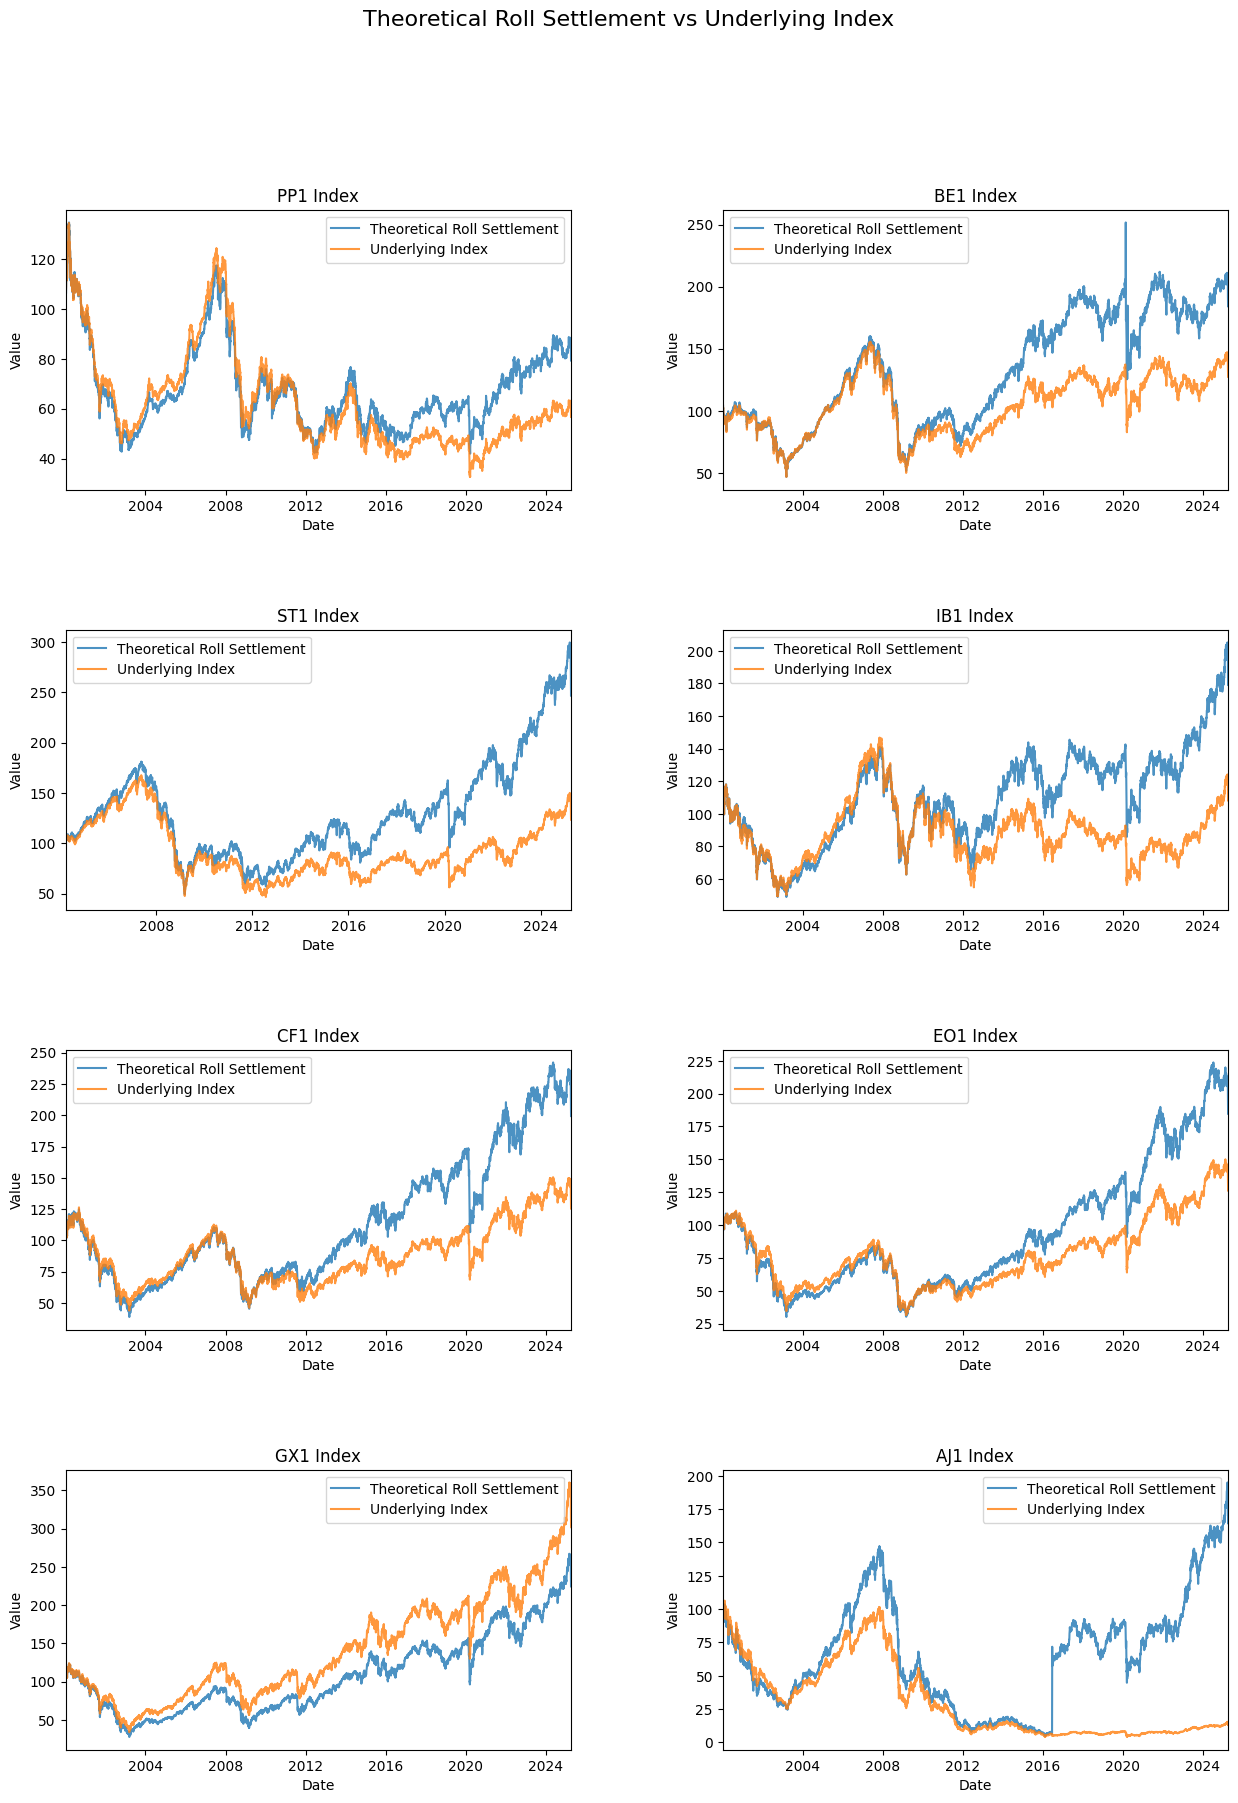

In [39]:
# Plotting the results of the theoretical roll
# VS the underlying index (fixing the start value to 100 for both)
# Each future has its own plot in a subplot
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Theoretical Roll Settlement vs Underlying Index', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, future in enumerate(futures_euroindex):
    start_date = future.get_first_data_date()
    ax = axes[idx // 2, idx % 2]
    
    # Calculate multipliers to normalize both series to the same value at start_date
    roll_settle_start_value = future.roll_settle_theoretical.loc[start_date, 'Roll value']
    underlying_start_value = future.underlying_data.loc[start_date]
    
    roll_settle_multiplier = 100 / roll_settle_start_value
    underlying_multiplier = 100 / underlying_start_value
    
    # Plot normalized time series
    ax.plot(future.roll_settle_theoretical.index, 
            future.roll_settle_theoretical['Roll value'] * roll_settle_multiplier, 
            label='Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.underlying_data.index, 
            future.underlying_data * underlying_multiplier, 
            label='Underlying Index', alpha=0.8)
    
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

plt.show()

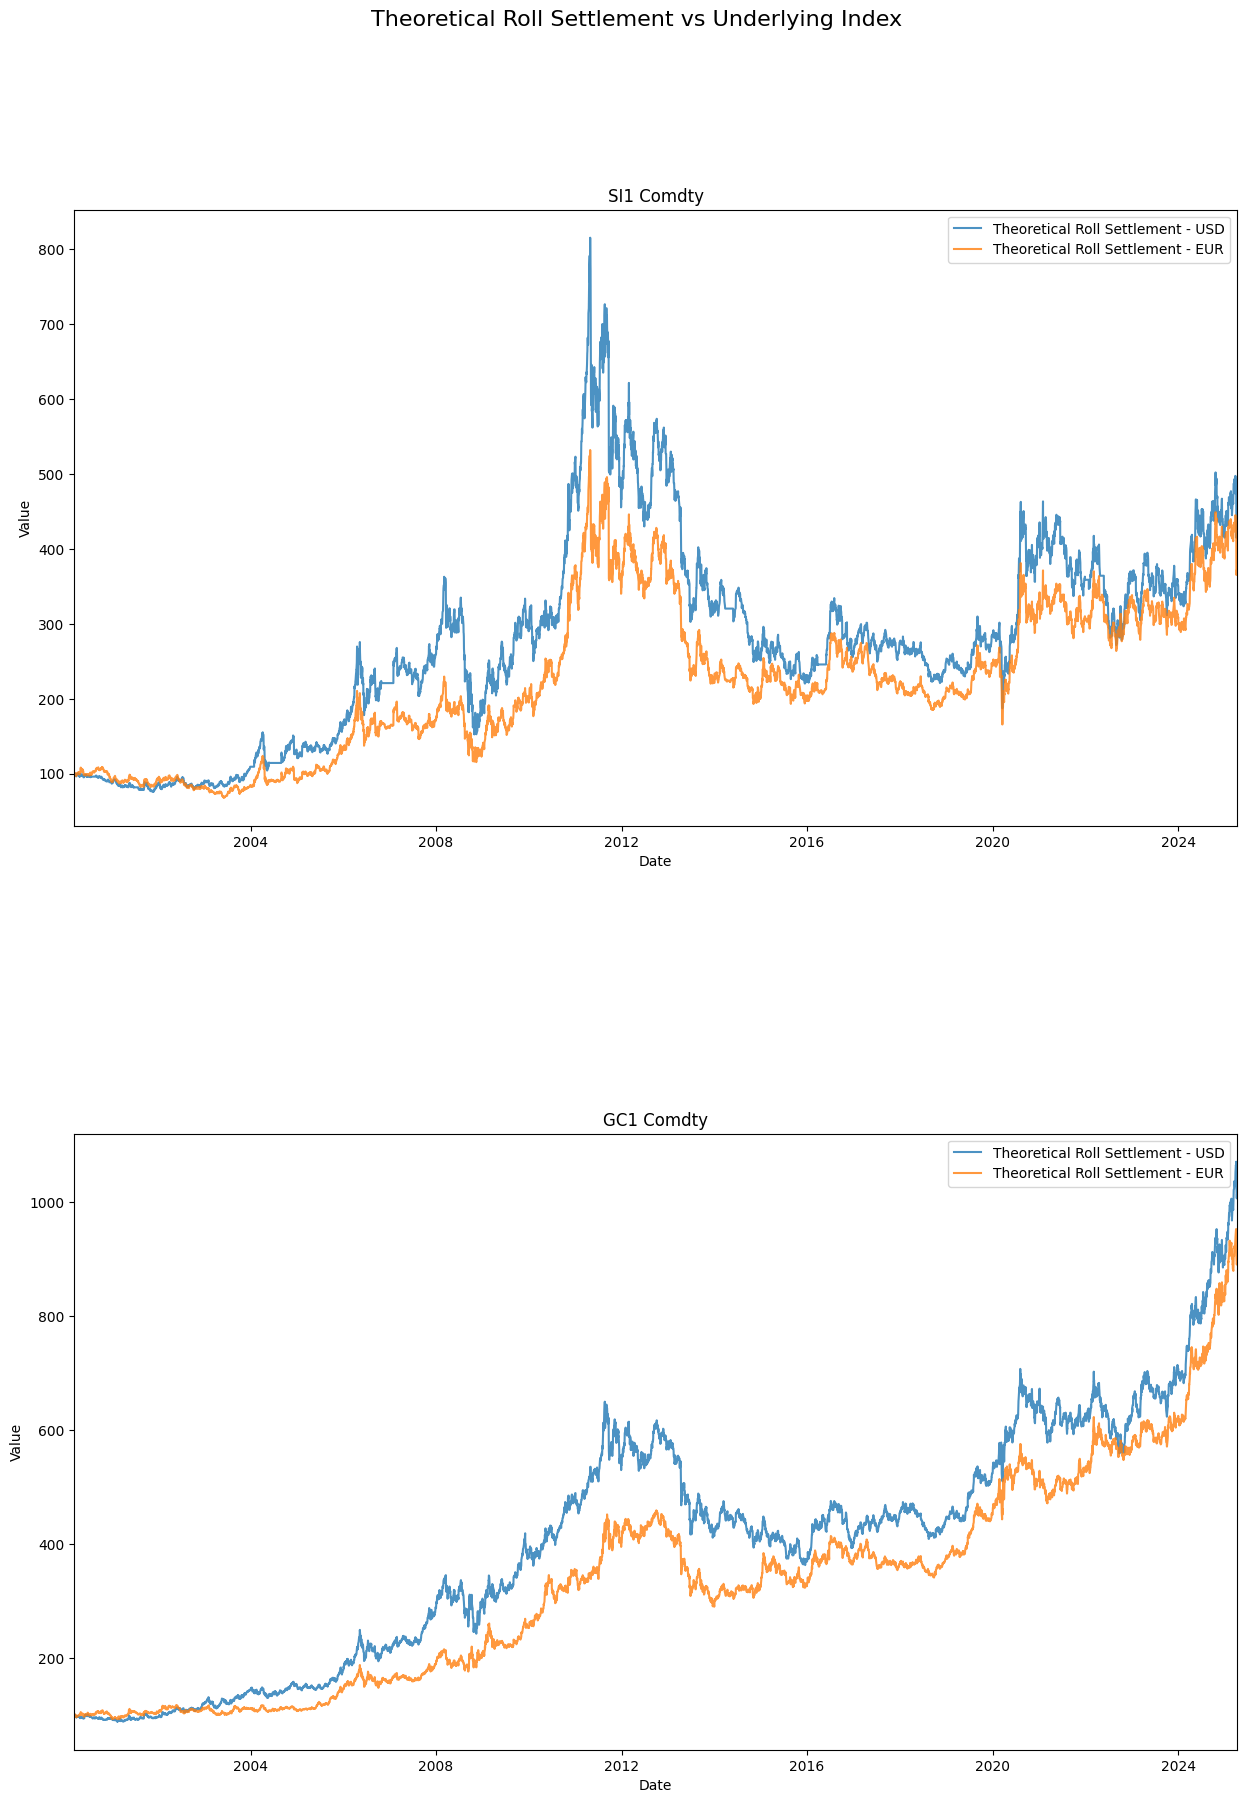

In [40]:
# Plotting the results of the theoretical roll
# For metals (there's not underlying prices)
# Here we will plot plot the value in USD and then the value in EUR in the same graph
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Theoretical Roll Settlement vs Underlying Index', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, future in enumerate(futures_metals):
    start_date = future.get_first_data_date()
    ax = axes[idx]
    
    # Calculate multipliers to normalize both series to the same value at start_date
    roll_settle_start_value = future.roll_settle_theoretical.loc[start_date, 'Roll value']
    roll_settle_multiplier = 100 / roll_settle_start_value
    
    # Plot normalized time series
    ax.plot(future.roll_settle_theoretical.index, 
            future.roll_settle_theoretical['Roll value'] * roll_settle_multiplier, 
            label='Theoretical Roll Settlement - USD', alpha=0.8)
    
    # Now getting the value in EUR
    roll_settle_start_value_eur = future.roll_settle_theoretical.loc[start_date, 'Roll value'] * future.currency_object.px_bid.loc[start_date]
    roll_settle_multiplier_eur = 100 / roll_settle_start_value_eur

    # Align px_bid to the roll_settle_theoretical index
    px_bid_aligned = future.currency_object.px_bid.reindex(future.roll_settle_theoretical.index)

    ax.plot(future.roll_settle_theoretical.index, 
            future.roll_settle_theoretical['Roll value'] * roll_settle_multiplier_eur * px_bid_aligned, 
            label='Theoretical Roll Settlement - EUR', alpha=0.8)
    
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')
    ax.legend()

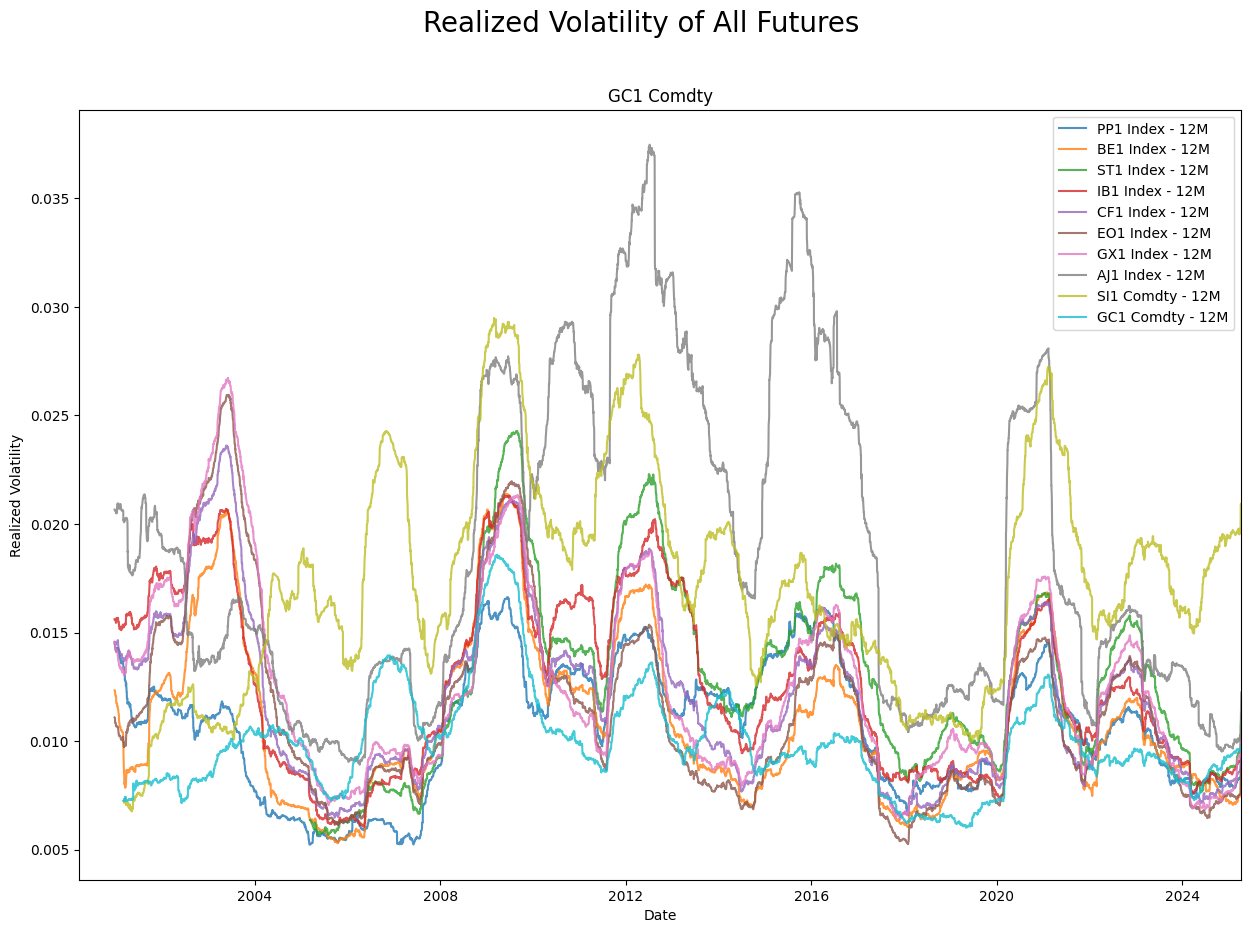

In [41]:
# Plotting all the futures realized volatilities for the roll settlement
# 12M all in one plot to compare
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Realized Volatility of All Futures', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, future in enumerate(futures_euroindex):
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL.values,
            label=f'{future.name} - 12M',
            alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
for idx, future in enumerate(futures_metals):
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL.values,
            label=f'{future.name} - 12M',
            alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

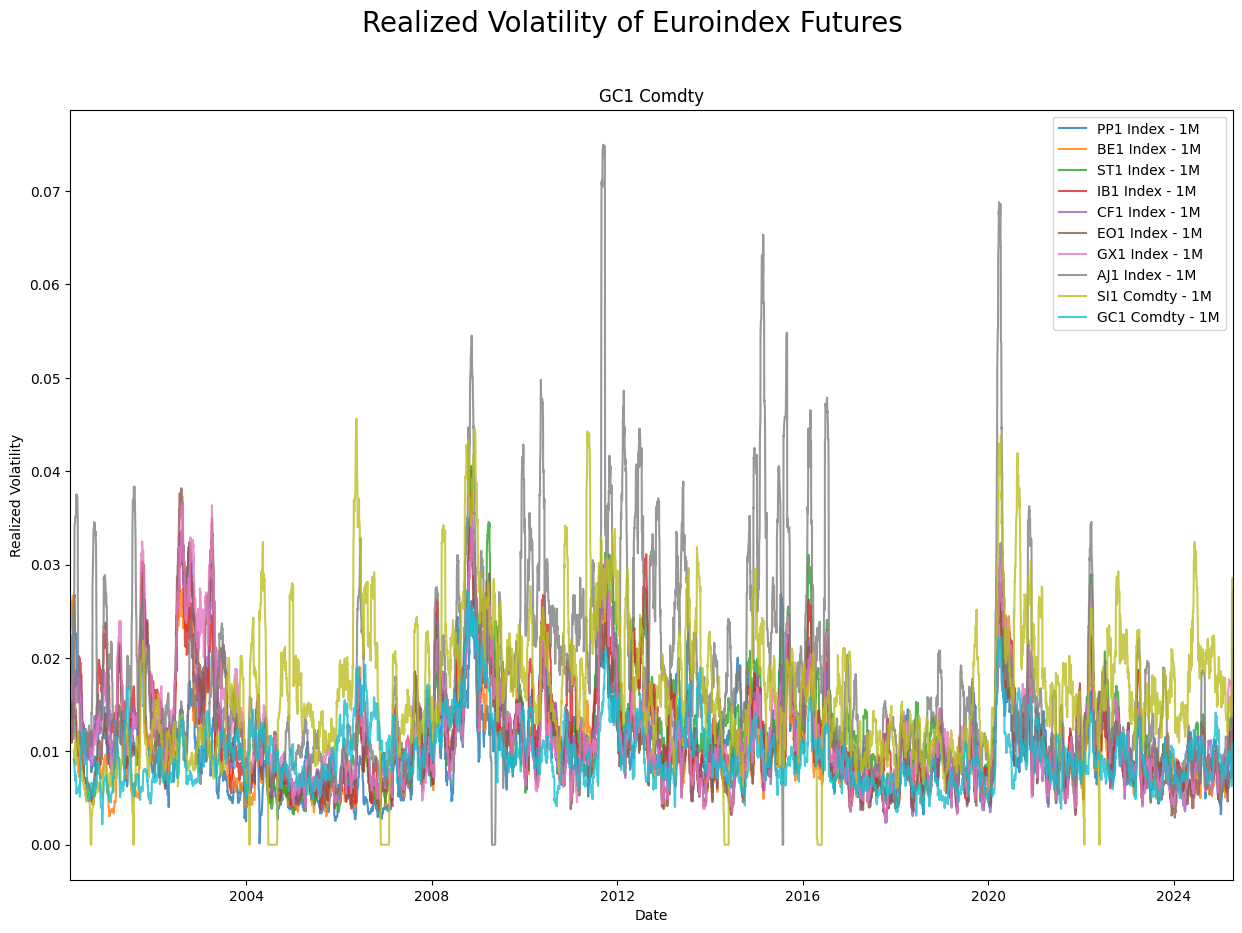

In [42]:
# Plotting all the futures realized volatilities for the roll settlement
# 1M all in one plot to compare
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('Realized Volatility of Euroindex Futures', fontsize=20)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, future in enumerate(futures_euroindex):
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL.values,
            label=f'{future.name} - 1M',
            alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
for idx, future in enumerate(futures_metals):
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL.values,
            label=f'{future.name} - 1M',
            alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

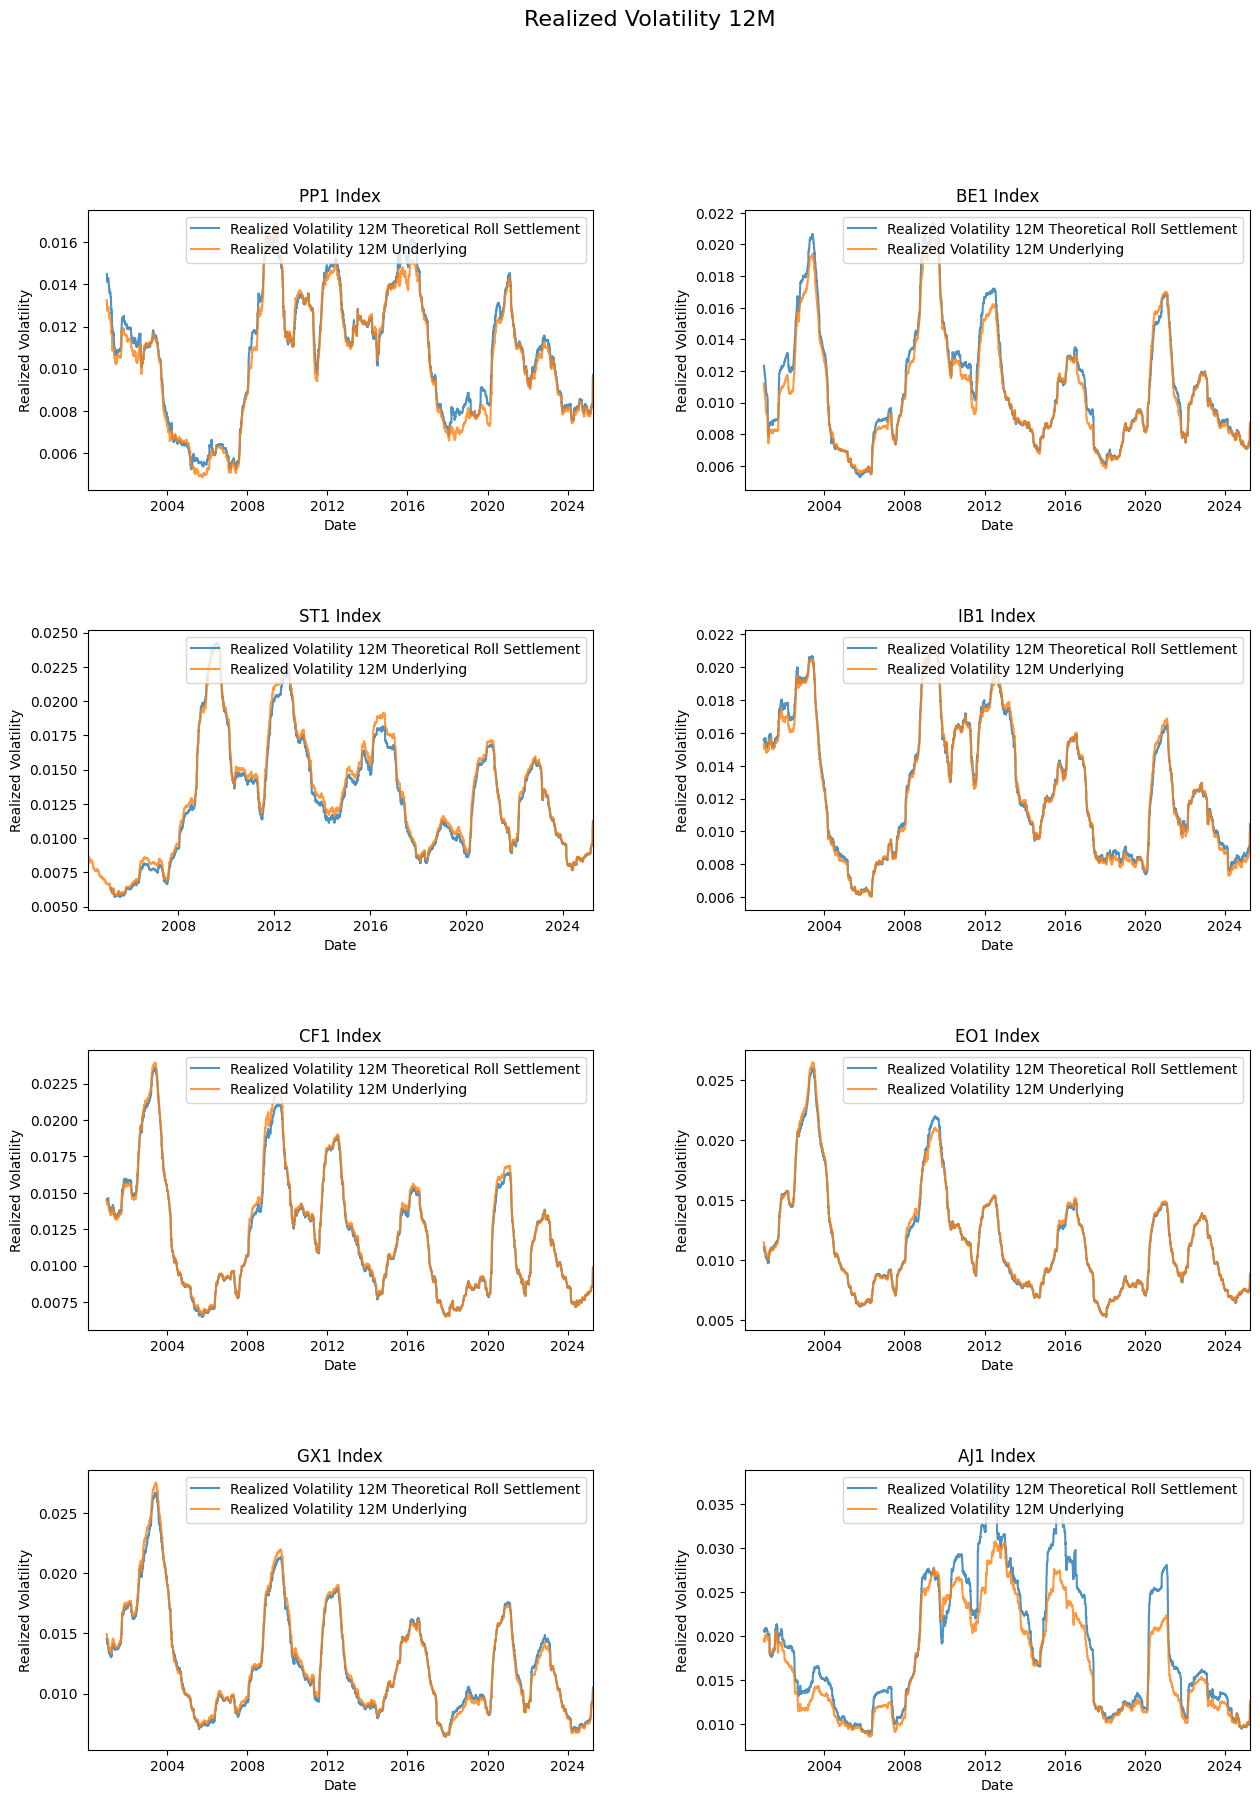

In [43]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 12M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label='Realized Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_12MROLL.index,
            future.realized_vol_undr_12MROLL, 
            label='Realized Volatility 12M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

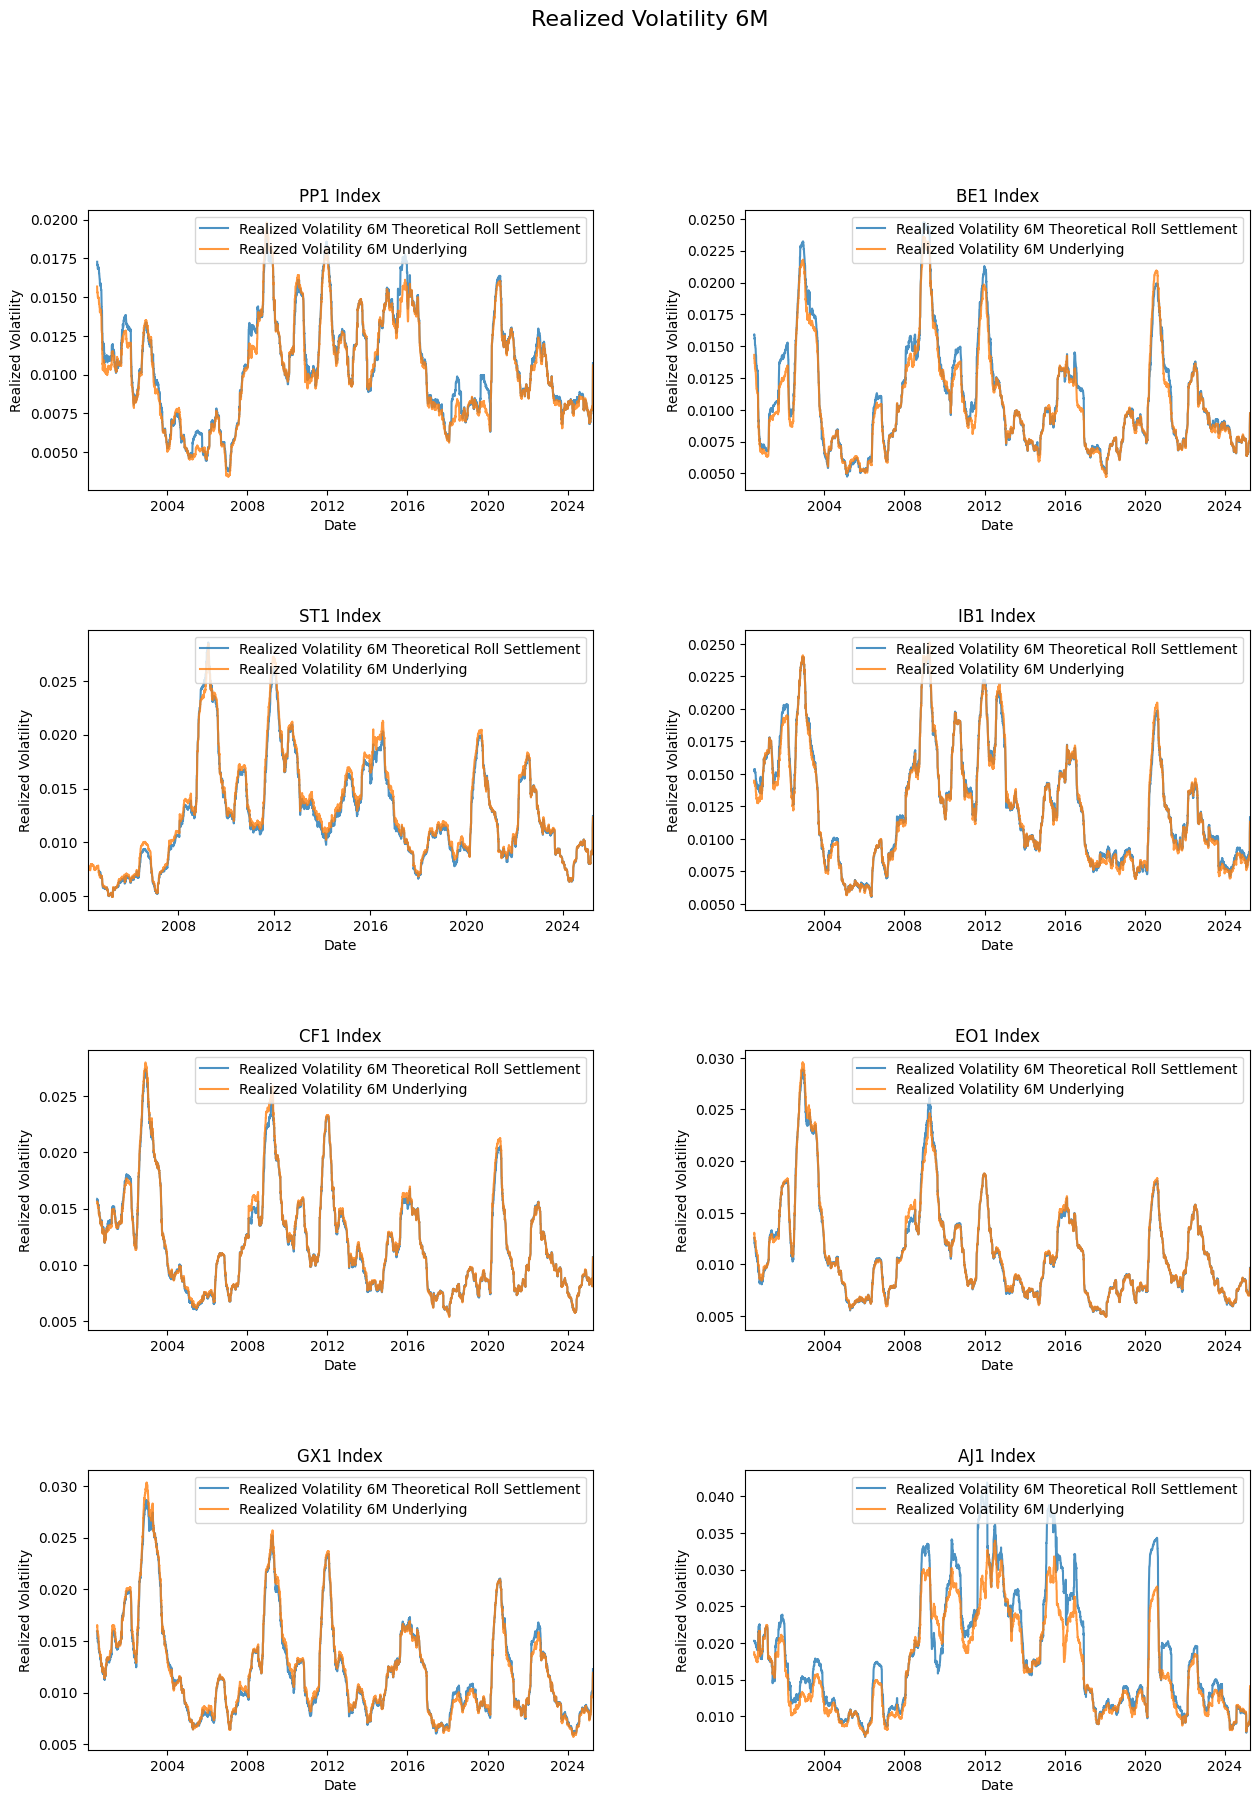

In [44]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 6M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 6M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_6MROLL.index,
            future.realized_vol_roll_6MROLL, 
            label='Realized Volatility 6M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_6MROLL.index,
            future.realized_vol_undr_6MROLL, 
            label='Realized Volatility 6M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

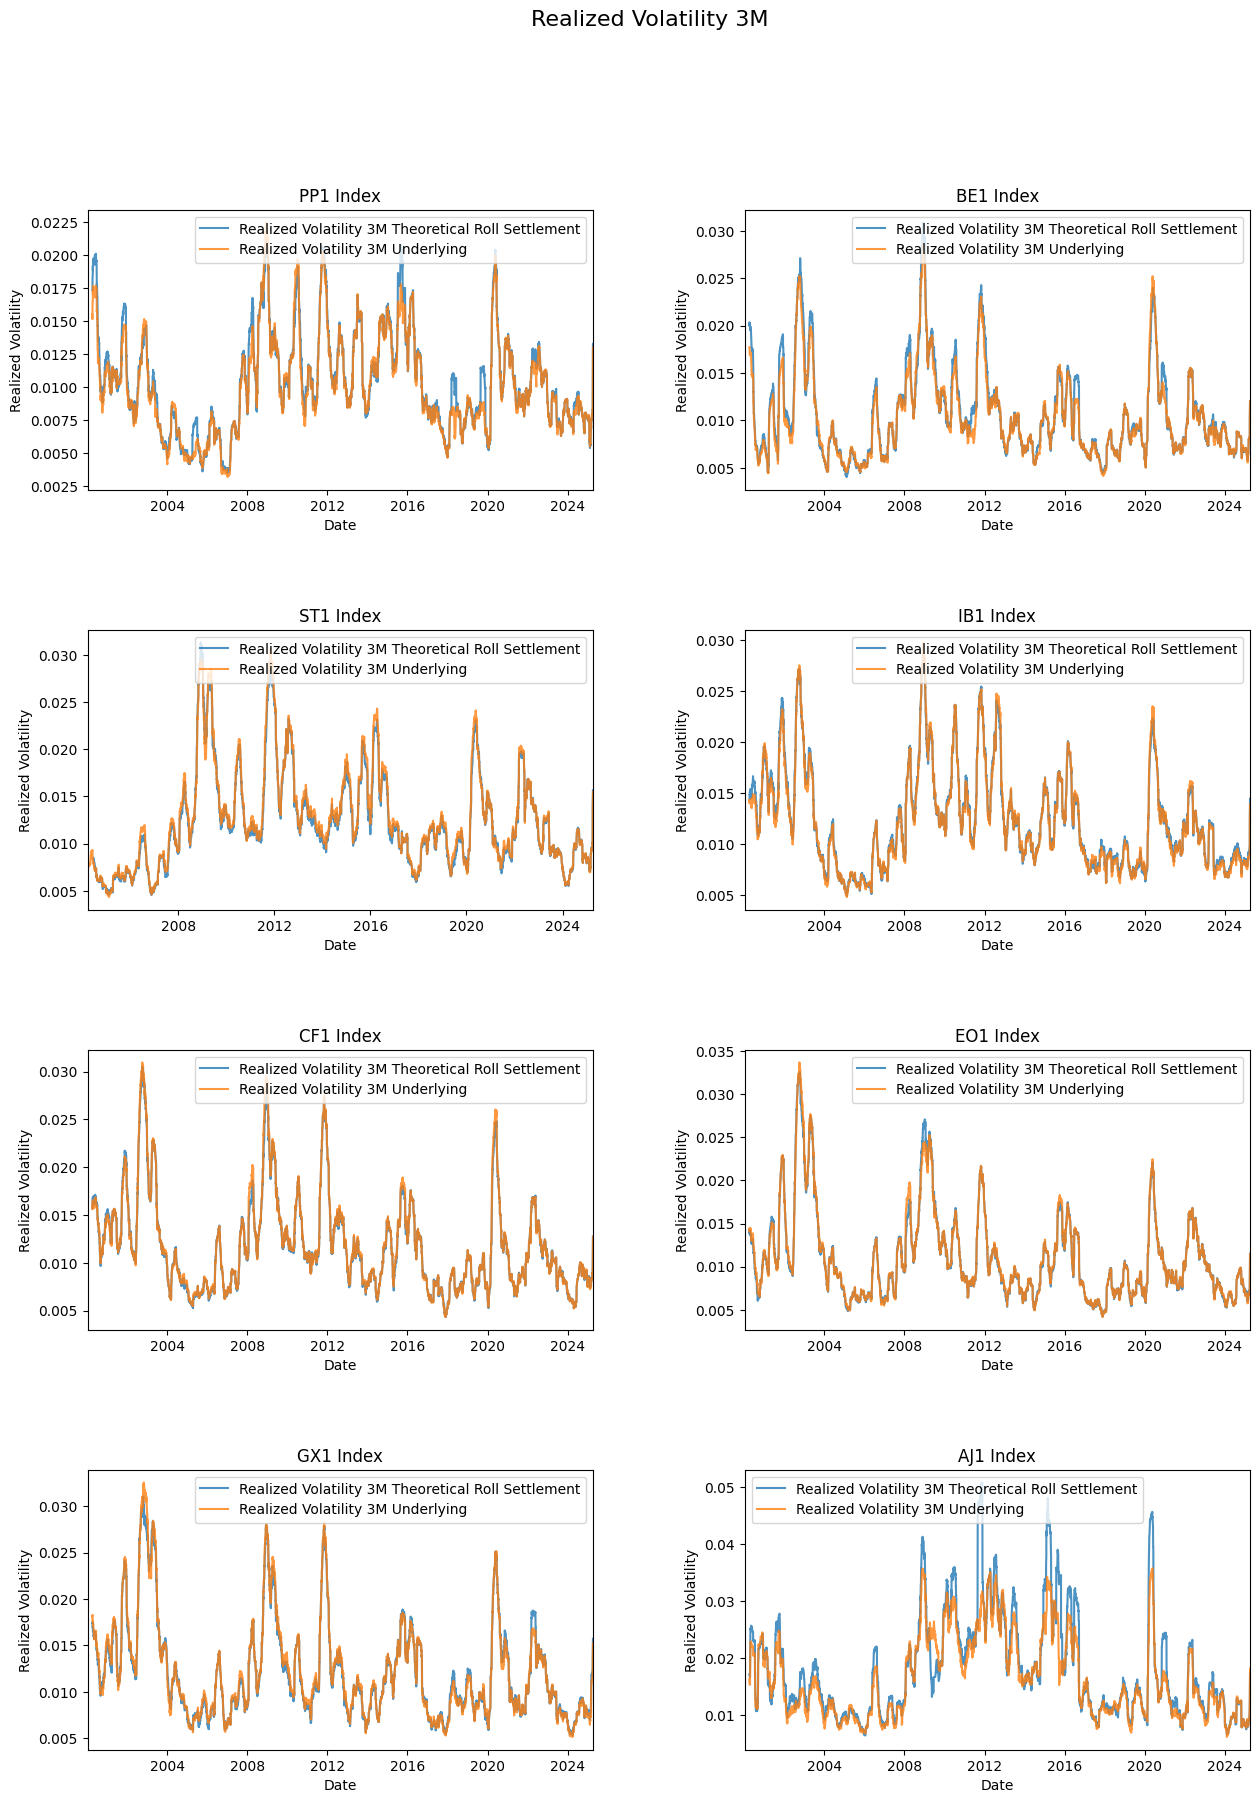

In [45]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 3M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 3M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_3MROLL.index,
            future.realized_vol_roll_3MROLL, 
            label='Realized Volatility 3M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_3MROLL.index,
            future.realized_vol_undr_3MROLL, 
            label='Realized Volatility 3M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

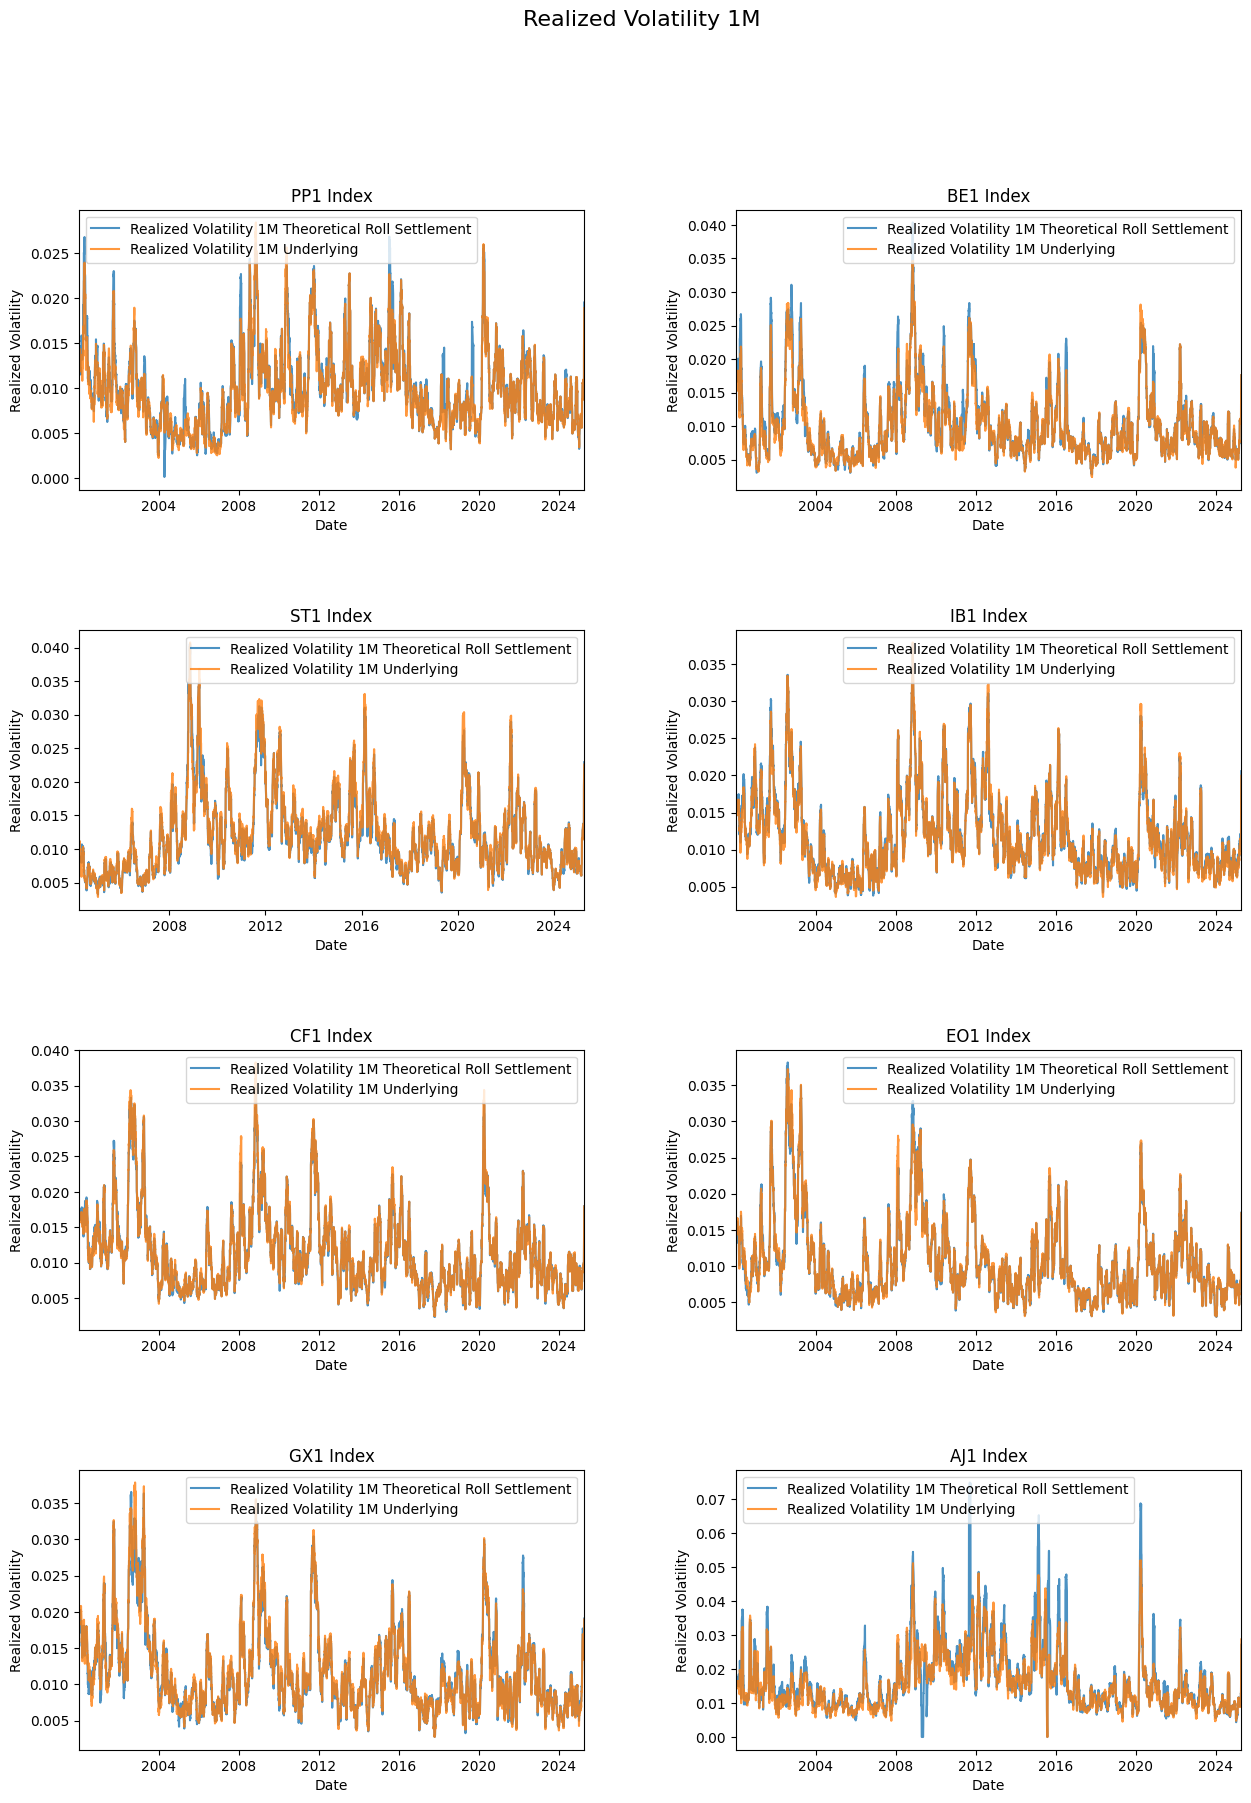

In [46]:
# Plotting the realized volatility of the theoretical roll
# With also the realized volatility of the underlying
# Here, 1M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility 1M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL, 
            label='Realized Volatility 1M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_vol_undr_1MROLL.index,
            future.realized_vol_undr_1MROLL, 
            label='Realized Volatility 1M Underlying', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

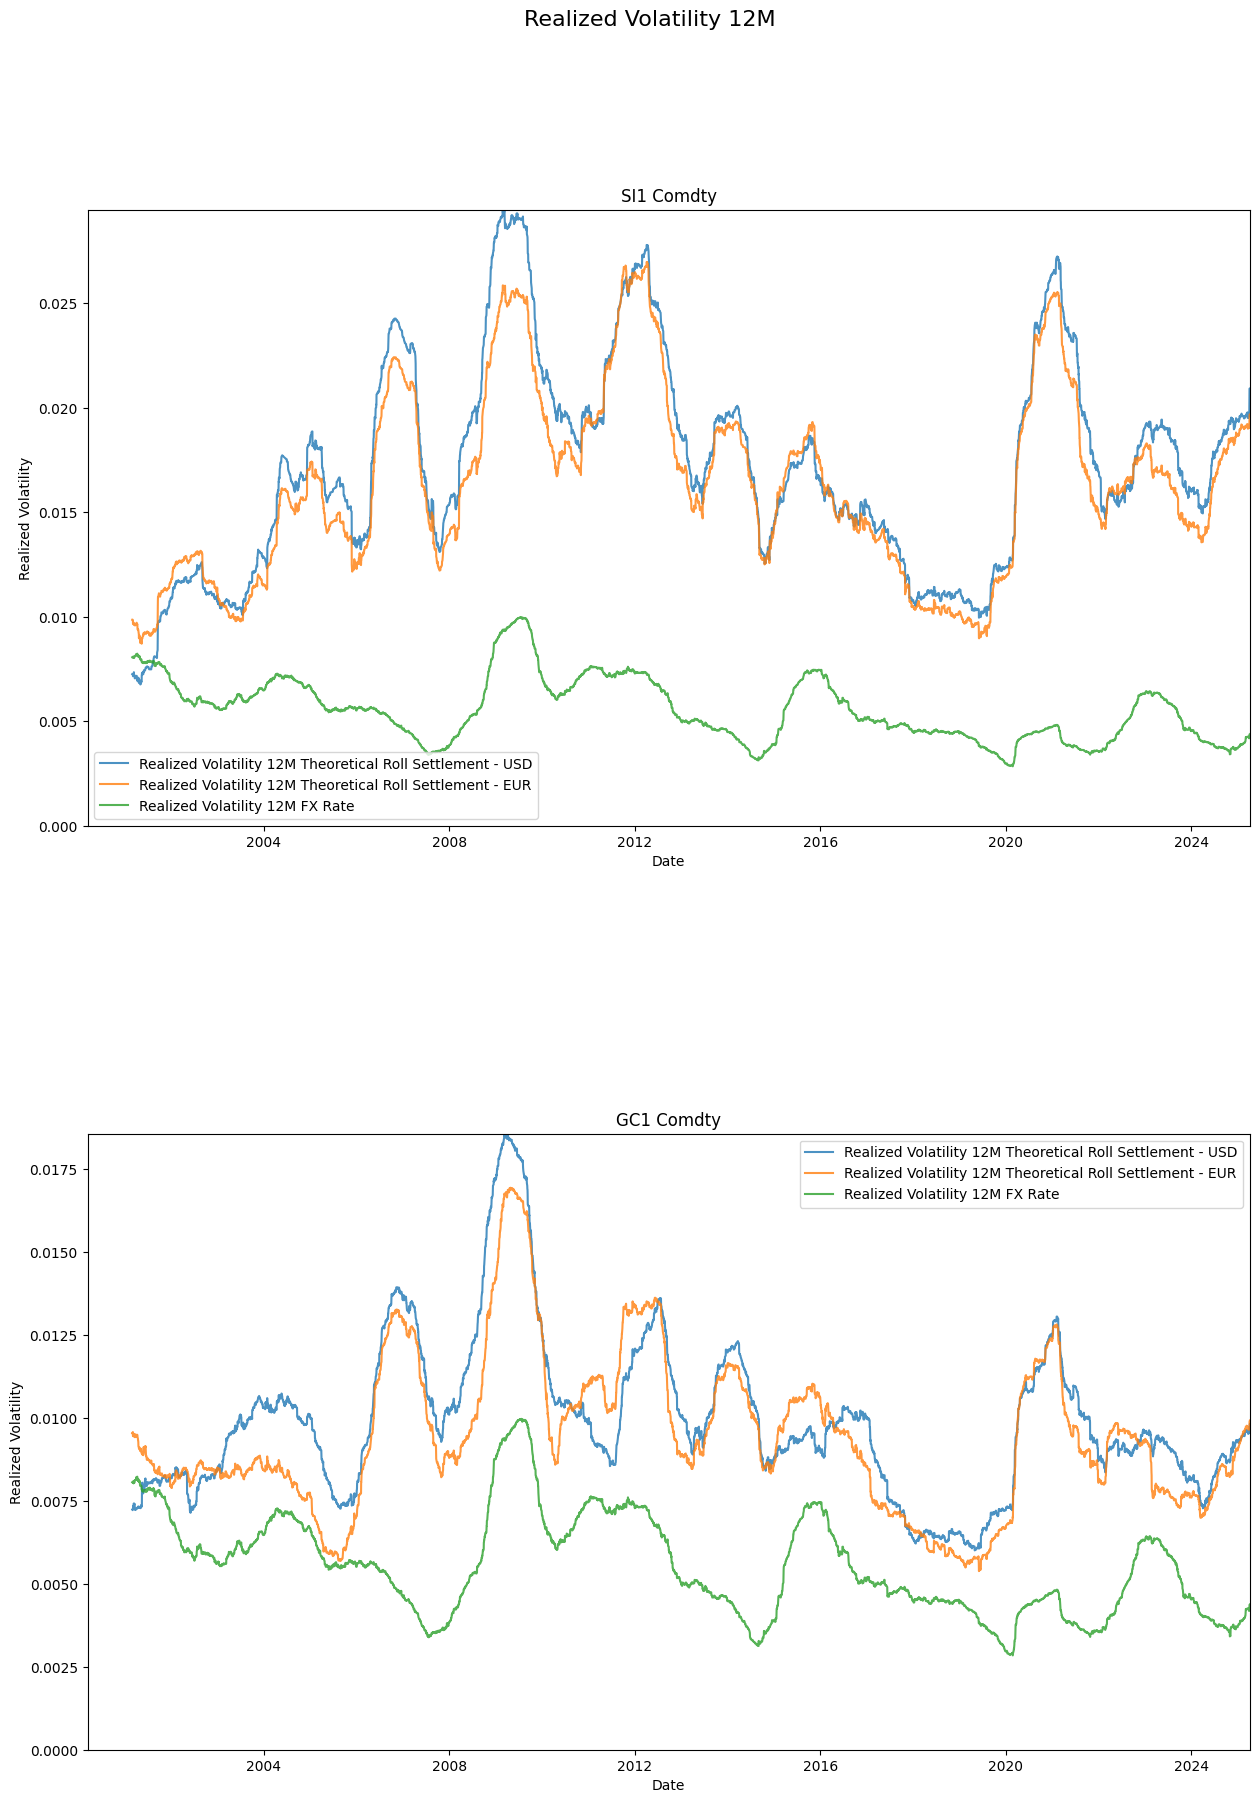

In [47]:
# For metal futures:
# Plotting the realized volatility of the theoretical roll in USD
# With also the realized volatility of the theoretical roll in EUR
# With also the realized volatility of the FX rate
# Here, 12M
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Realized Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_metals)):
    ax = axes[idx]
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label='Realized Volatility 12M Theoretical Roll Settlement - USD', alpha=0.8)
    ax.plot(future.realized_vol_price_base_currency_12MROLL.index,
            future.realized_vol_price_base_currency_12MROLL,
            label='Realized Volatility 12M Theoretical Roll Settlement - EUR', alpha=0.8)
    ax.plot(future.realized_vol_currency_12MROLL.index,
            future.realized_vol_currency_12MROLL, 
            label='Realized Volatility 12M FX Rate', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_ylim([0, max(future.realized_vol_roll_12MROLL.max(), future.realized_vol_price_base_currency_12MROLL.max(), future.realized_vol_currency_12MROLL.max())])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()


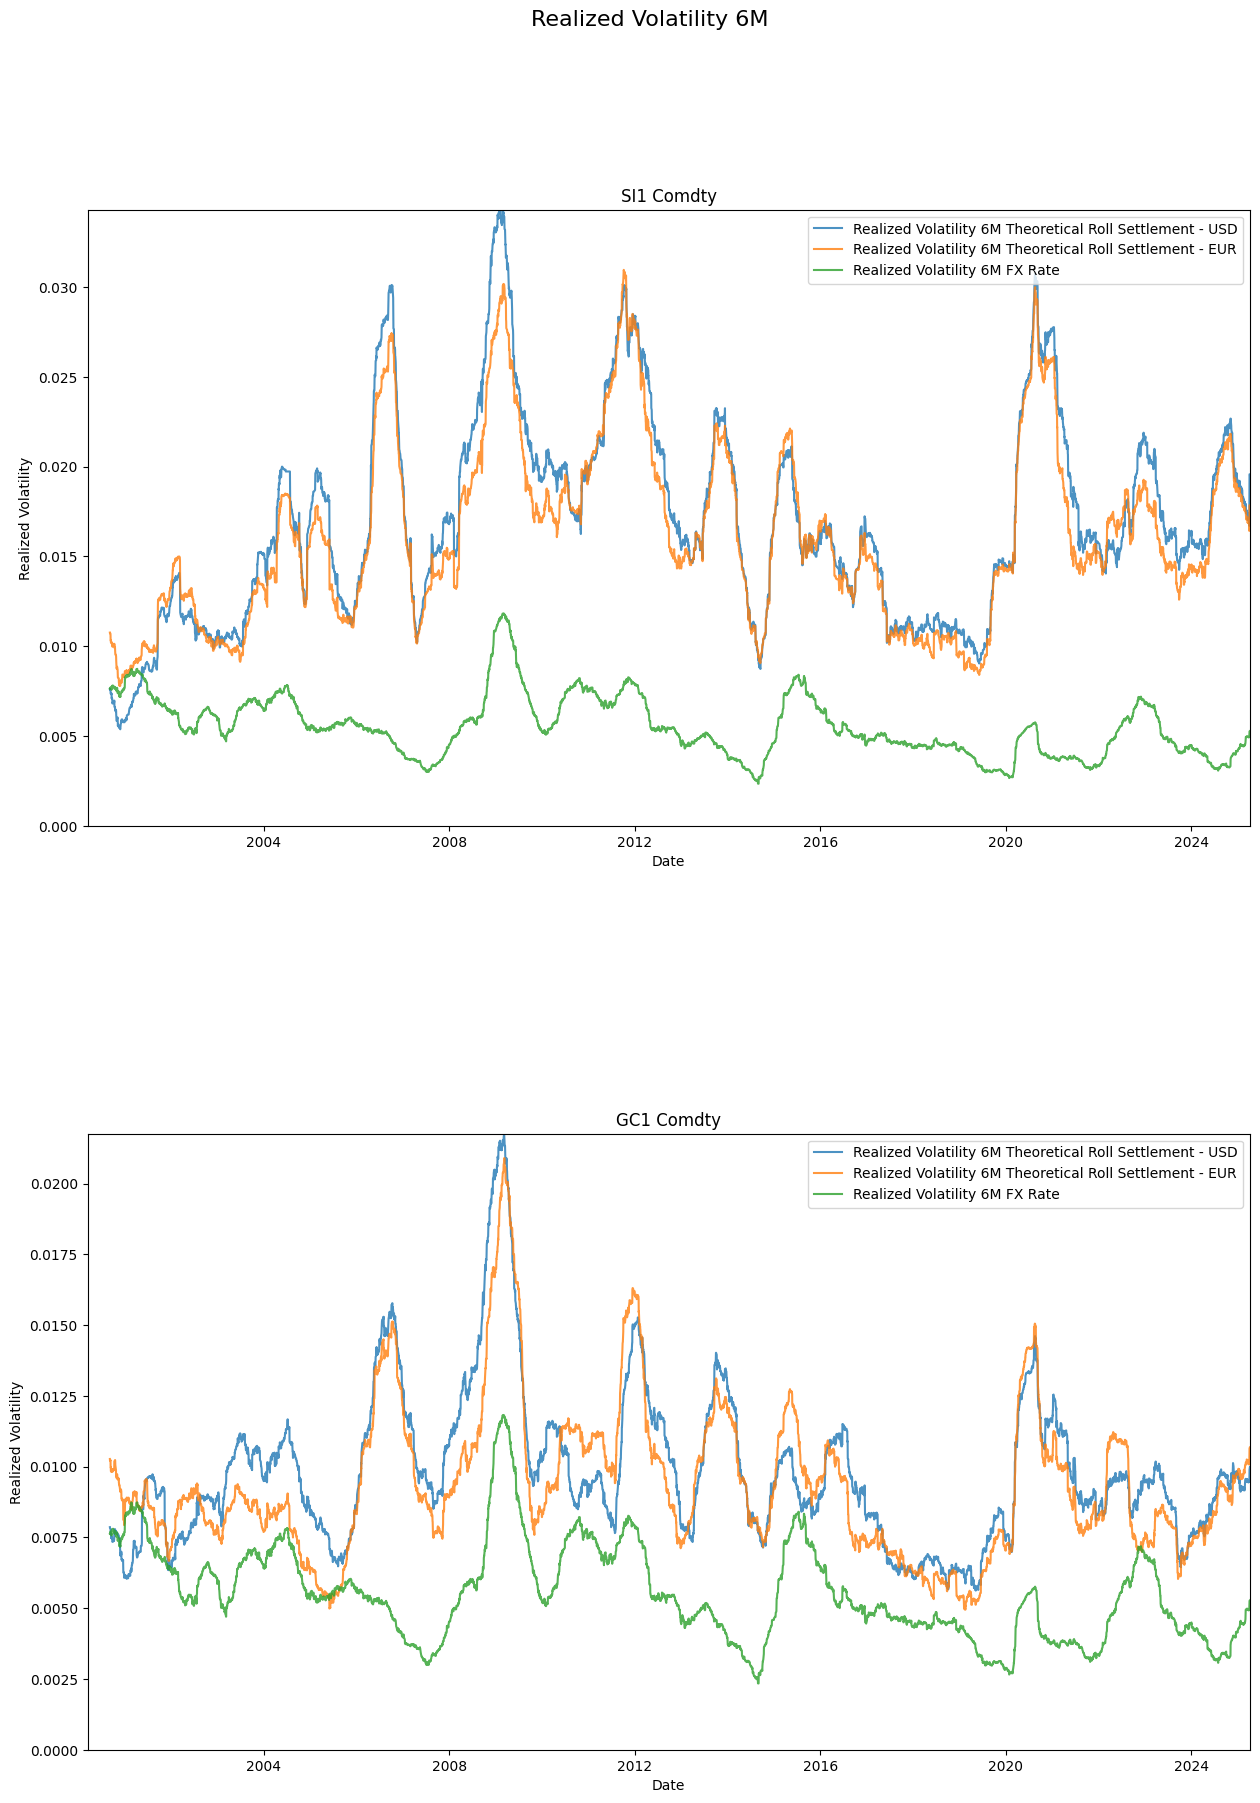

In [48]:
# For metal futures:
# Plotting the realized volatility of the theoretical roll in USD
# With also the realized volatility of the theoretical roll in EUR
# With also the realized volatility of the FX rate
# Here, 6M
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Realized Volatility 6M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_metals)):
    ax = axes[idx]
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_6MROLL, 
            label='Realized Volatility 6M Theoretical Roll Settlement - USD', alpha=0.8)
    ax.plot(future.realized_vol_price_base_currency_6MROLL.index,
            future.realized_vol_price_base_currency_6MROLL,
            label='Realized Volatility 6M Theoretical Roll Settlement - EUR', alpha=0.8)
    ax.plot(future.realized_vol_currency_6MROLL.index,
            future.realized_vol_currency_6MROLL, 
            label='Realized Volatility 6M FX Rate', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_ylim([0, max(future.realized_vol_roll_6MROLL.max(), future.realized_vol_price_base_currency_6MROLL.max(), future.realized_vol_currency_6MROLL.max())])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()

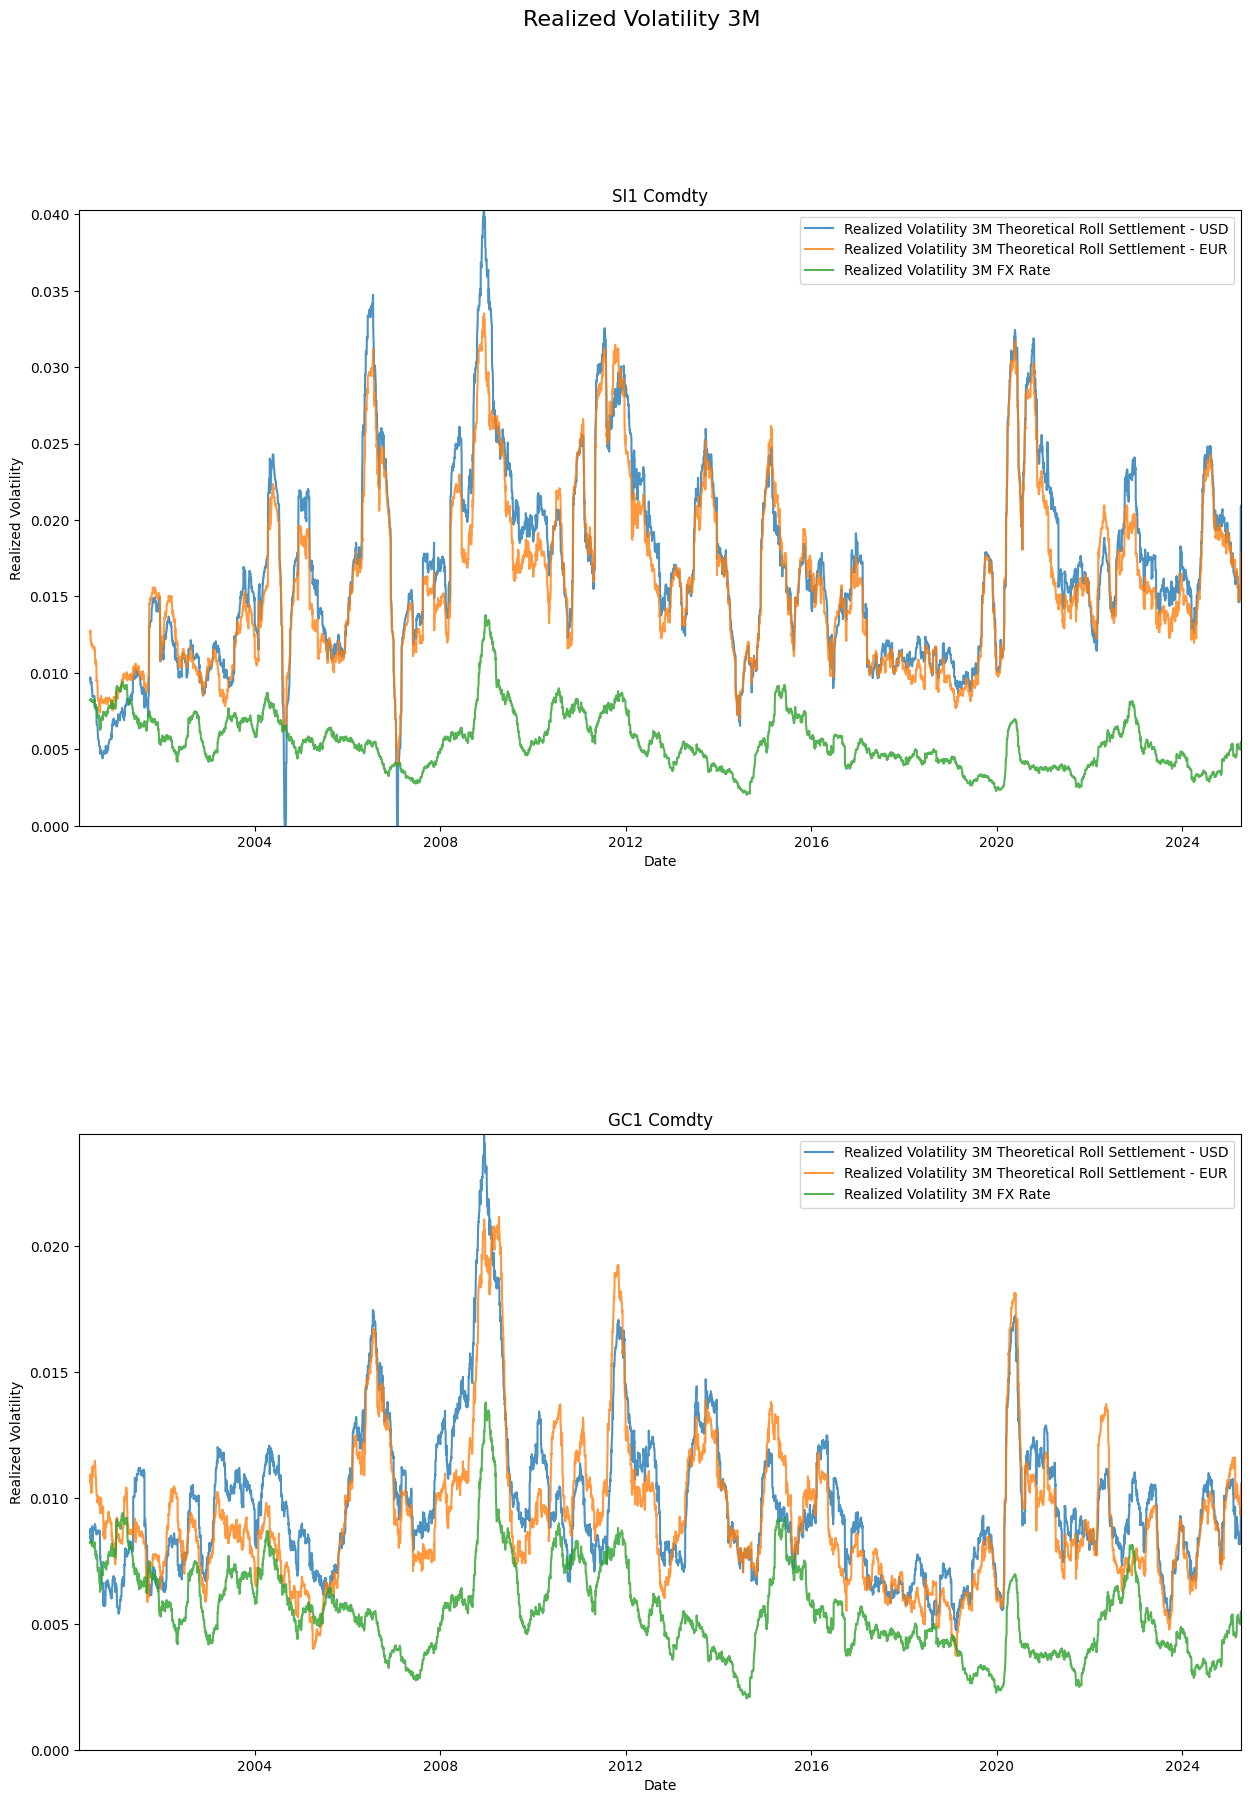

In [49]:
# For metal futures:
# Plotting the realized volatility of the theoretical roll in USD
# With also the realized volatility of the theoretical roll in EUR
# With also the realized volatility of the FX rate
# Here, 3M
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Realized Volatility 3M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_metals)):
    ax = axes[idx]
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_3MROLL, 
            label='Realized Volatility 3M Theoretical Roll Settlement - USD', alpha=0.8)
    ax.plot(future.realized_vol_price_base_currency_3MROLL.index,
            future.realized_vol_price_base_currency_3MROLL,
            label='Realized Volatility 3M Theoretical Roll Settlement - EUR', alpha=0.8)
    ax.plot(future.realized_vol_currency_3MROLL.index,
            future.realized_vol_currency_3MROLL, 
            label='Realized Volatility 3M FX Rate', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_ylim([0, max(future.realized_vol_roll_3MROLL.max(), future.realized_vol_price_base_currency_3MROLL.max(), future.realized_vol_currency_3MROLL.max())])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()

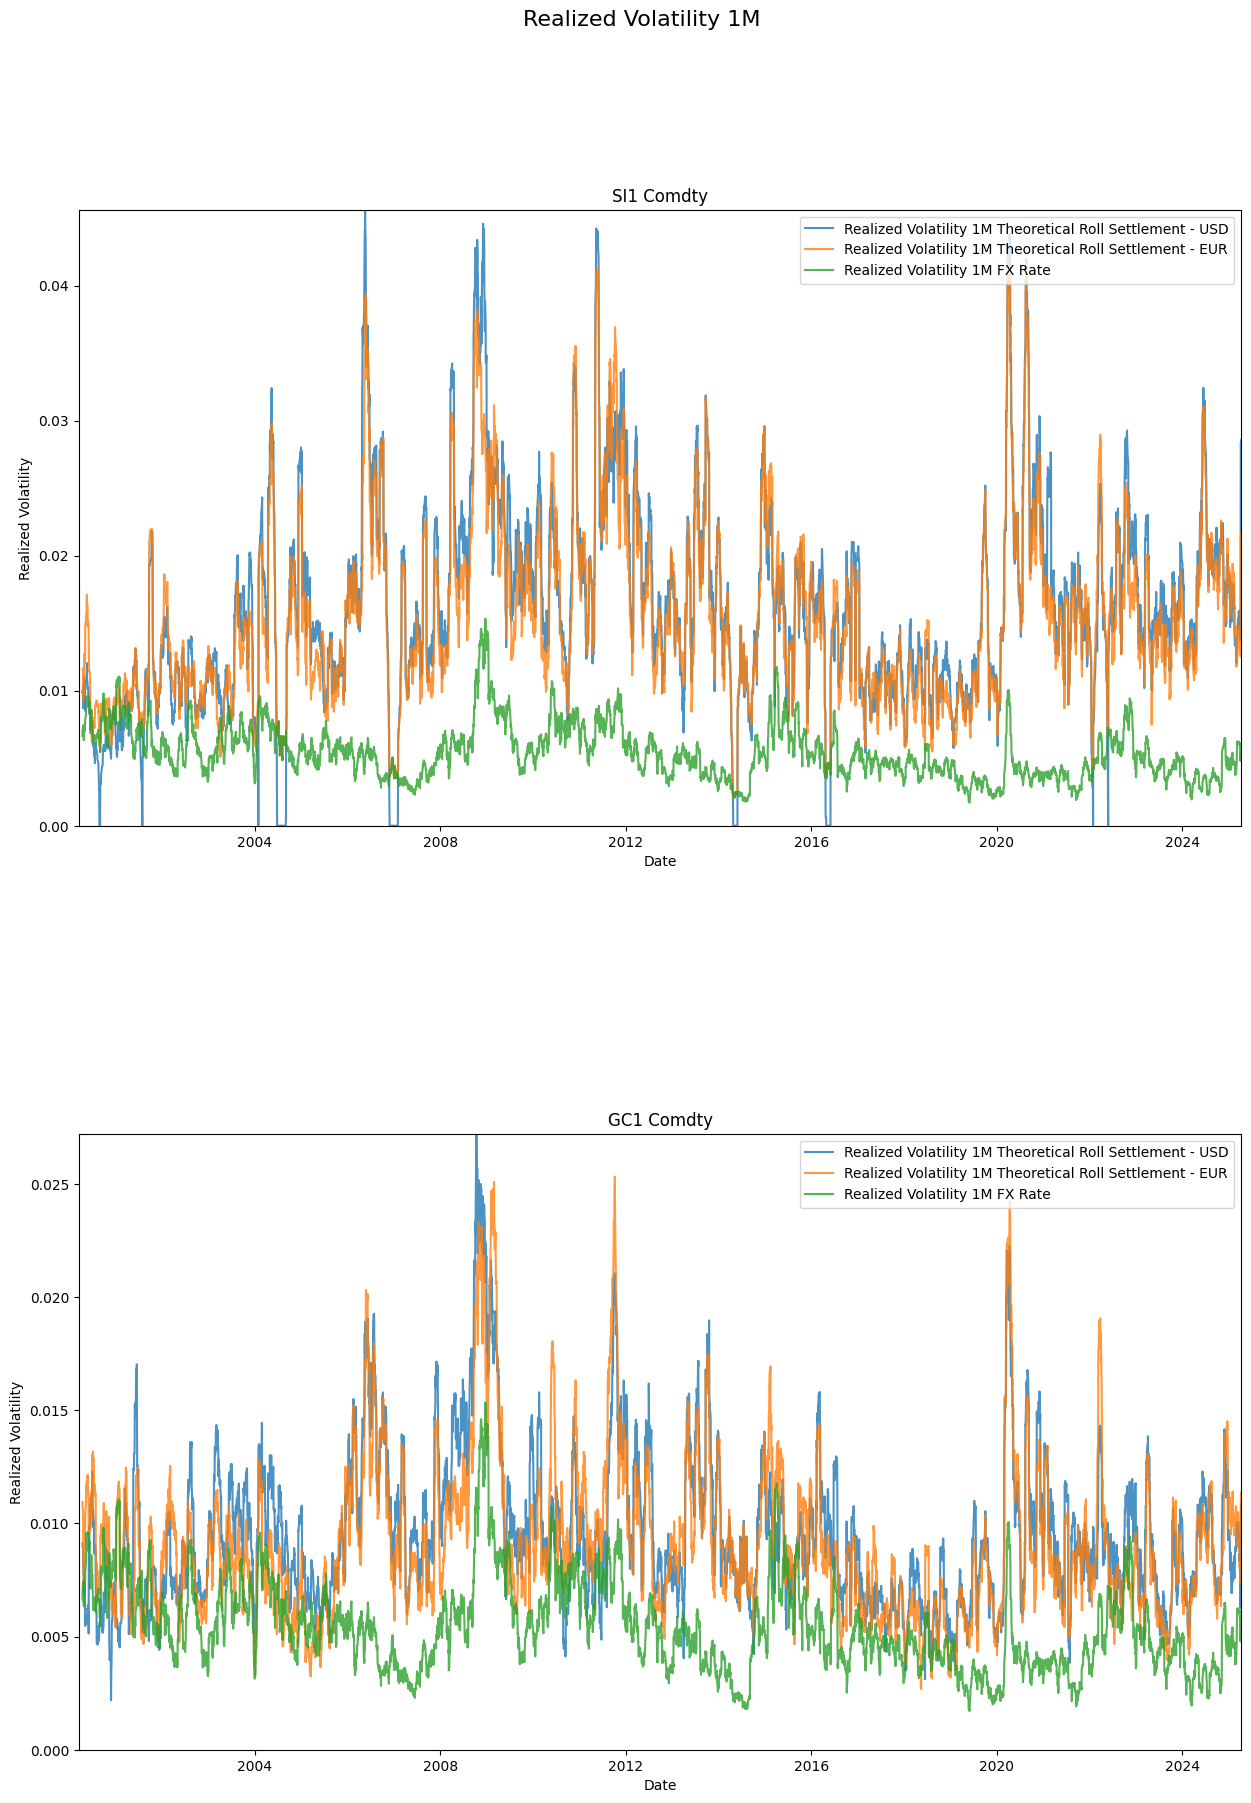

In [50]:
# For metal futures:
# Plotting the realized volatility of the theoretical roll in USD
# With also the realized volatility of the theoretical roll in EUR
# With also the realized volatility of the FX rate
# Here, 1M
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Realized Volatility 1M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_metals)):
    ax = axes[idx]
    ax.plot(future.realized_vol_roll_1MROLL.index,
            future.realized_vol_roll_1MROLL, 
            label='Realized Volatility 1M Theoretical Roll Settlement - USD', alpha=0.8)
    ax.plot(future.realized_vol_price_base_currency_1MROLL.index,
            future.realized_vol_price_base_currency_1MROLL,
            label='Realized Volatility 1M Theoretical Roll Settlement - EUR', alpha=0.8)
    ax.plot(future.realized_vol_currency_1MROLL.index,
            future.realized_vol_currency_1MROLL, 
            label='Realized Volatility 1M FX Rate', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_ylim([0, max(future.realized_vol_roll_1MROLL.max(), future.realized_vol_price_base_currency_1MROLL.max(), future.realized_vol_currency_1MROLL.max())])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

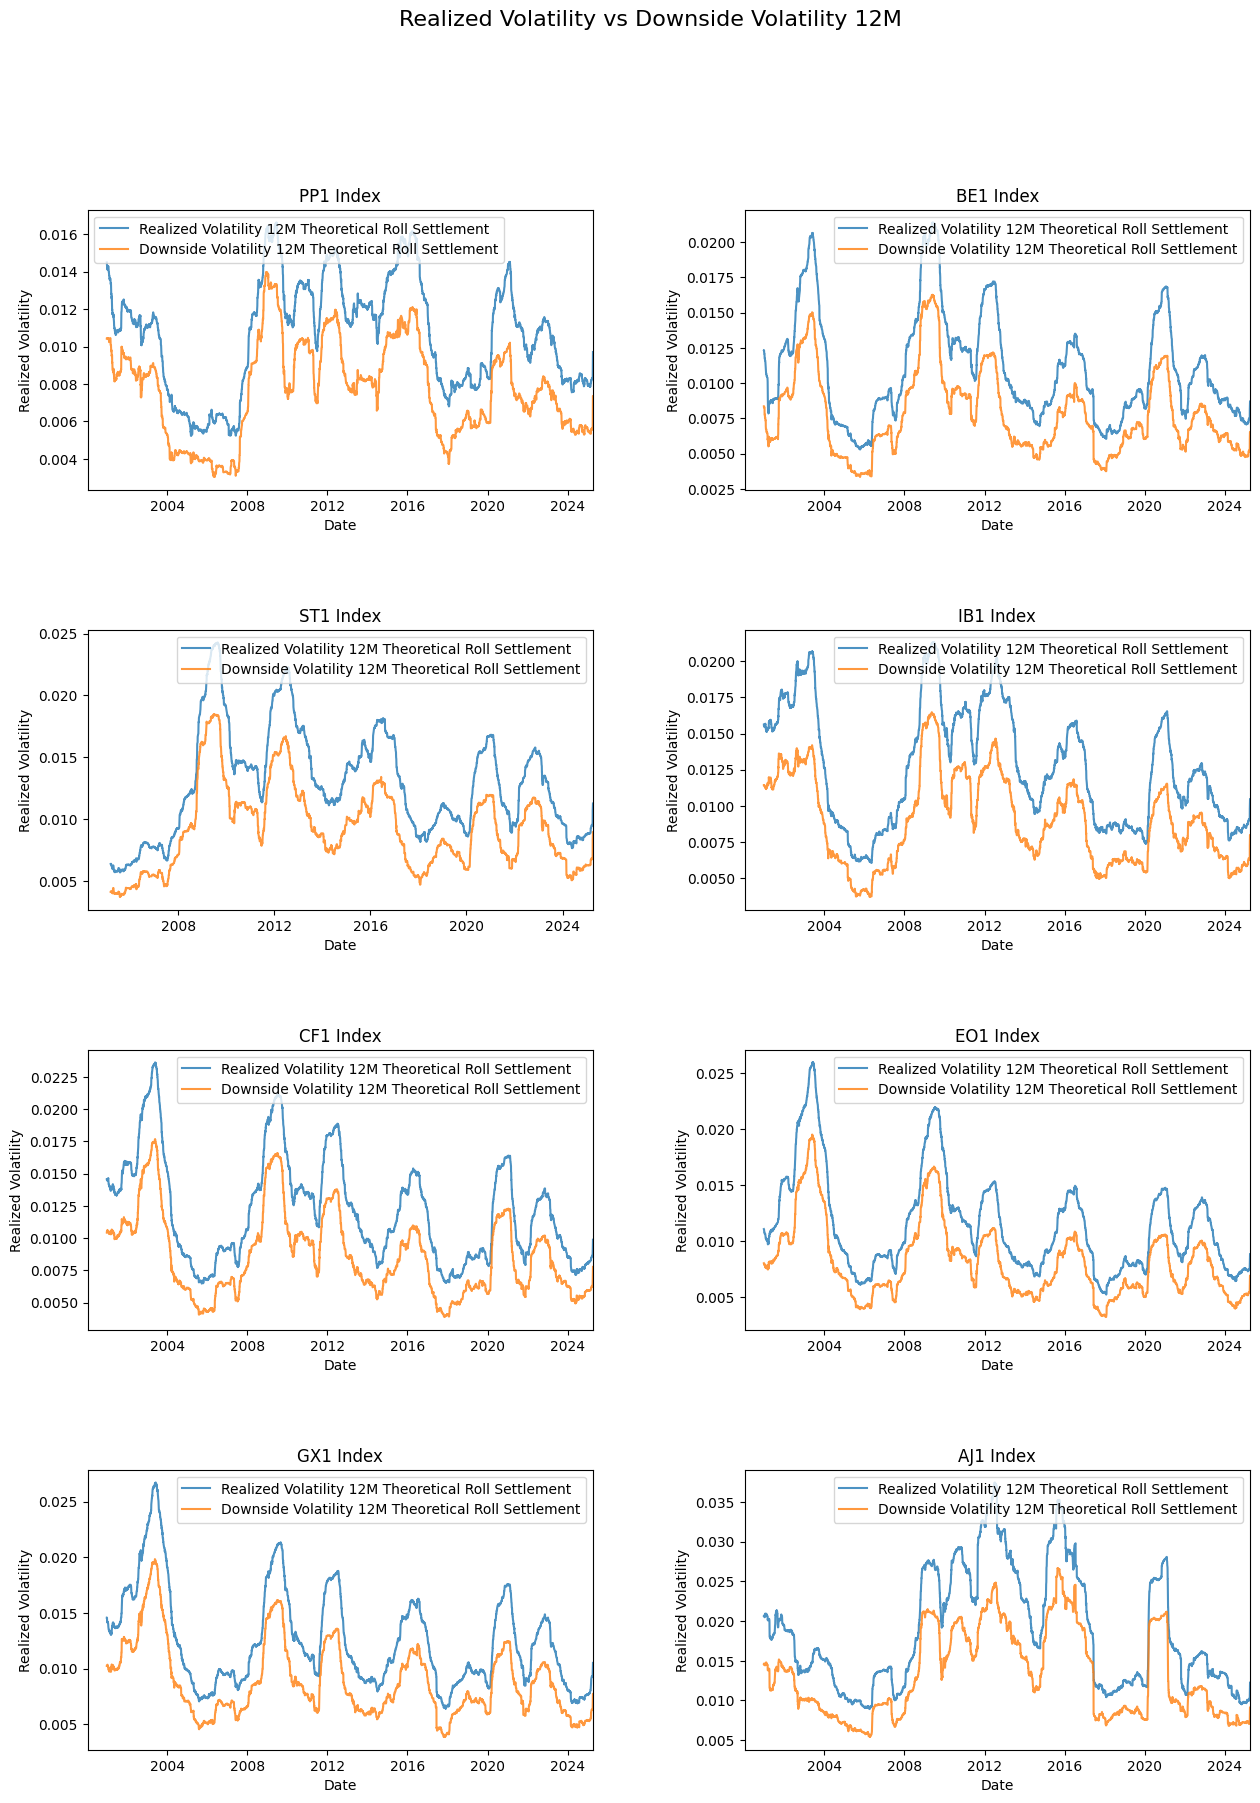

In [51]:
# Now for all futures we plot the realized volatility vs the downside volatility
# Here, 12M
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Realized Volatility vs Downside Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_euroindex)):
    ax = axes[idx // 2, idx % 2]
    
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label='Realized Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_downside_vol_roll_12MROLL.index,
            future.realized_downside_vol_roll_12MROLL, 
            label='Downside Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
    
# Eliminating the axes that are not used
for i in range(idx + 1, 8):
    fig.delaxes(axes[i // 2, i % 2])
plt.show()

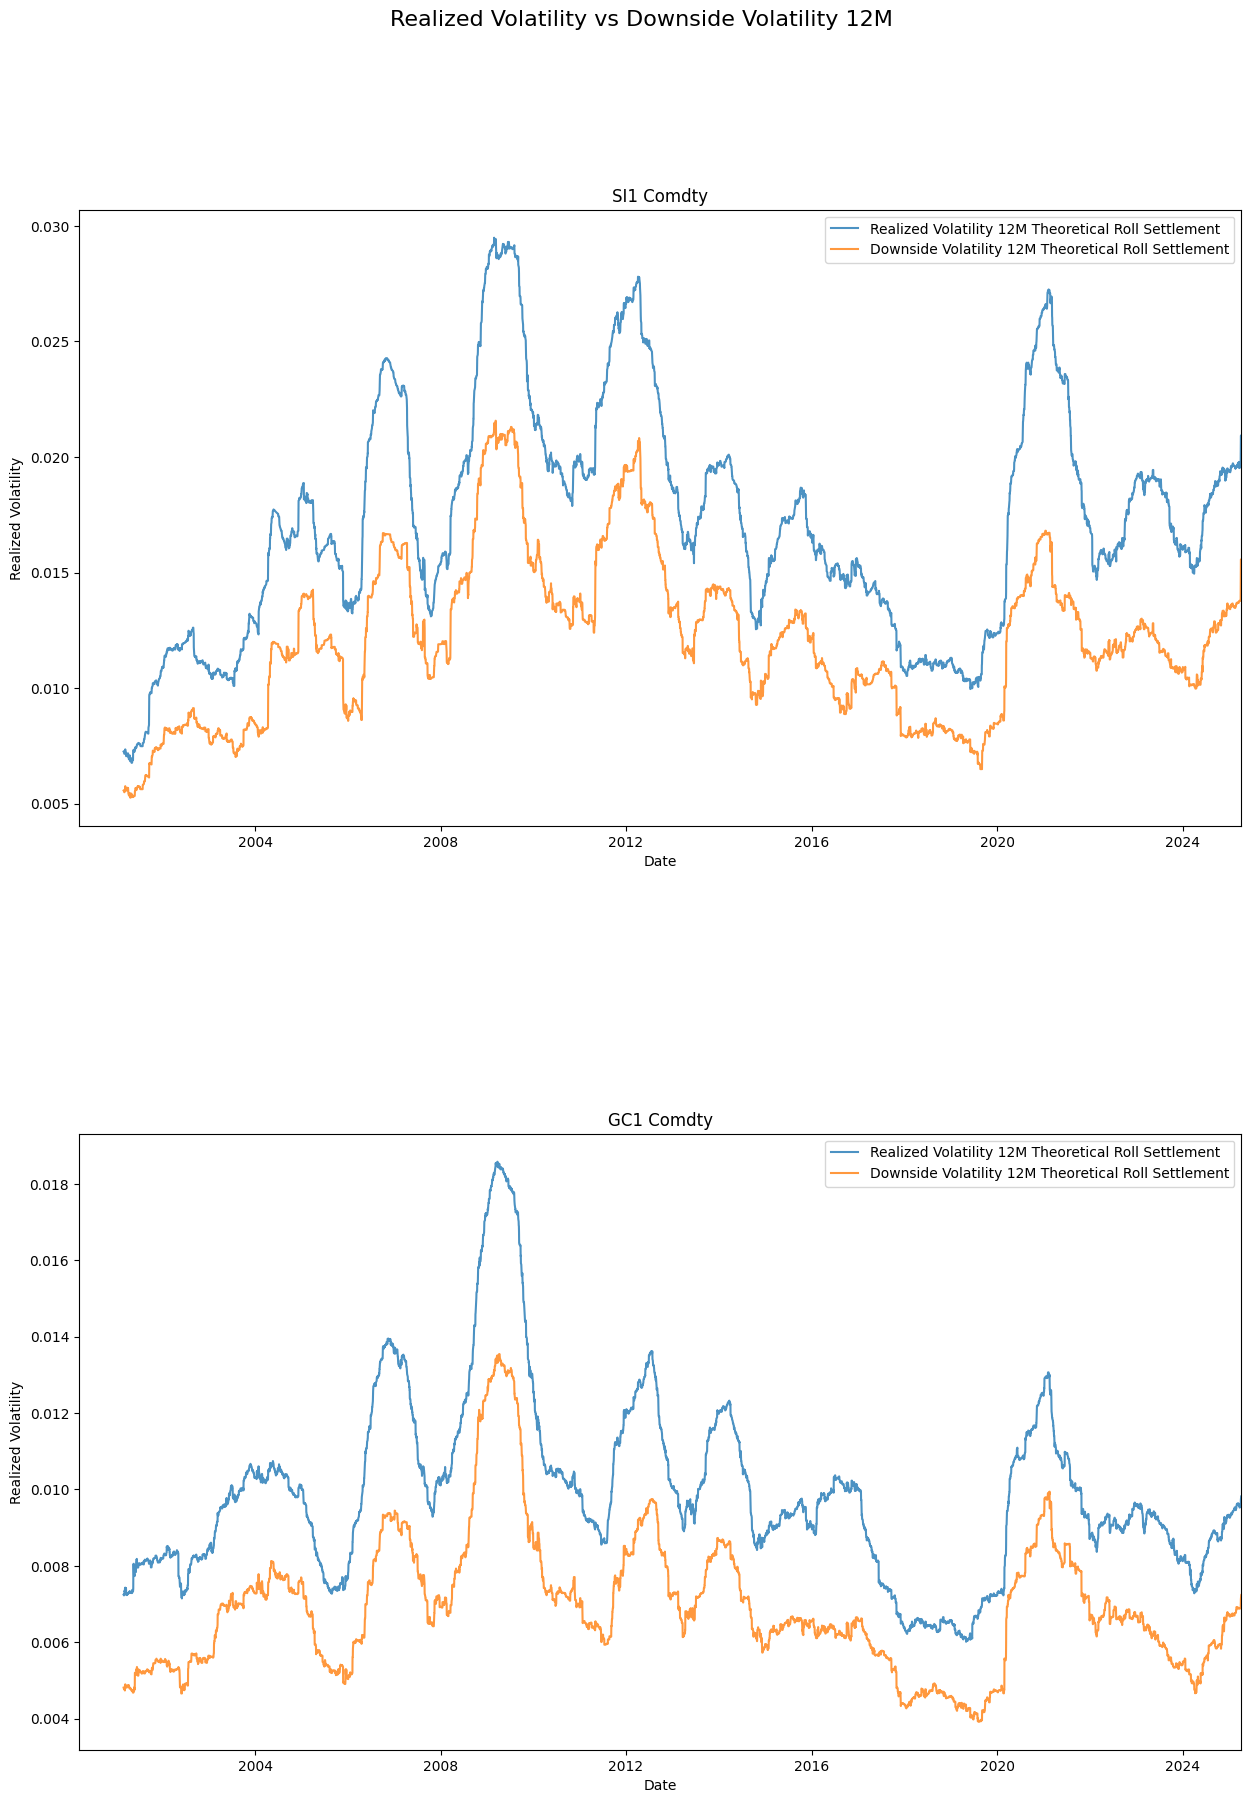

In [52]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
fig.suptitle('Realized Volatility vs Downside Volatility 12M', fontsize=16)
fig.subplots_adjust(hspace=0.5, wspace=0.3)
for idx, (i, future) in enumerate(enumerate(futures_metals)):
    ax = axes[idx]
    
    ax.plot(future.realized_vol_roll_12MROLL.index,
            future.realized_vol_roll_12MROLL, 
            label='Realized Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.plot(future.realized_downside_vol_roll_12MROLL.index,
            future.realized_downside_vol_roll_12MROLL, 
            label='Downside Volatility 12M Theoretical Roll Settlement', alpha=0.8)
    ax.set_xlim([future.get_first_data_date(), future.roll_settle_theoretical.index[-1]])
    ax.set_title(future.name)
    ax.set_xlabel('Date')
    ax.set_ylabel('Realized Volatility')
    ax.legend()
plt.show()

In [53]:
# For now eliminating Greece from futures
futures_euroindex = [future for future in futures_euroindex if future.name != 'AJ1 Index']

In [54]:
# All futures, without Greece, but with metals
futures_all = futures_euroindex + futures_metals

In [55]:
# Defining a volatility managed strategy
# Inverse variance weighting and also one equal weight
strategy_vol = pb.Strategy(name='Volatility managed - test', futures=futures_all, strategy_type='INVERSE_VARIANCE', base_currency='EUR', date_delta=10)
strategy_ew = pb.Strategy(name='Equal weighted - test', futures=futures_all, strategy_type='EQUAL_WEIGHTED', base_currency='EUR', date_delta=10)

In [56]:
# Getting the first date of the latest starting strategy
sim_vol_managed_1MREBAL_12MEST_NORMVOL = strategy_vol.simulate_strategy_theoretical(strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='12M', volatility_method= 'REALIZED_VOL')
first_date = sim_vol_managed_1MREBAL_12MEST_NORMVOL['Parameters']['Start date'].values[0]

In [57]:
sim_vol_managed_1MREBAL_12MEST_NORMVOL['Parameters']['End date']

2005-03-11   2025-04-09
Name: End date, dtype: datetime64[ns]

In [58]:
max_attempts = 7
success = False

simulations = []
for offset in range(0, max_attempts):
    try:
        current_start_date = first_date + pd.Timedelta(days=offset)
        # For inverse variance using realized vol 
        sim_vol_1MREBAL_1MEST_NORMVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='1M', volatility_method= 'REALIZED_VOL', start_date=current_start_date)
        sim_vol_1MREBAL_3MEST_NORMVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='3M', volatility_method= 'REALIZED_VOL', start_date=current_start_date)
        sim_vol_1MREBAL_6MEST_NORMVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='6M', volatility_method= 'REALIZED_VOL', start_date=current_start_date)
        sim_vol_1MREBAL_12MEST_NORMVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='12M', volatility_method= 'REALIZED_VOL', start_date=current_start_date)
        
        # For inverse variance using downside vol
        sim_vol_1MREBAL_1MEST_DOWNVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='1M', volatility_method= 'DOWNSIDE_VOL', start_date=current_start_date)
        sim_vol_1MREBAL_3MEST_DOWNVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='3M', volatility_method= 'DOWNSIDE_VOL', start_date=current_start_date)
        sim_vol_1MREBAL_6MEST_DOWNVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='6M', volatility_method= 'DOWNSIDE_VOL', start_date=current_start_date)
        sim_vol_1MREBAL_12MEST_DOWNVOL = strategy_vol.simulate_strategy_theoretical(
            strategy_type='INVERSE_VARIANCE', rebalance_frequency='1M', estimation_window='12M', volatility_method= 'DOWNSIDE_VOL', start_date=current_start_date)
        
        # For equal weighted strategy (Maybe a benchmark)
        sim_ew_1MREBAL = strategy_ew.simulate_strategy_theoretical(
            strategy_type=strategy_ew.strategy_type, rebalance_frequency='1M', start_date=current_start_date)
        
        # Store the simulations
        simulations.append({
            'start_date': current_start_date,
            'sim_vol_1MREBAL_1MEST_NORMVOL': sim_vol_1MREBAL_1MEST_NORMVOL,
            'sim_vol_1MREBAL_3MEST_NORMVOL': sim_vol_1MREBAL_3MEST_NORMVOL,
            'sim_vol_1MREBAL_6MEST_NORMVOL': sim_vol_1MREBAL_6MEST_NORMVOL,
            'sim_vol_1MREBAL_12MEST_NORMVOL': sim_vol_1MREBAL_12MEST_NORMVOL,
            'sim_vol_1MREBAL_1MEST_DOWNVOL': sim_vol_1MREBAL_1MEST_DOWNVOL,
            'sim_vol_1MREBAL_3MEST_DOWNVOL': sim_vol_1MREBAL_3MEST_DOWNVOL,
            'sim_vol_1MREBAL_6MEST_DOWNVOL': sim_vol_1MREBAL_6MEST_DOWNVOL,
            'sim_vol_1MREBAL_12MEST_DOWNVOL': sim_vol_1MREBAL_12MEST_DOWNVOL,
            'sim_ew_1MREBAL': sim_ew_1MREBAL
        })
        print(f"Simulation succeeded with start_date: {current_start_date}")
        success = True
        
        # Building a dictionary with all the simulations and simulation names
        simulation_dict = {
            'sim_vol_1MREBAL_1MEST_NORMVOL': sim_vol_1MREBAL_1MEST_NORMVOL,
            'sim_vol_1MREBAL_3MEST_NORMVOL': sim_vol_1MREBAL_3MEST_NORMVOL,
            'sim_vol_1MREBAL_6MEST_NORMVOL': sim_vol_1MREBAL_6MEST_NORMVOL,
            'sim_vol_1MREBAL_12MEST_NORMVOL': sim_vol_1MREBAL_12MEST_NORMVOL,
            'sim_vol_1MREBAL_1MEST_DOWNVOL': sim_vol_1MREBAL_1MEST_DOWNVOL,
            'sim_vol_1MREBAL_3MEST_DOWNVOL': sim_vol_1MREBAL_3MEST_DOWNVOL,
            'sim_vol_1MREBAL_6MEST_DOWNVOL': sim_vol_1MREBAL_6MEST_DOWNVOL,
            'sim_vol_1MREBAL_12MEST_DOWNVOL': sim_vol_1MREBAL_12MEST_DOWNVOL,
            'sim_ew_1MREBAL': sim_ew_1MREBAL
        }
        break
    except Exception as e:
        print(f"Simulation failed for start_date {current_start_date}: {e}")

if not success:
    print("Simulation failed for all attempted start dates.")

Simulation succeeded with start_date: 2005-03-11 00:00:00


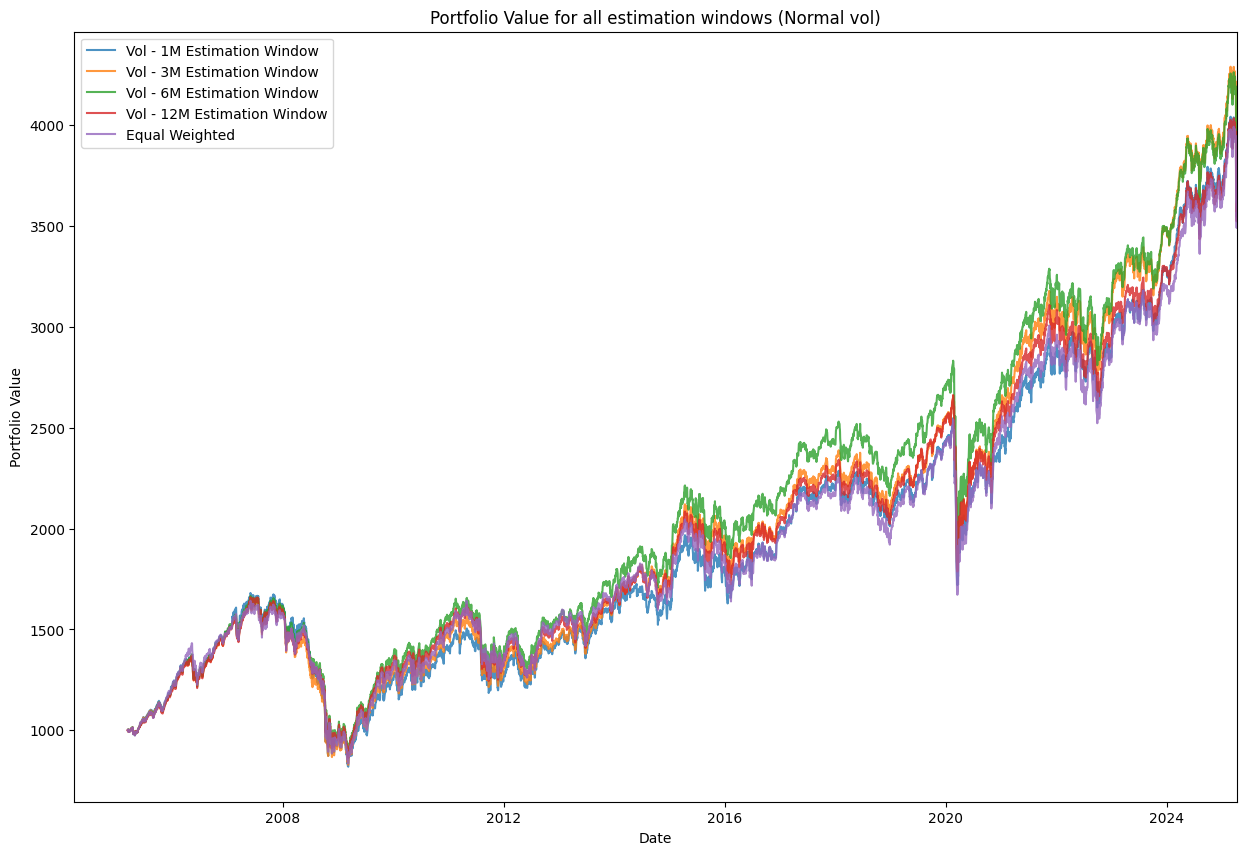

In [59]:
# Plotting Portfolio value for all inverse variance strategies with only realized vol
# Same plot
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_1MREBAL_1MEST_NORMVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_1MEST_NORMVOL['Portfolio']['Portfolio value'], label='Vol - 1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_1MREBAL_3MEST_NORMVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_3MEST_NORMVOL['Portfolio']['Portfolio value'], label='Vol - 3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_1MREBAL_6MEST_NORMVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_6MEST_NORMVOL['Portfolio']['Portfolio value'], label='Vol - 6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_1MREBAL_12MEST_NORMVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_12MEST_NORMVOL['Portfolio']['Portfolio value'], label='Vol - 12M Estimation Window', alpha=0.8)
ax.plot(sim_ew_1MREBAL['Portfolio']['Portfolio value'].index, sim_ew_1MREBAL['Portfolio']['Portfolio value'], label='Equal Weighted', alpha=0.8)
ax.set_xlim([strategy_ew.start_date, strategy_ew.end_date])
ax.set_title('Portfolio Value for all estimation windows (Normal vol)')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

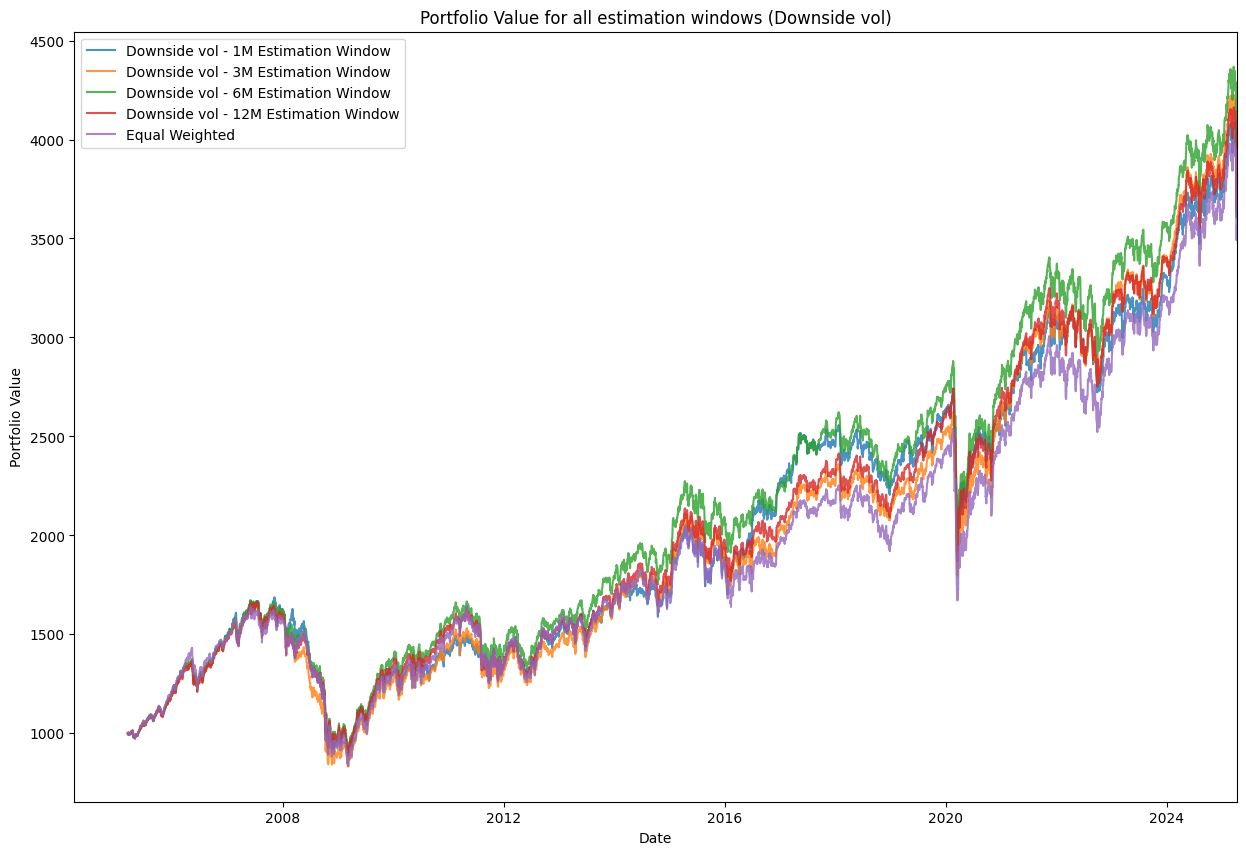

In [60]:
# Plotting Portfolio value for all inverse variance strategies with only downside vol
# Same plot
fig, ax = plt.subplots(figsize=(15, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
ax.plot(sim_vol_1MREBAL_1MEST_DOWNVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_1MEST_DOWNVOL['Portfolio']['Portfolio value'], label='Downside vol - 1M Estimation Window', alpha=0.8)
ax.plot(sim_vol_1MREBAL_3MEST_DOWNVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_3MEST_DOWNVOL['Portfolio']['Portfolio value'], label='Downside vol - 3M Estimation Window', alpha=0.8)
ax.plot(sim_vol_1MREBAL_6MEST_DOWNVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_6MEST_DOWNVOL['Portfolio']['Portfolio value'], label='Downside vol - 6M Estimation Window', alpha=0.8)
ax.plot(sim_vol_1MREBAL_12MEST_DOWNVOL['Portfolio']['Portfolio value'].index, sim_vol_1MREBAL_12MEST_DOWNVOL['Portfolio']['Portfolio value'], label='Downside vol - 12M Estimation Window', alpha=0.8)
ax.plot(sim_ew_1MREBAL['Portfolio']['Portfolio value'].index, sim_ew_1MREBAL['Portfolio']['Portfolio value'], label='Equal Weighted', alpha=0.8)
ax.set_xlim([strategy_ew.start_date, strategy_ew.end_date])
ax.set_title('Portfolio Value for all estimation windows (Downside vol)')
ax.set_xlabel('Date')
ax.set_ylabel('Portfolio Value')
ax.legend()
plt.show()

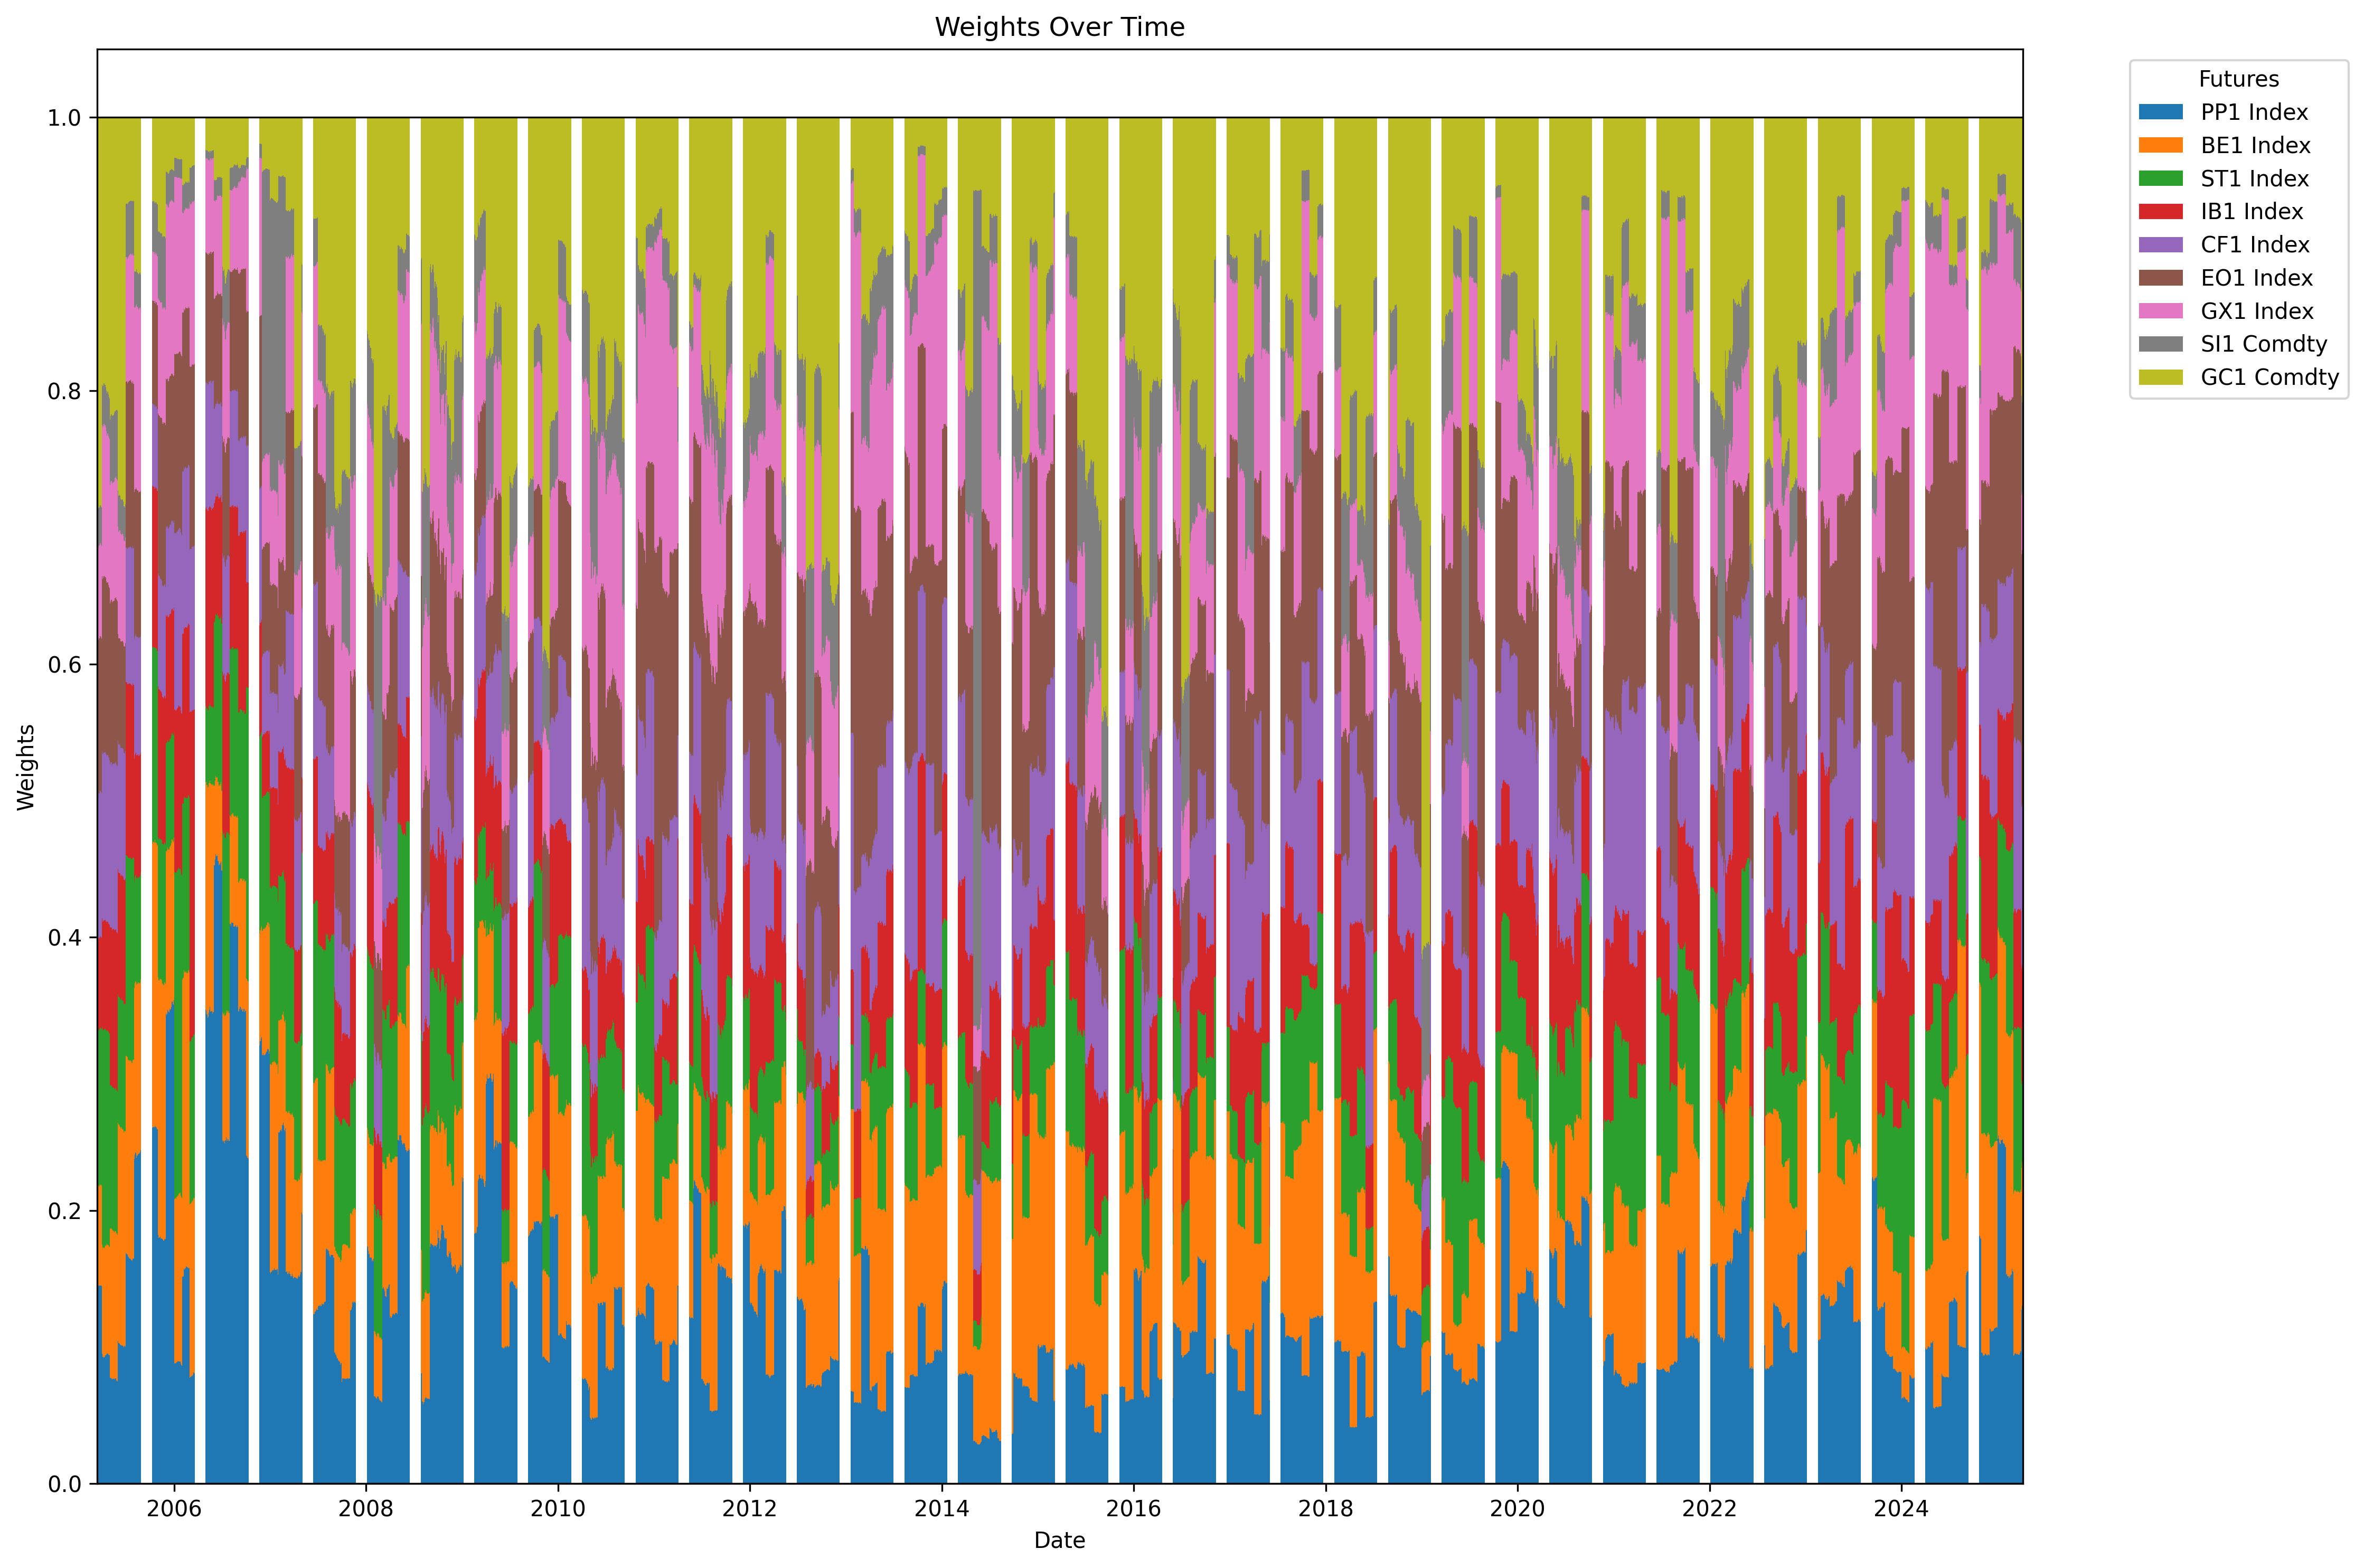

In [61]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_1MEST_NORMVOL['Weights'], figsize=(15, 10))

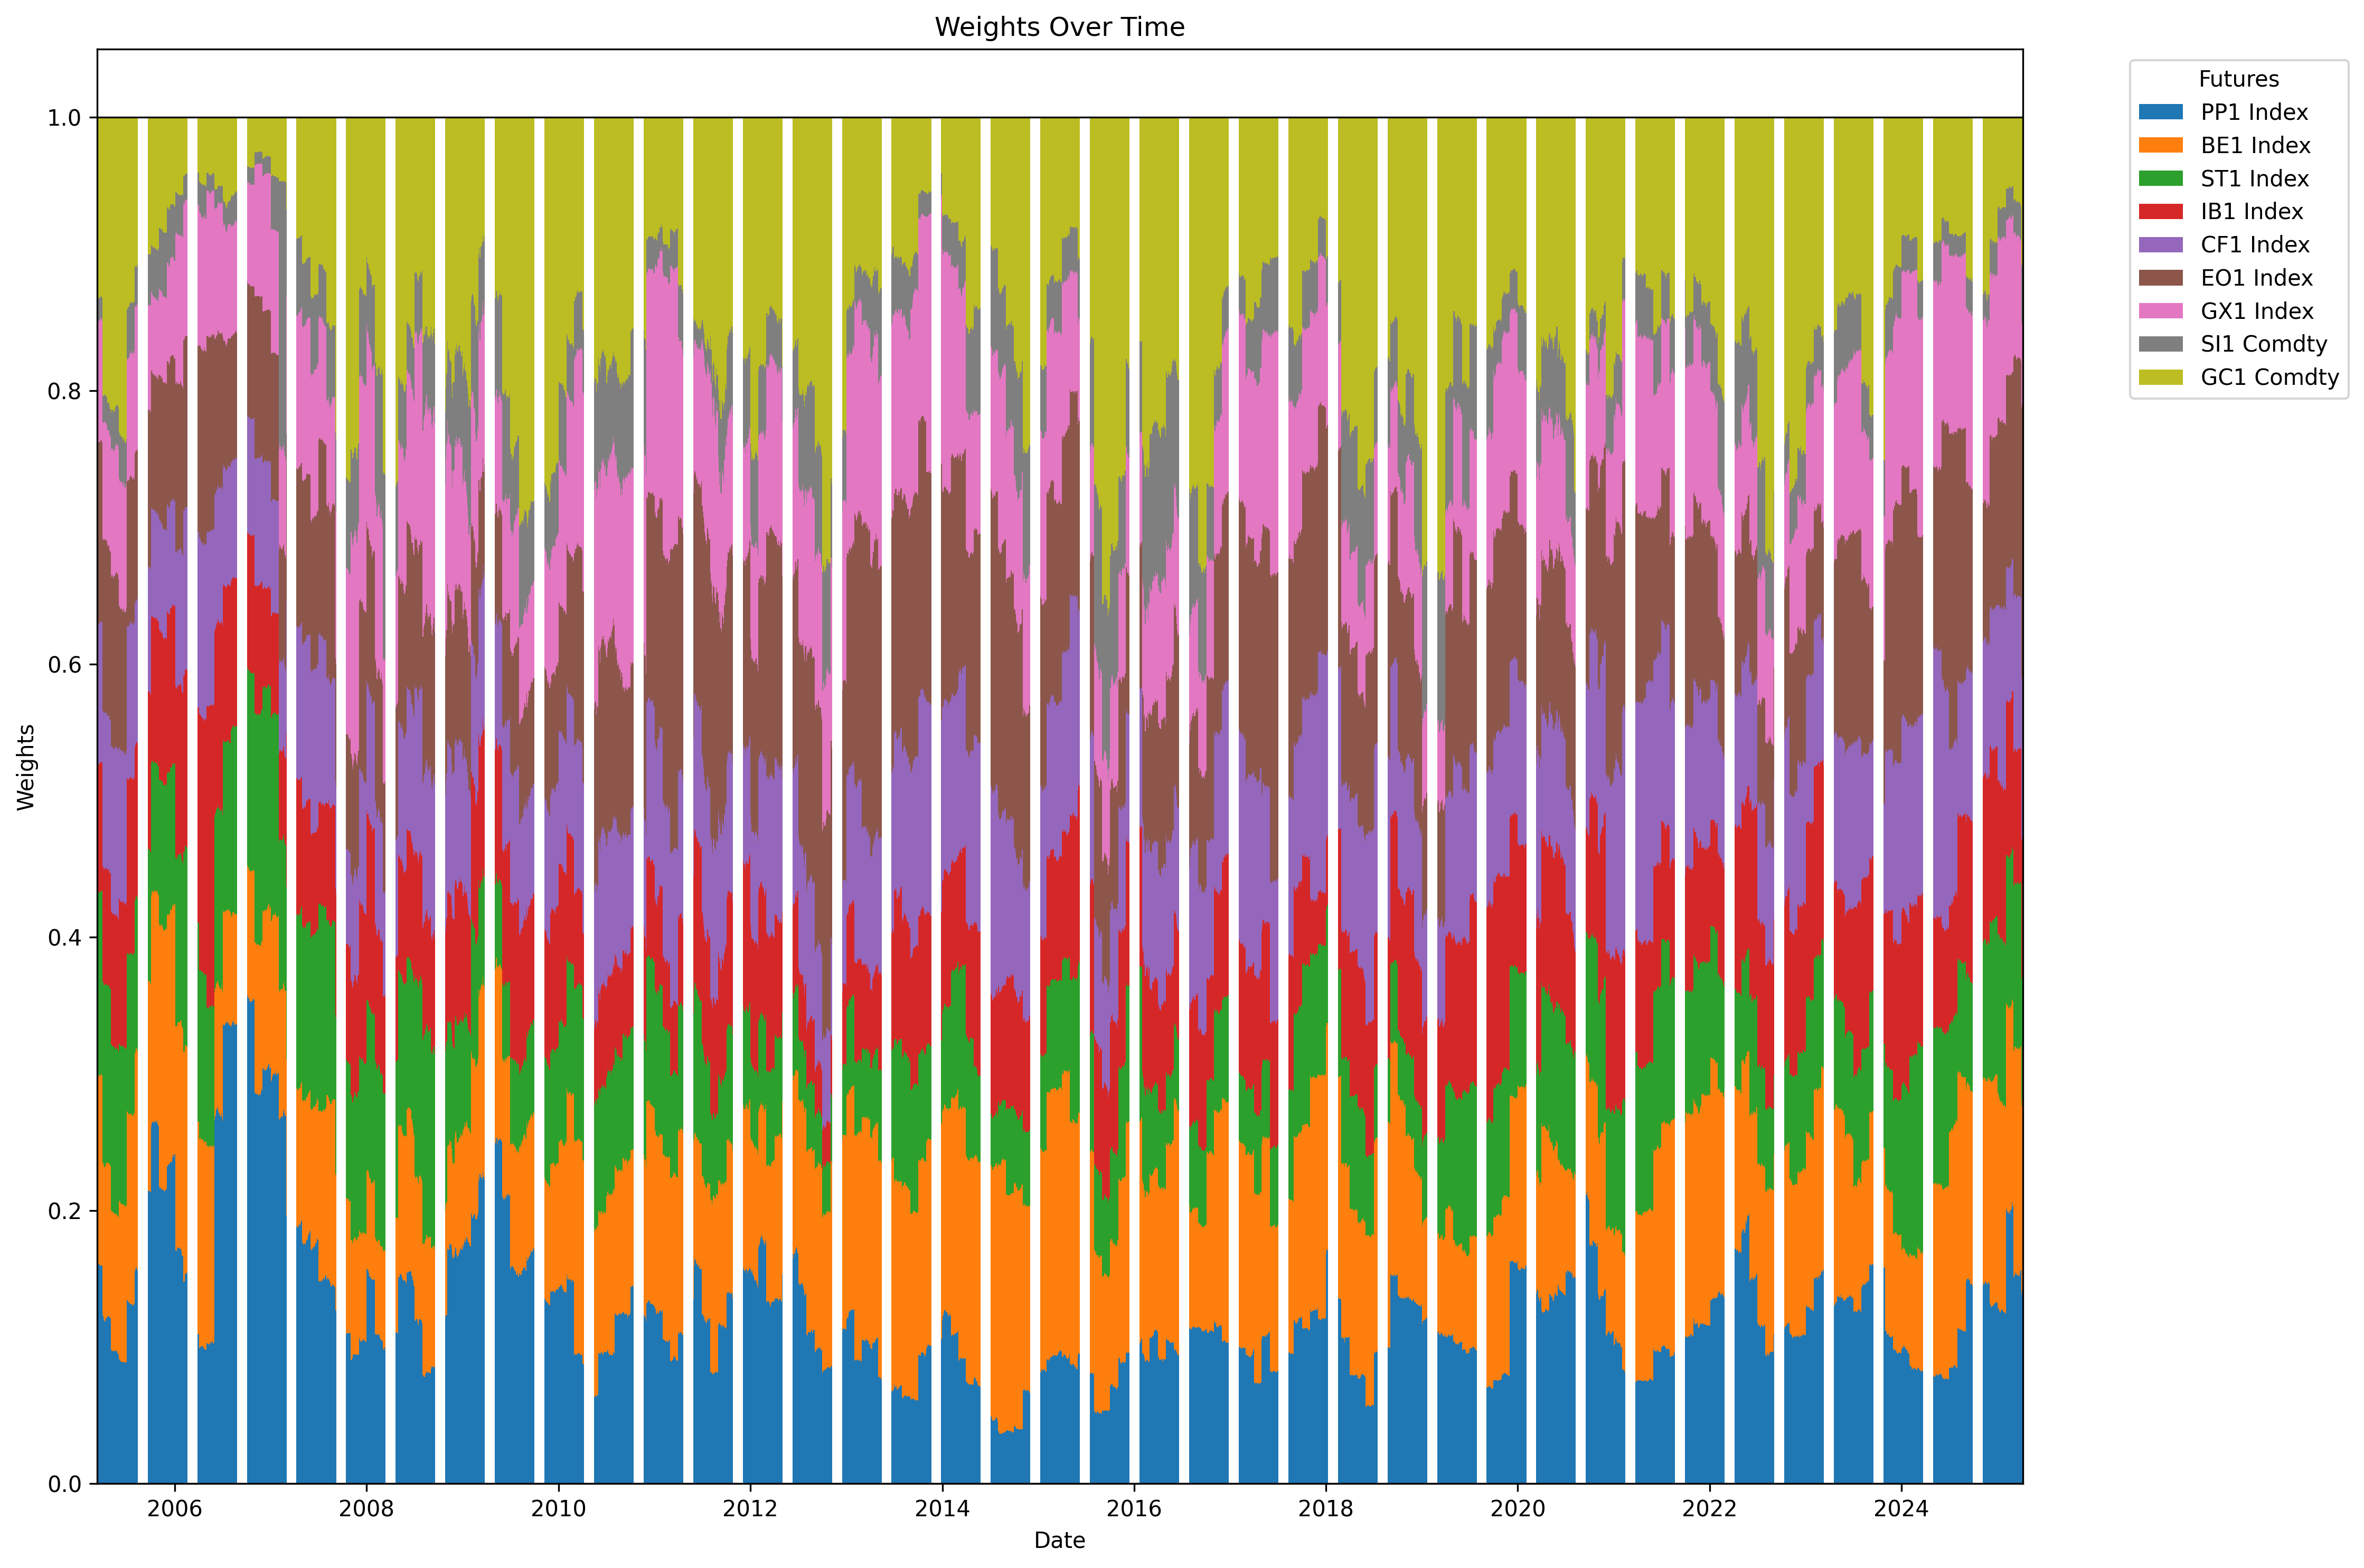

In [62]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_3MEST_NORMVOL['Weights'], figsize=(15, 10))

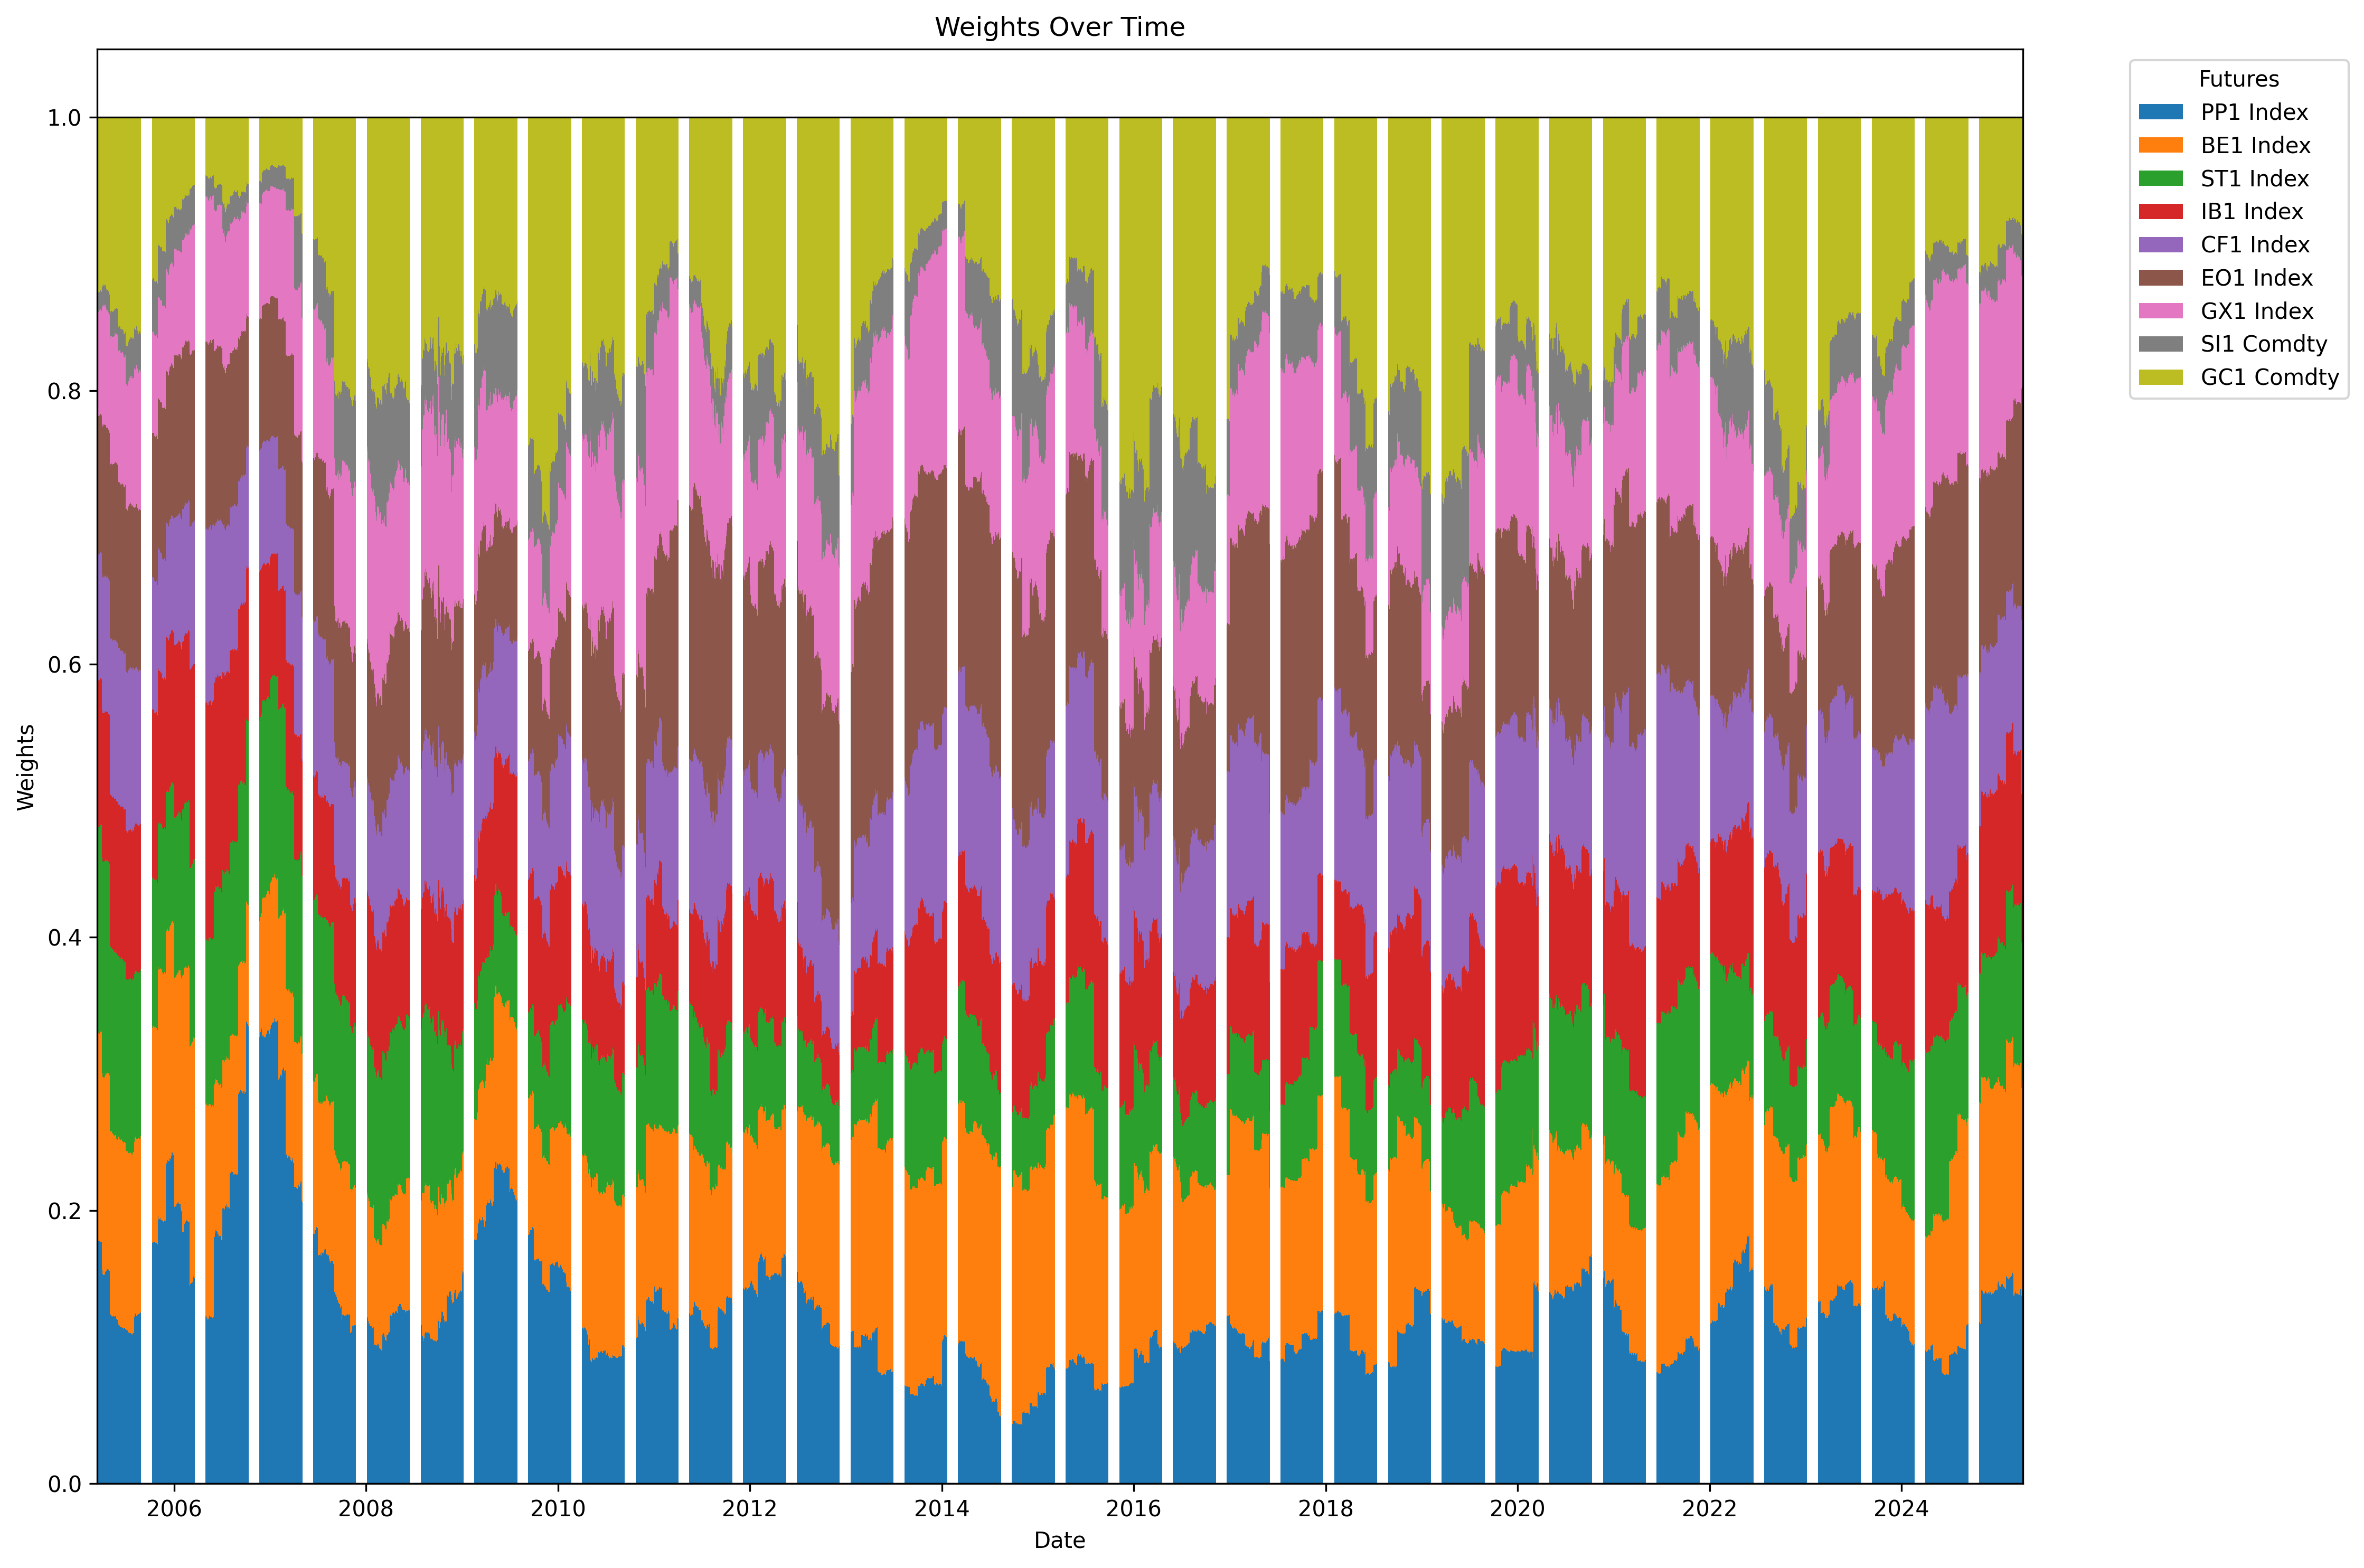

In [63]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_6MEST_NORMVOL['Weights'], figsize=(15, 10))

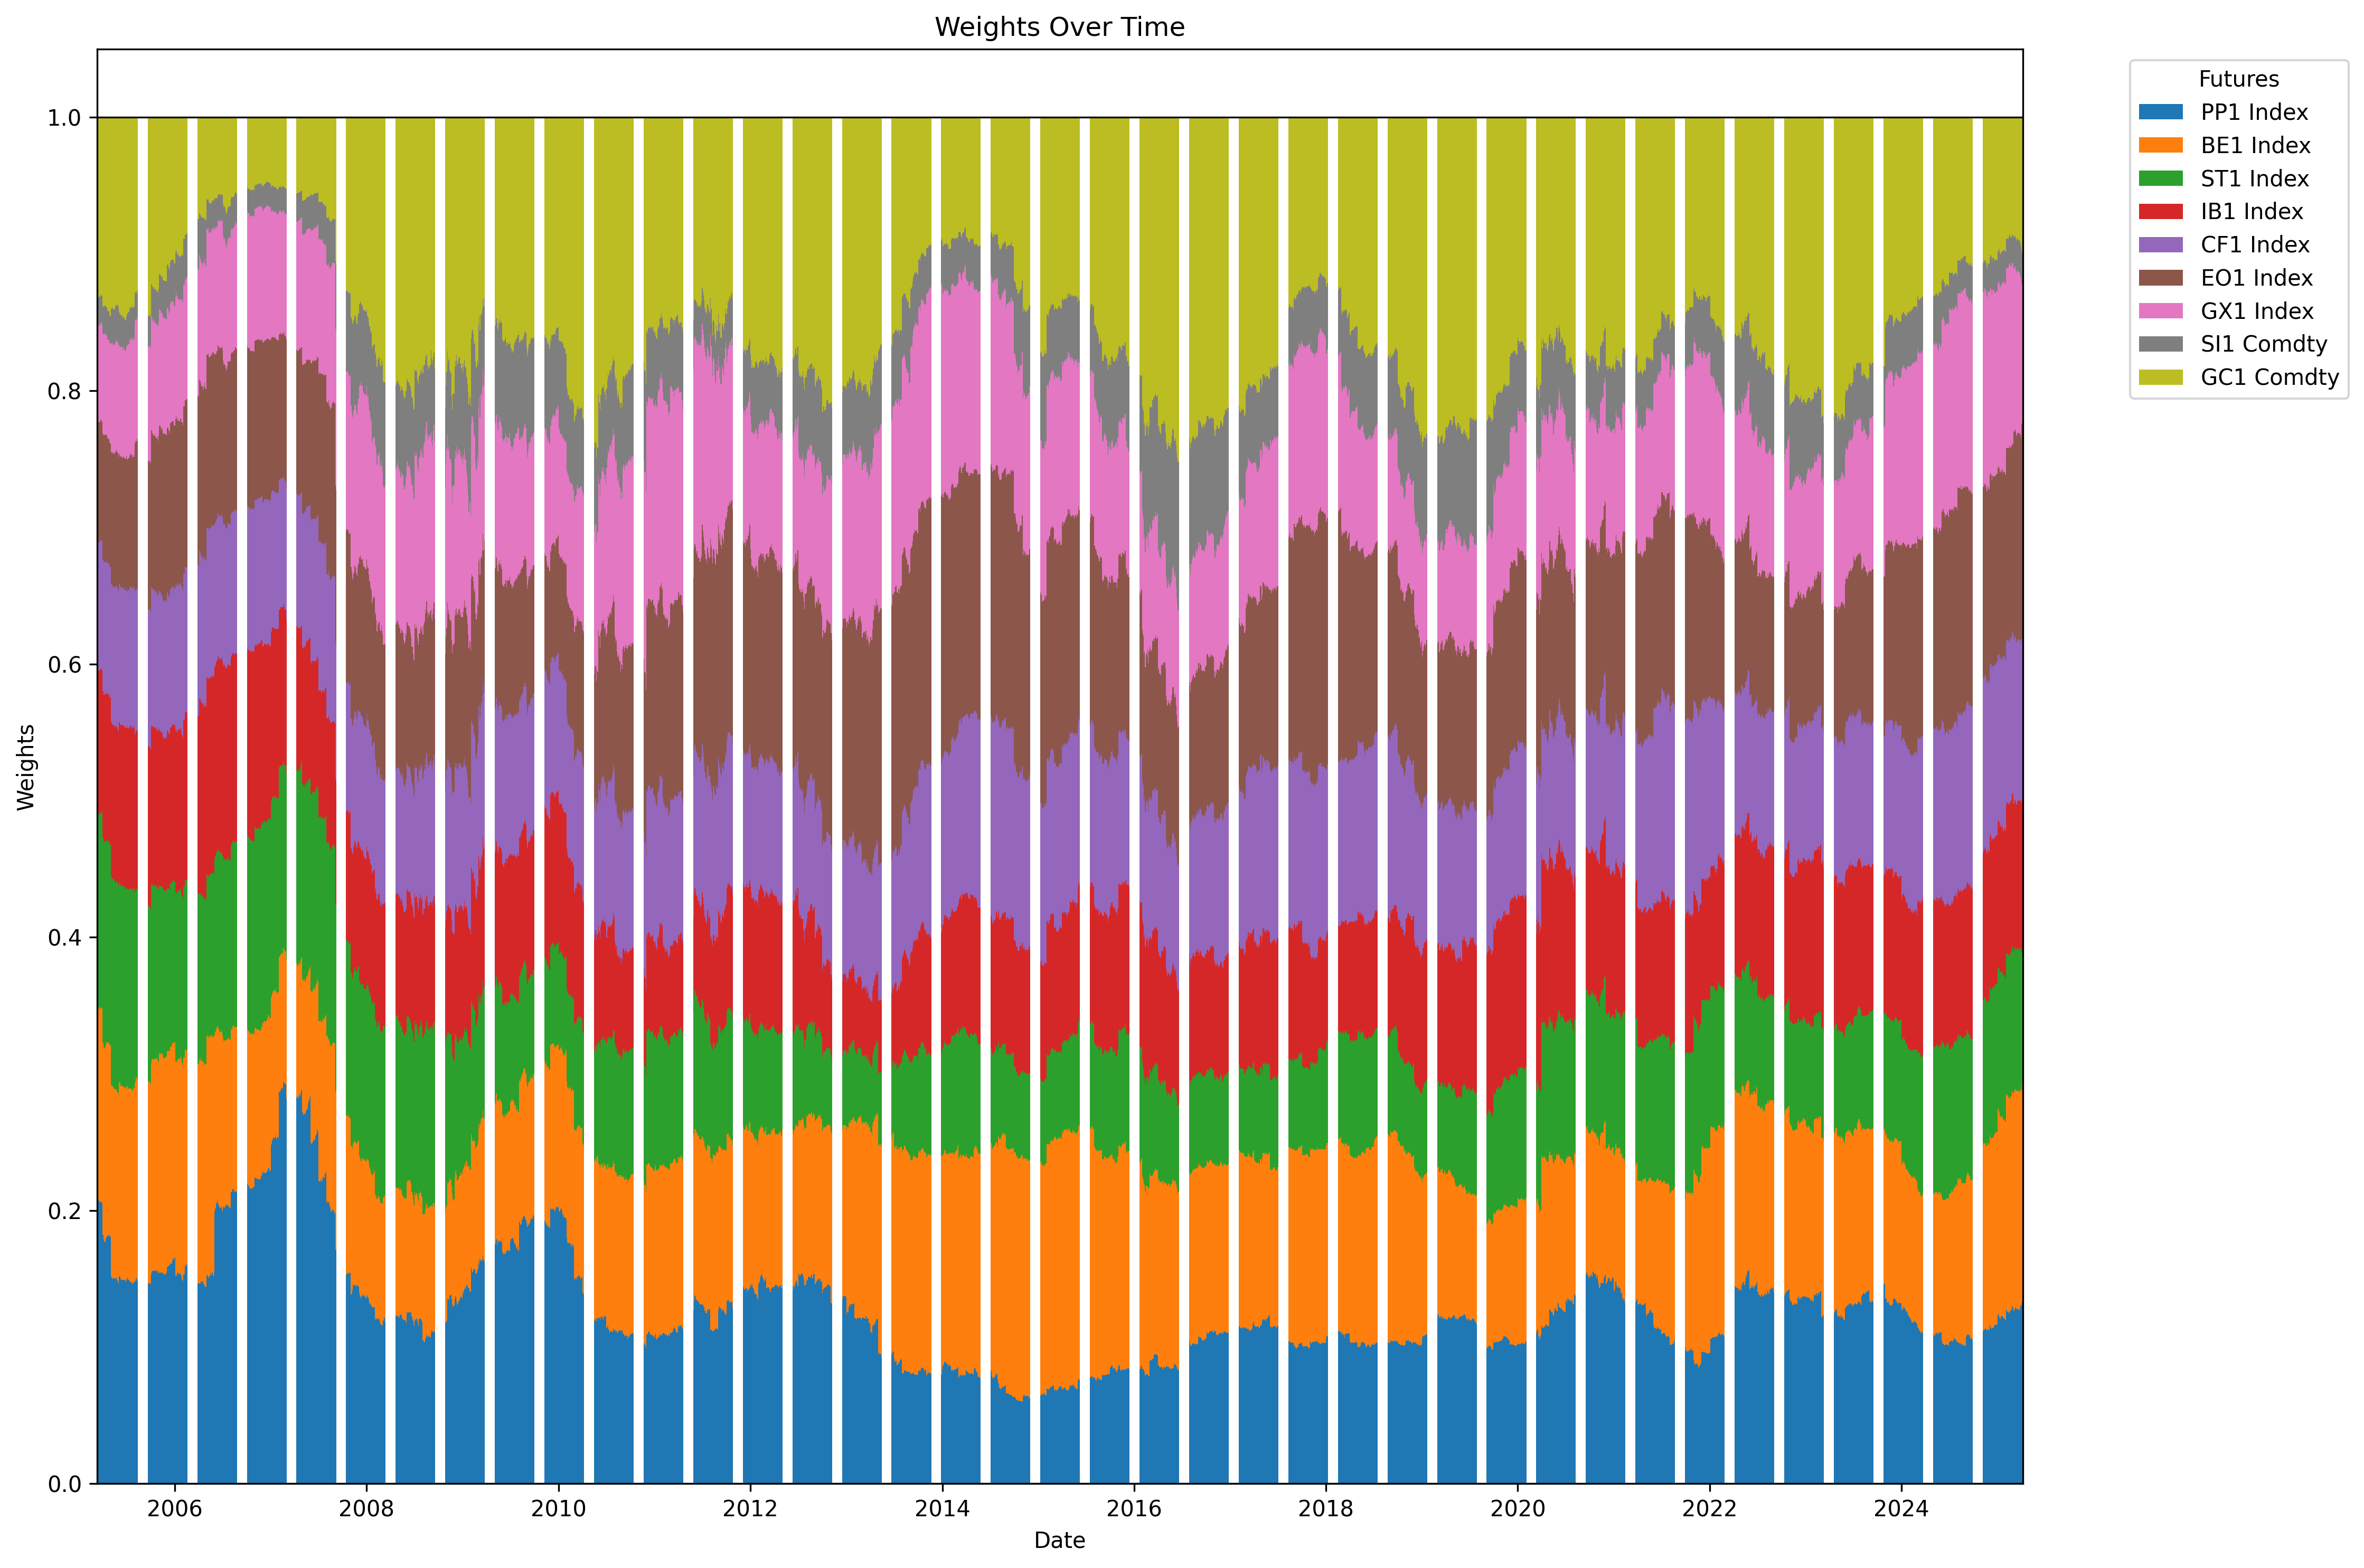

In [64]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_12MEST_NORMVOL['Weights'], figsize=(15, 10))

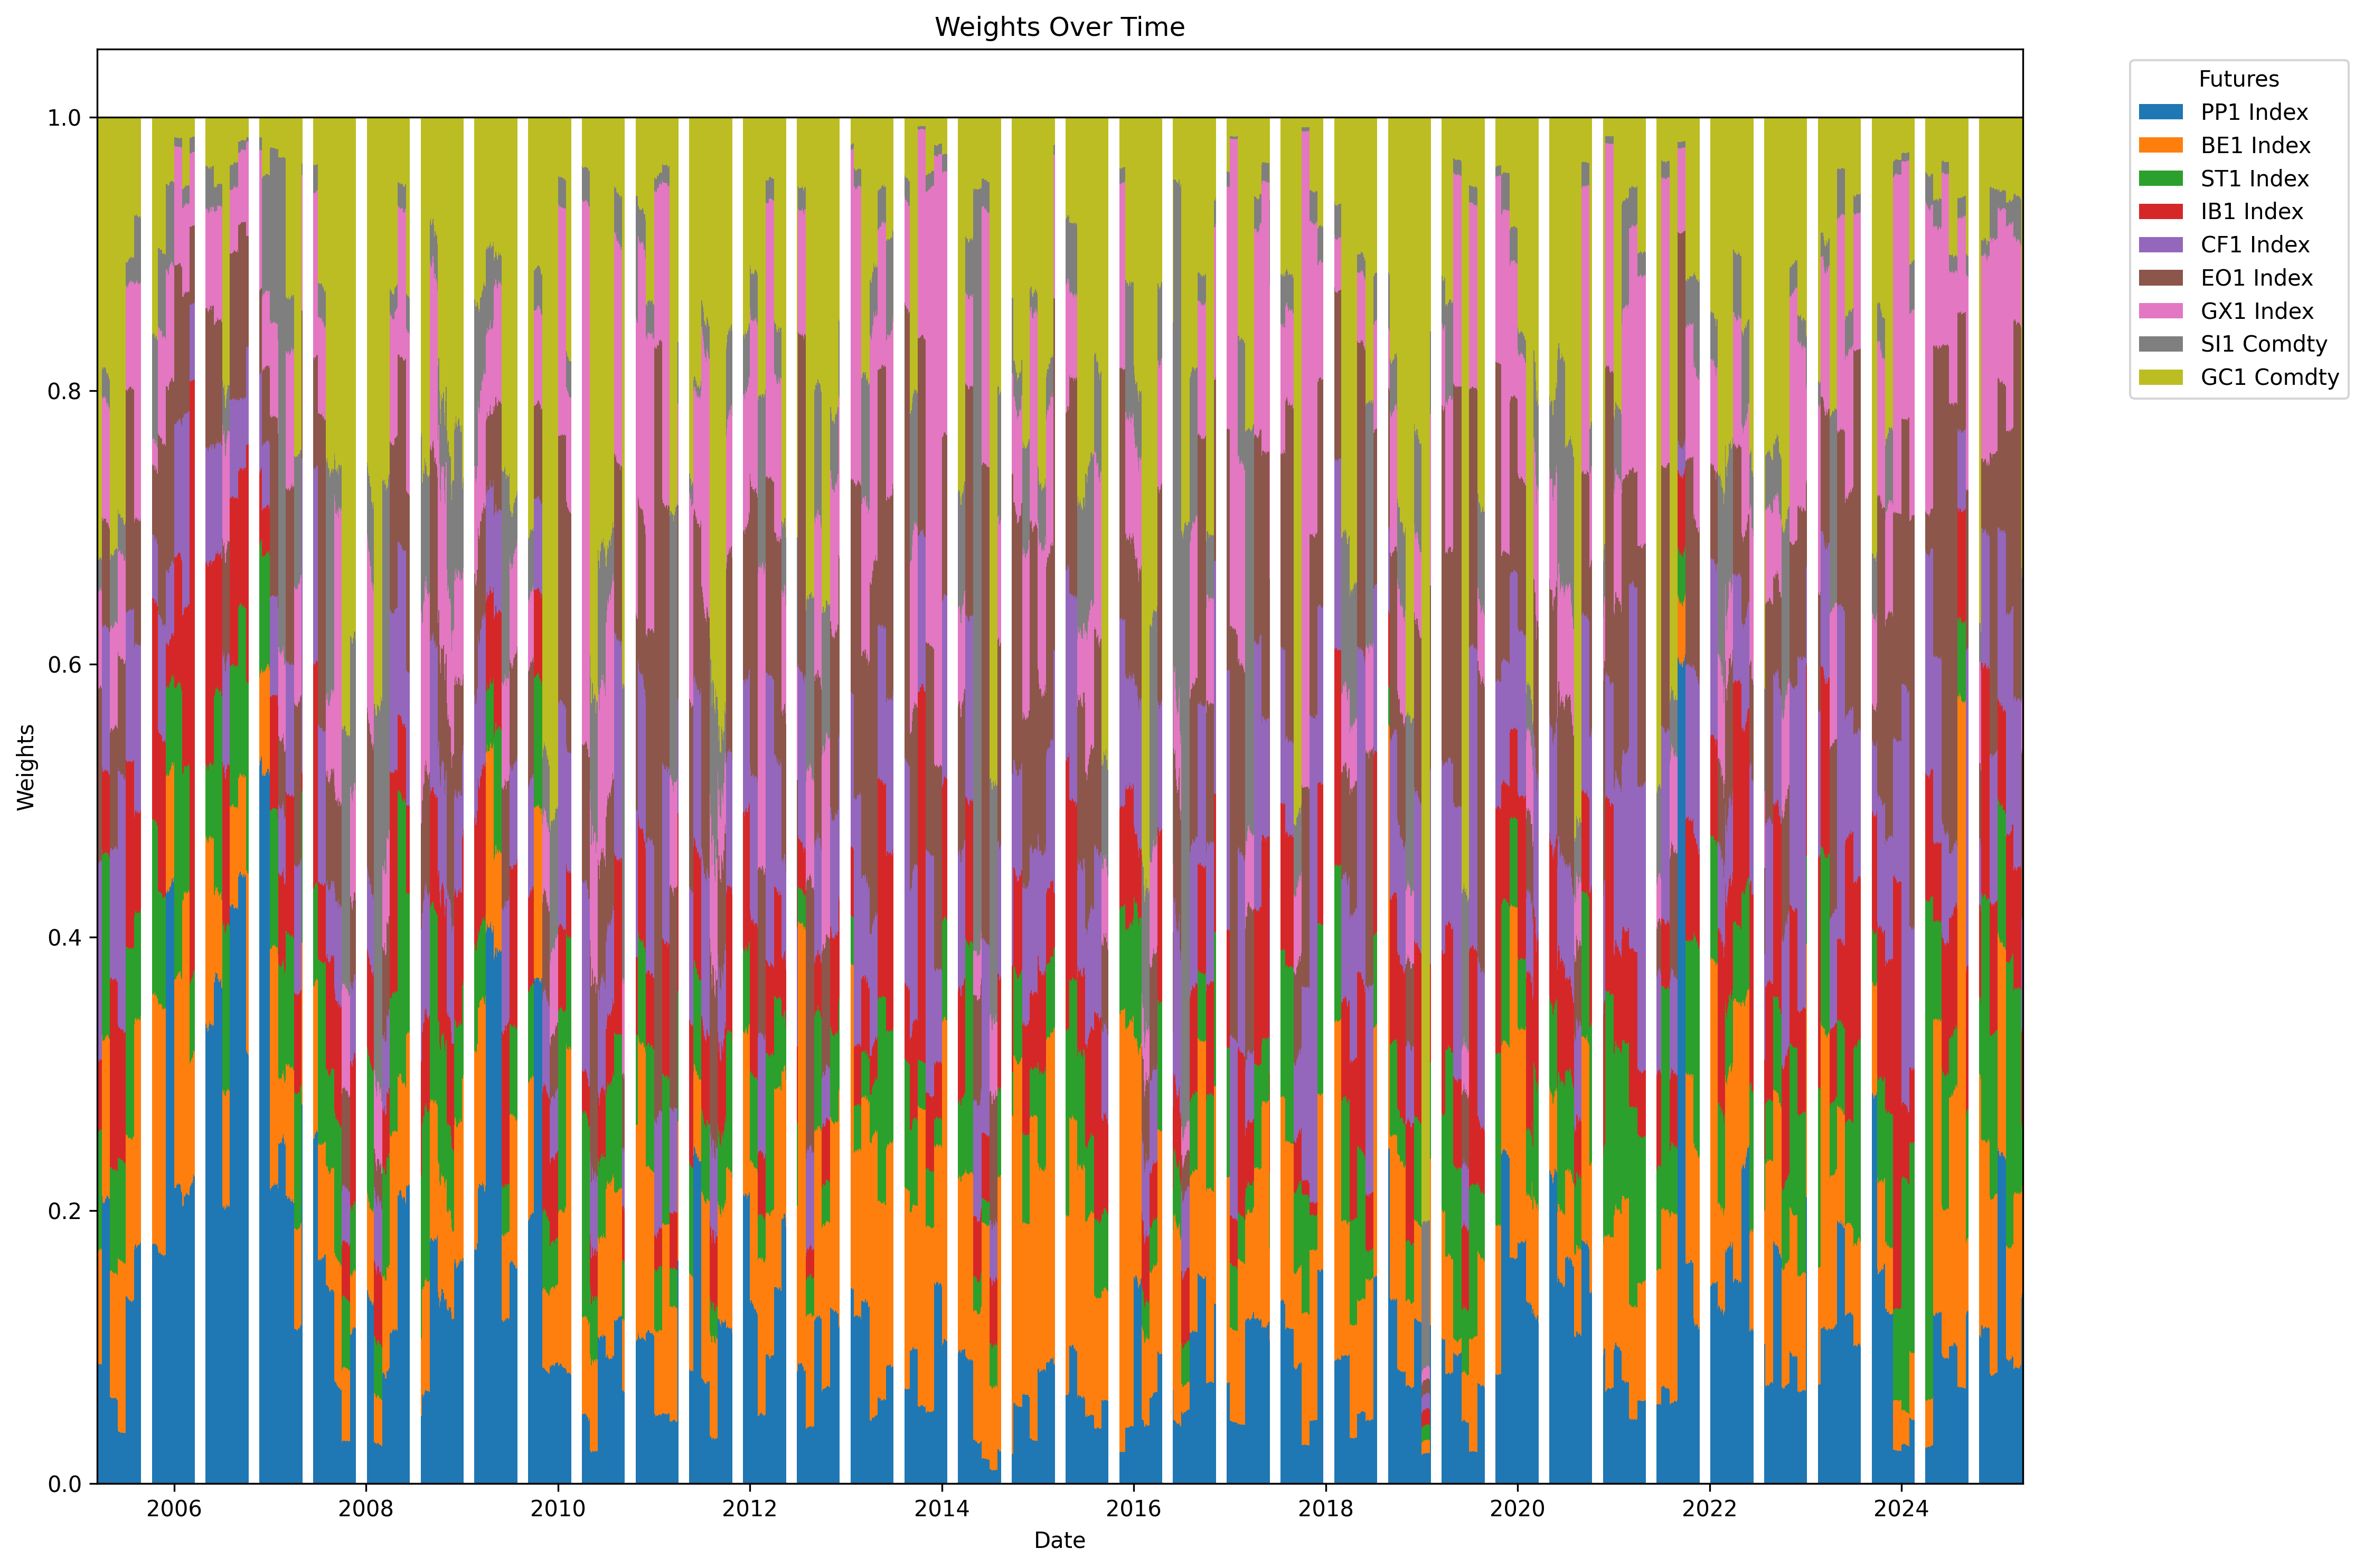

In [65]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_1MEST_DOWNVOL['Weights'], figsize=(15, 10))

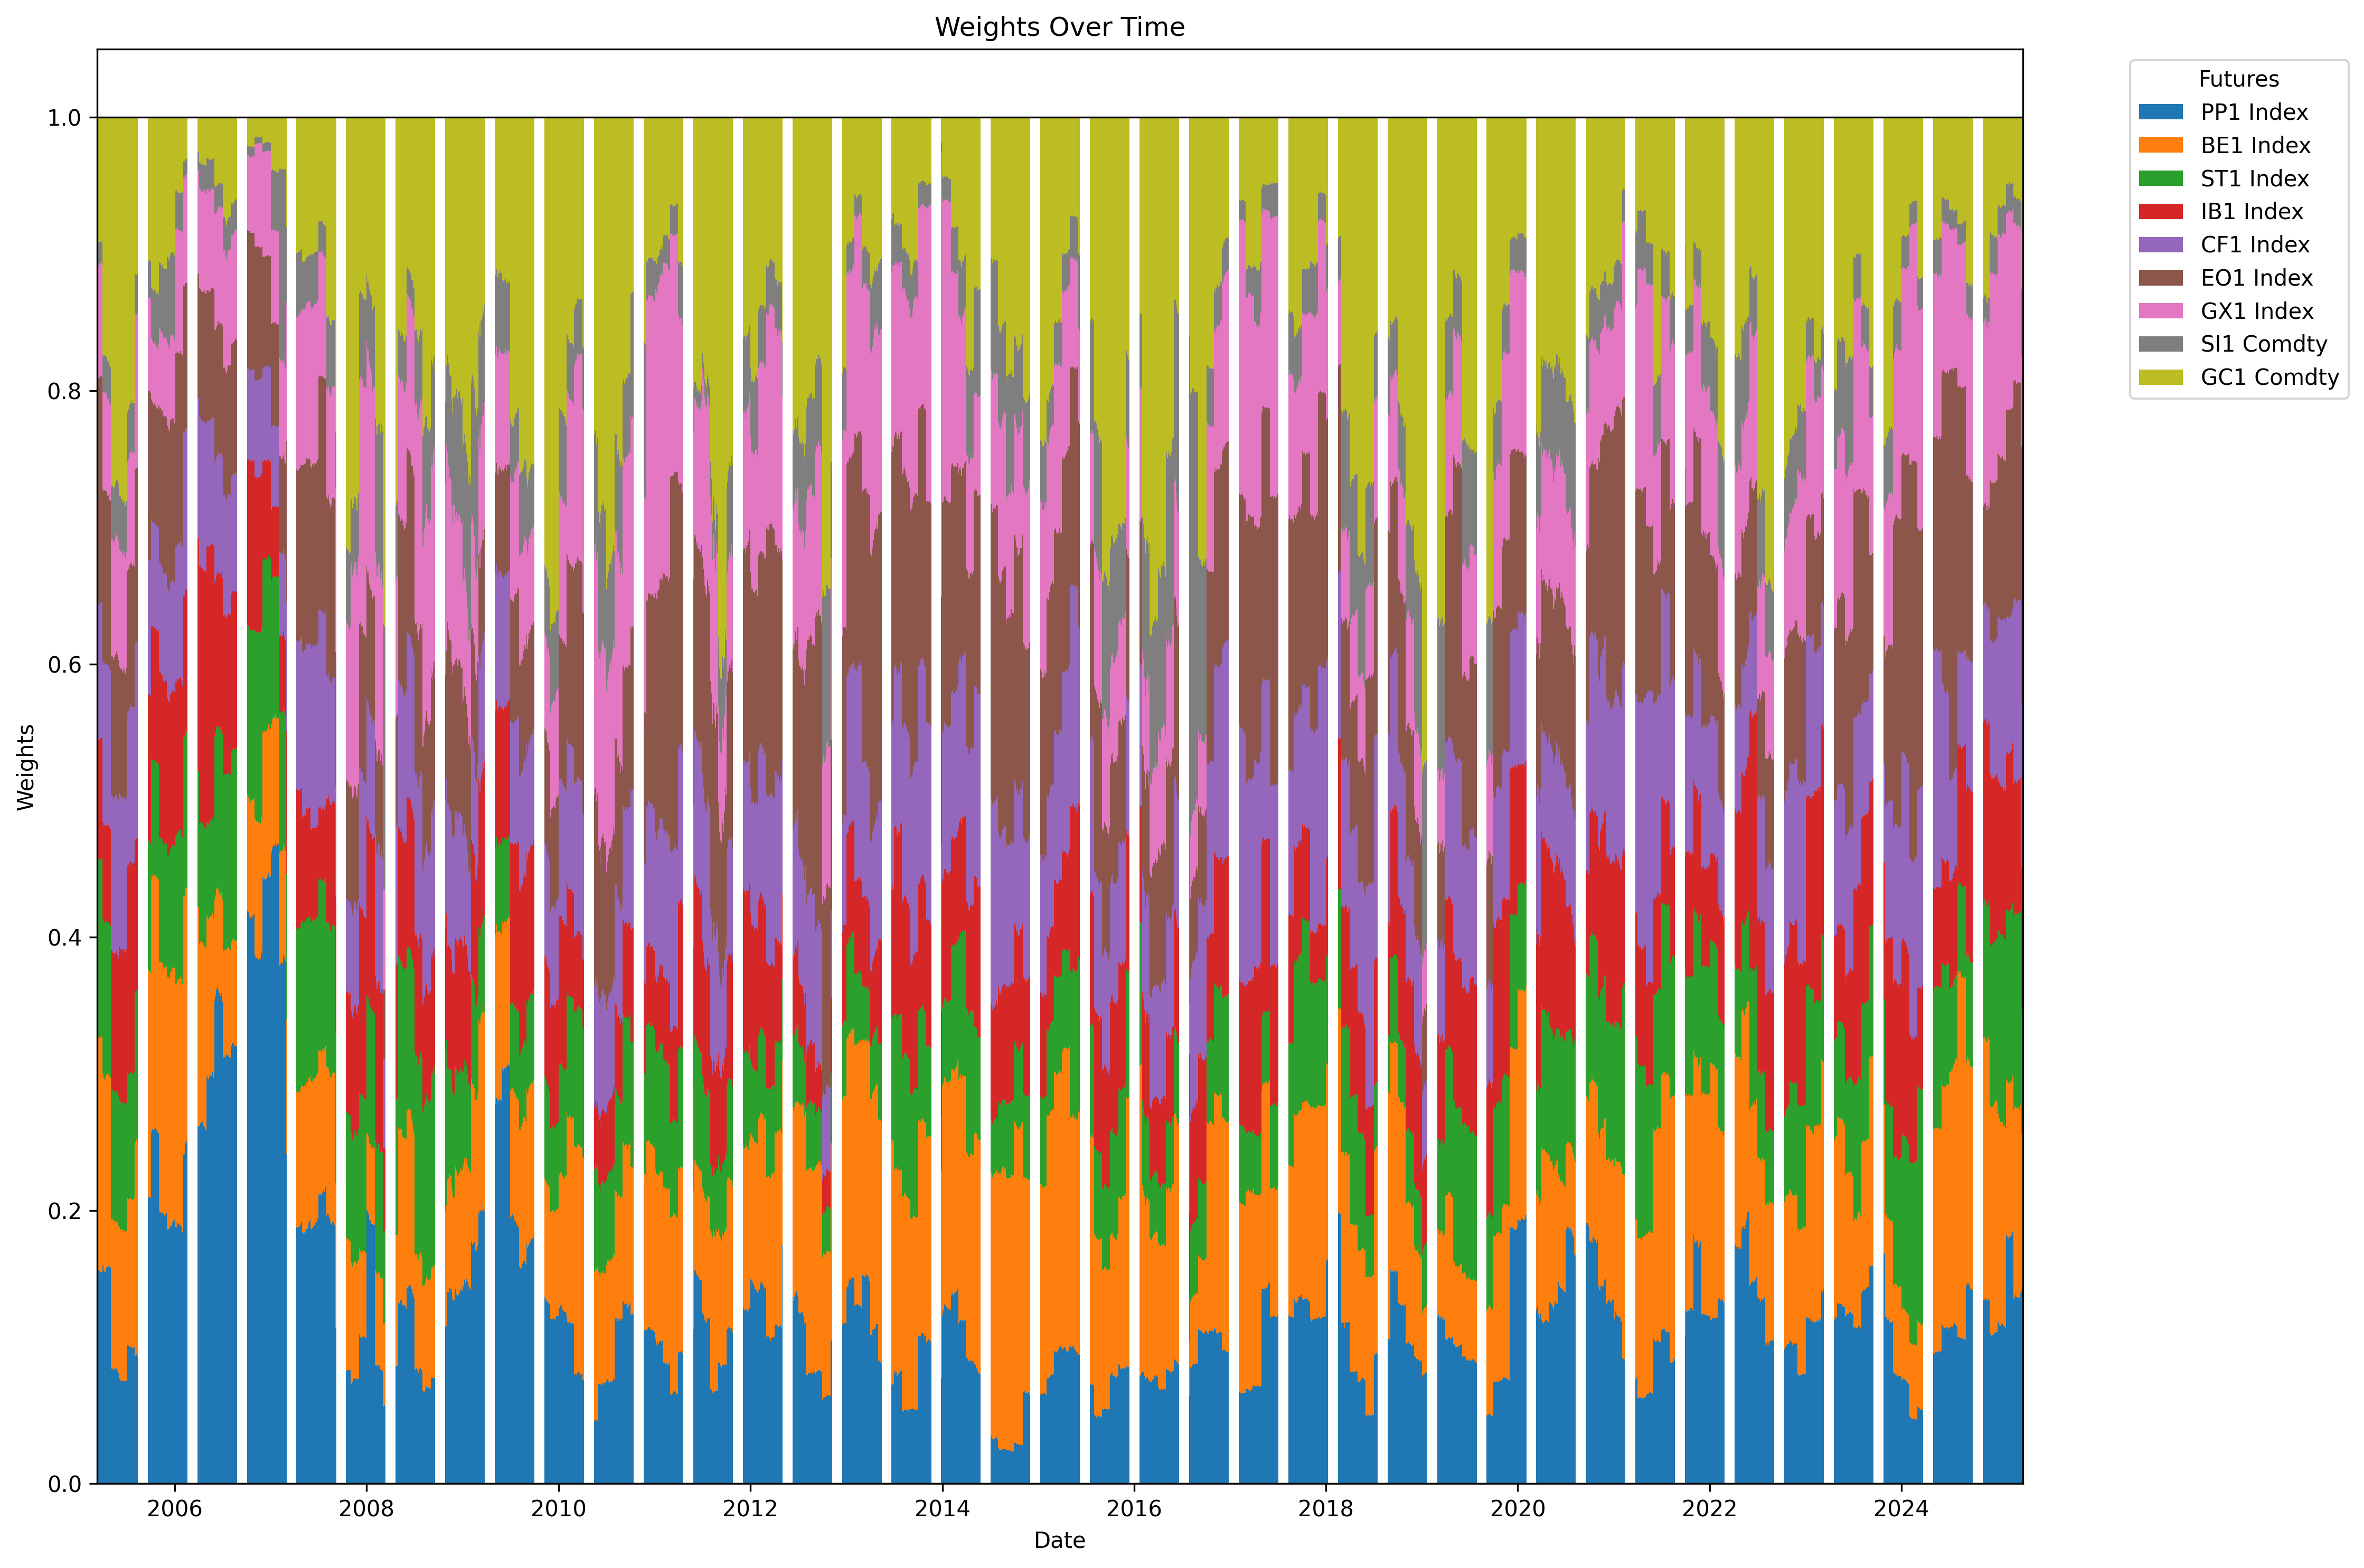

In [66]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_3MEST_DOWNVOL['Weights'], figsize=(15, 10))

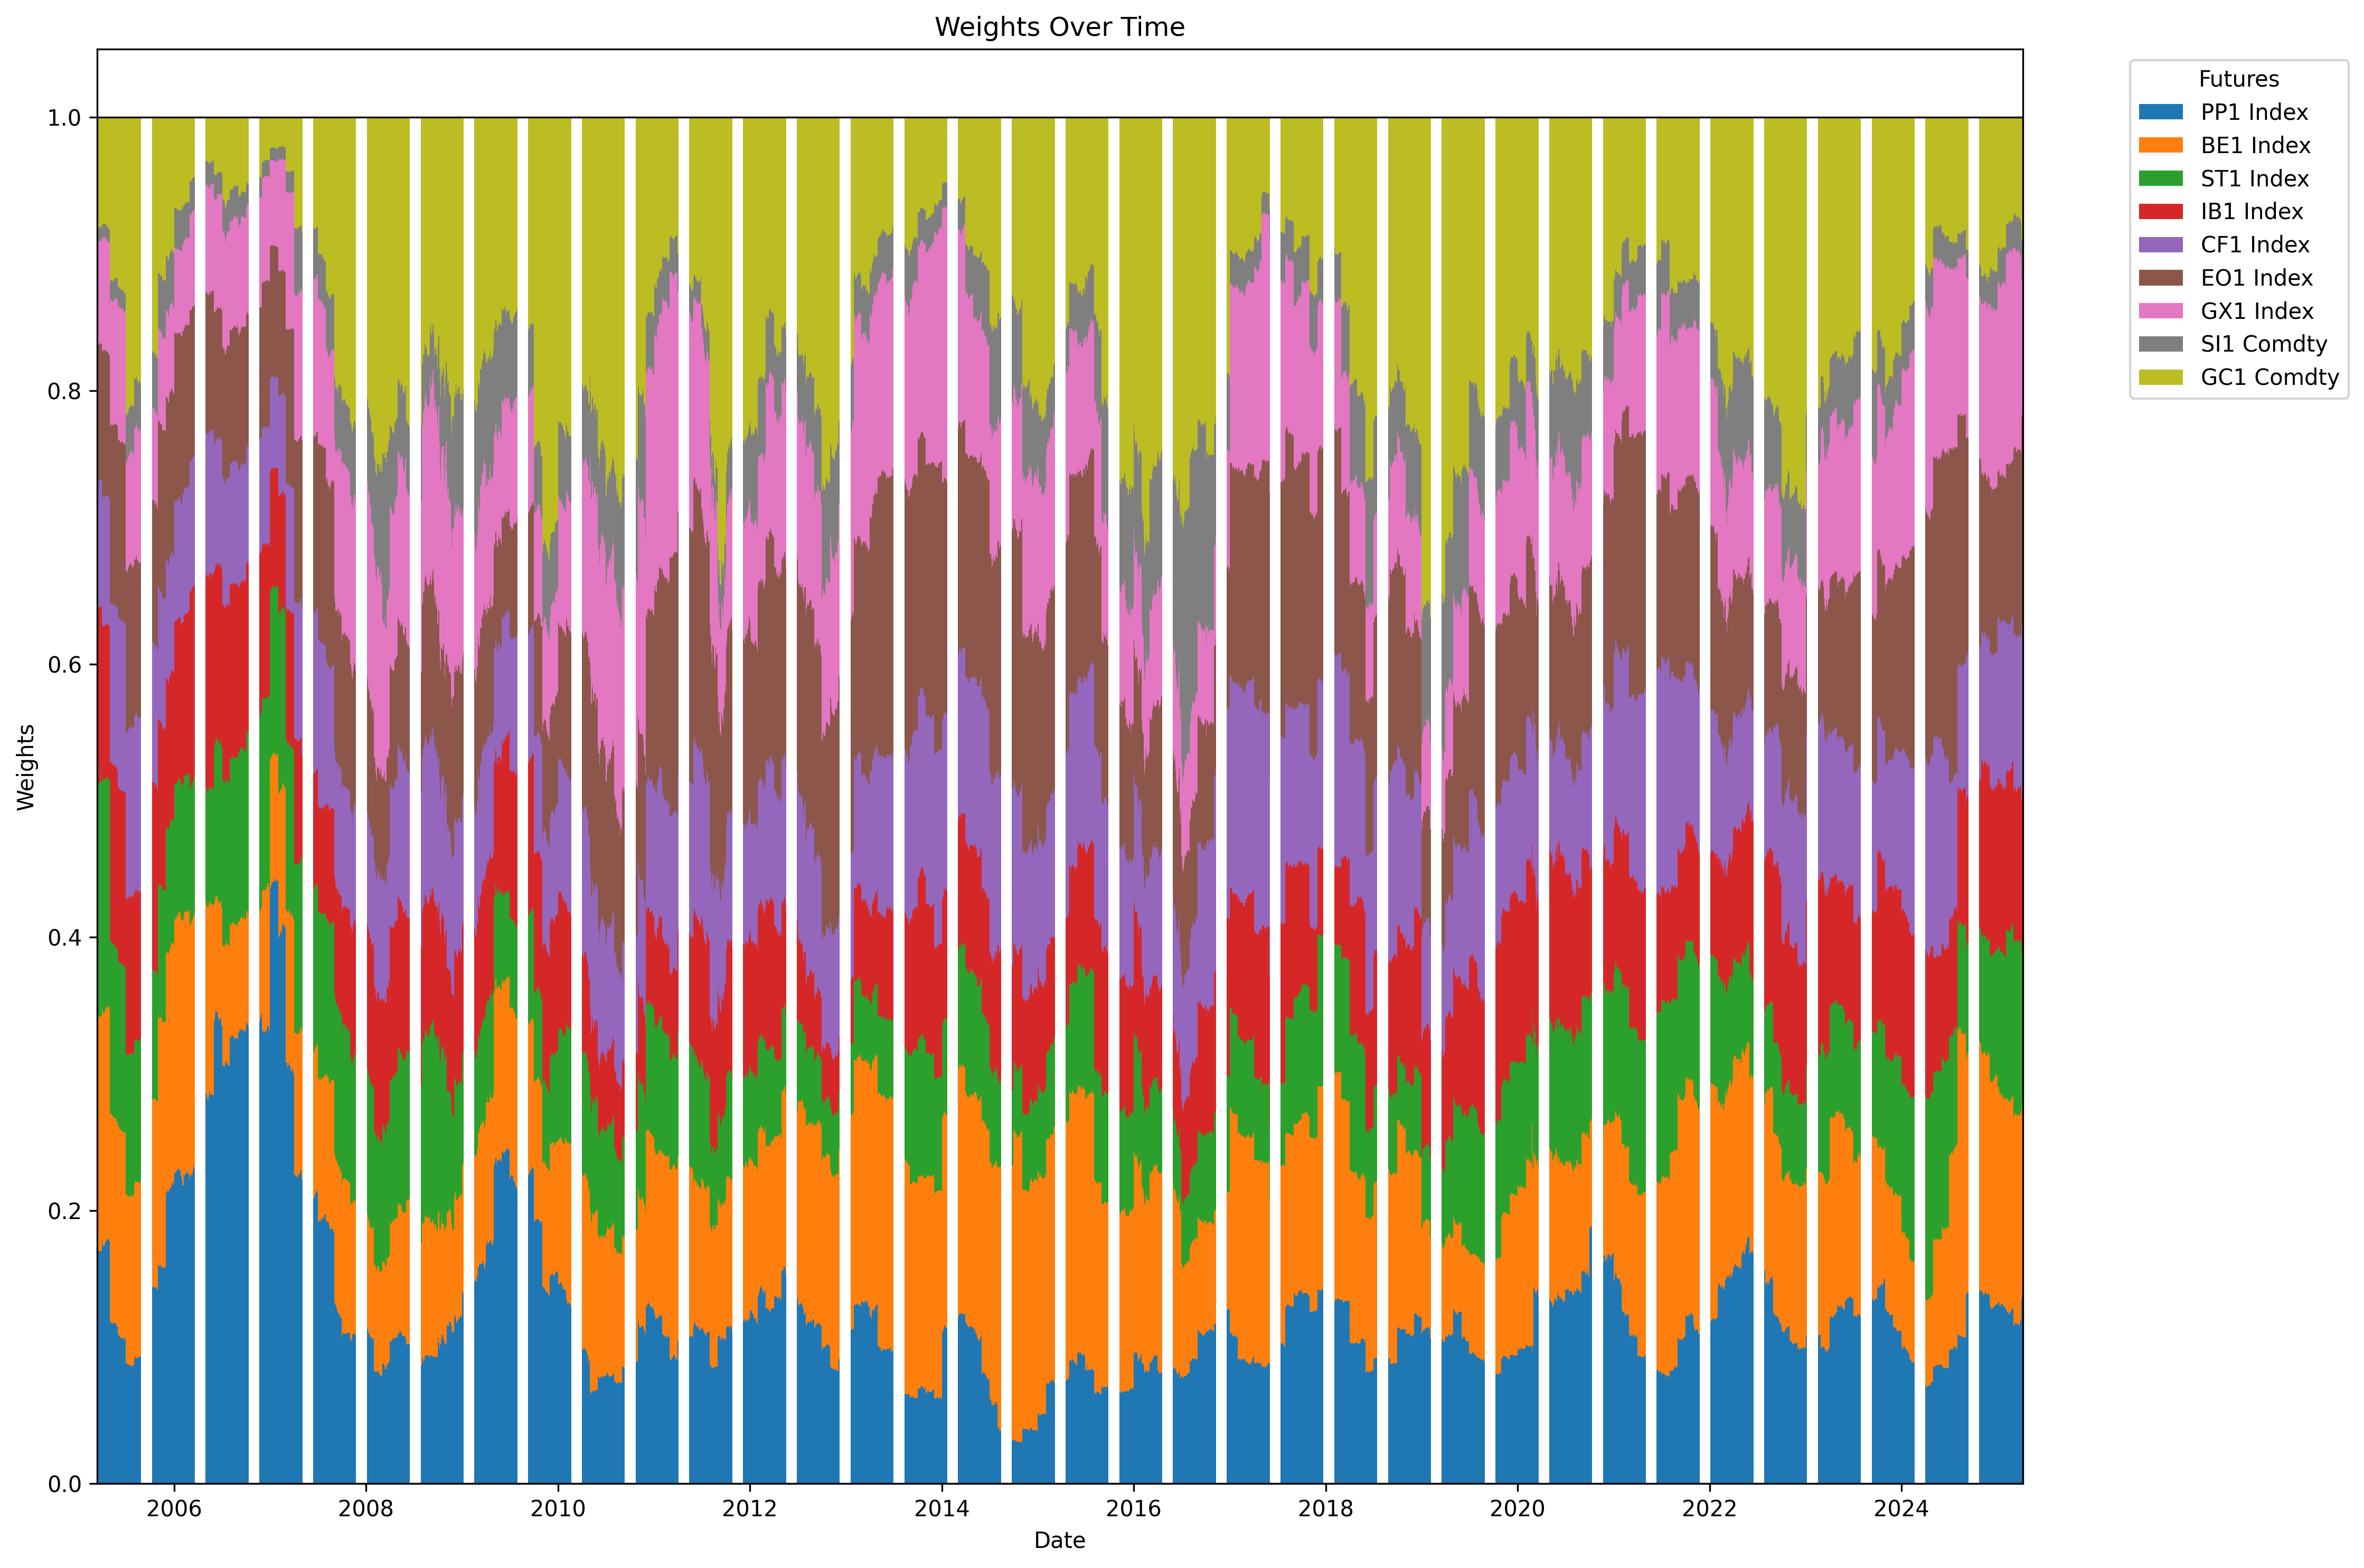

In [67]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_6MEST_DOWNVOL['Weights'], figsize=(15, 10))

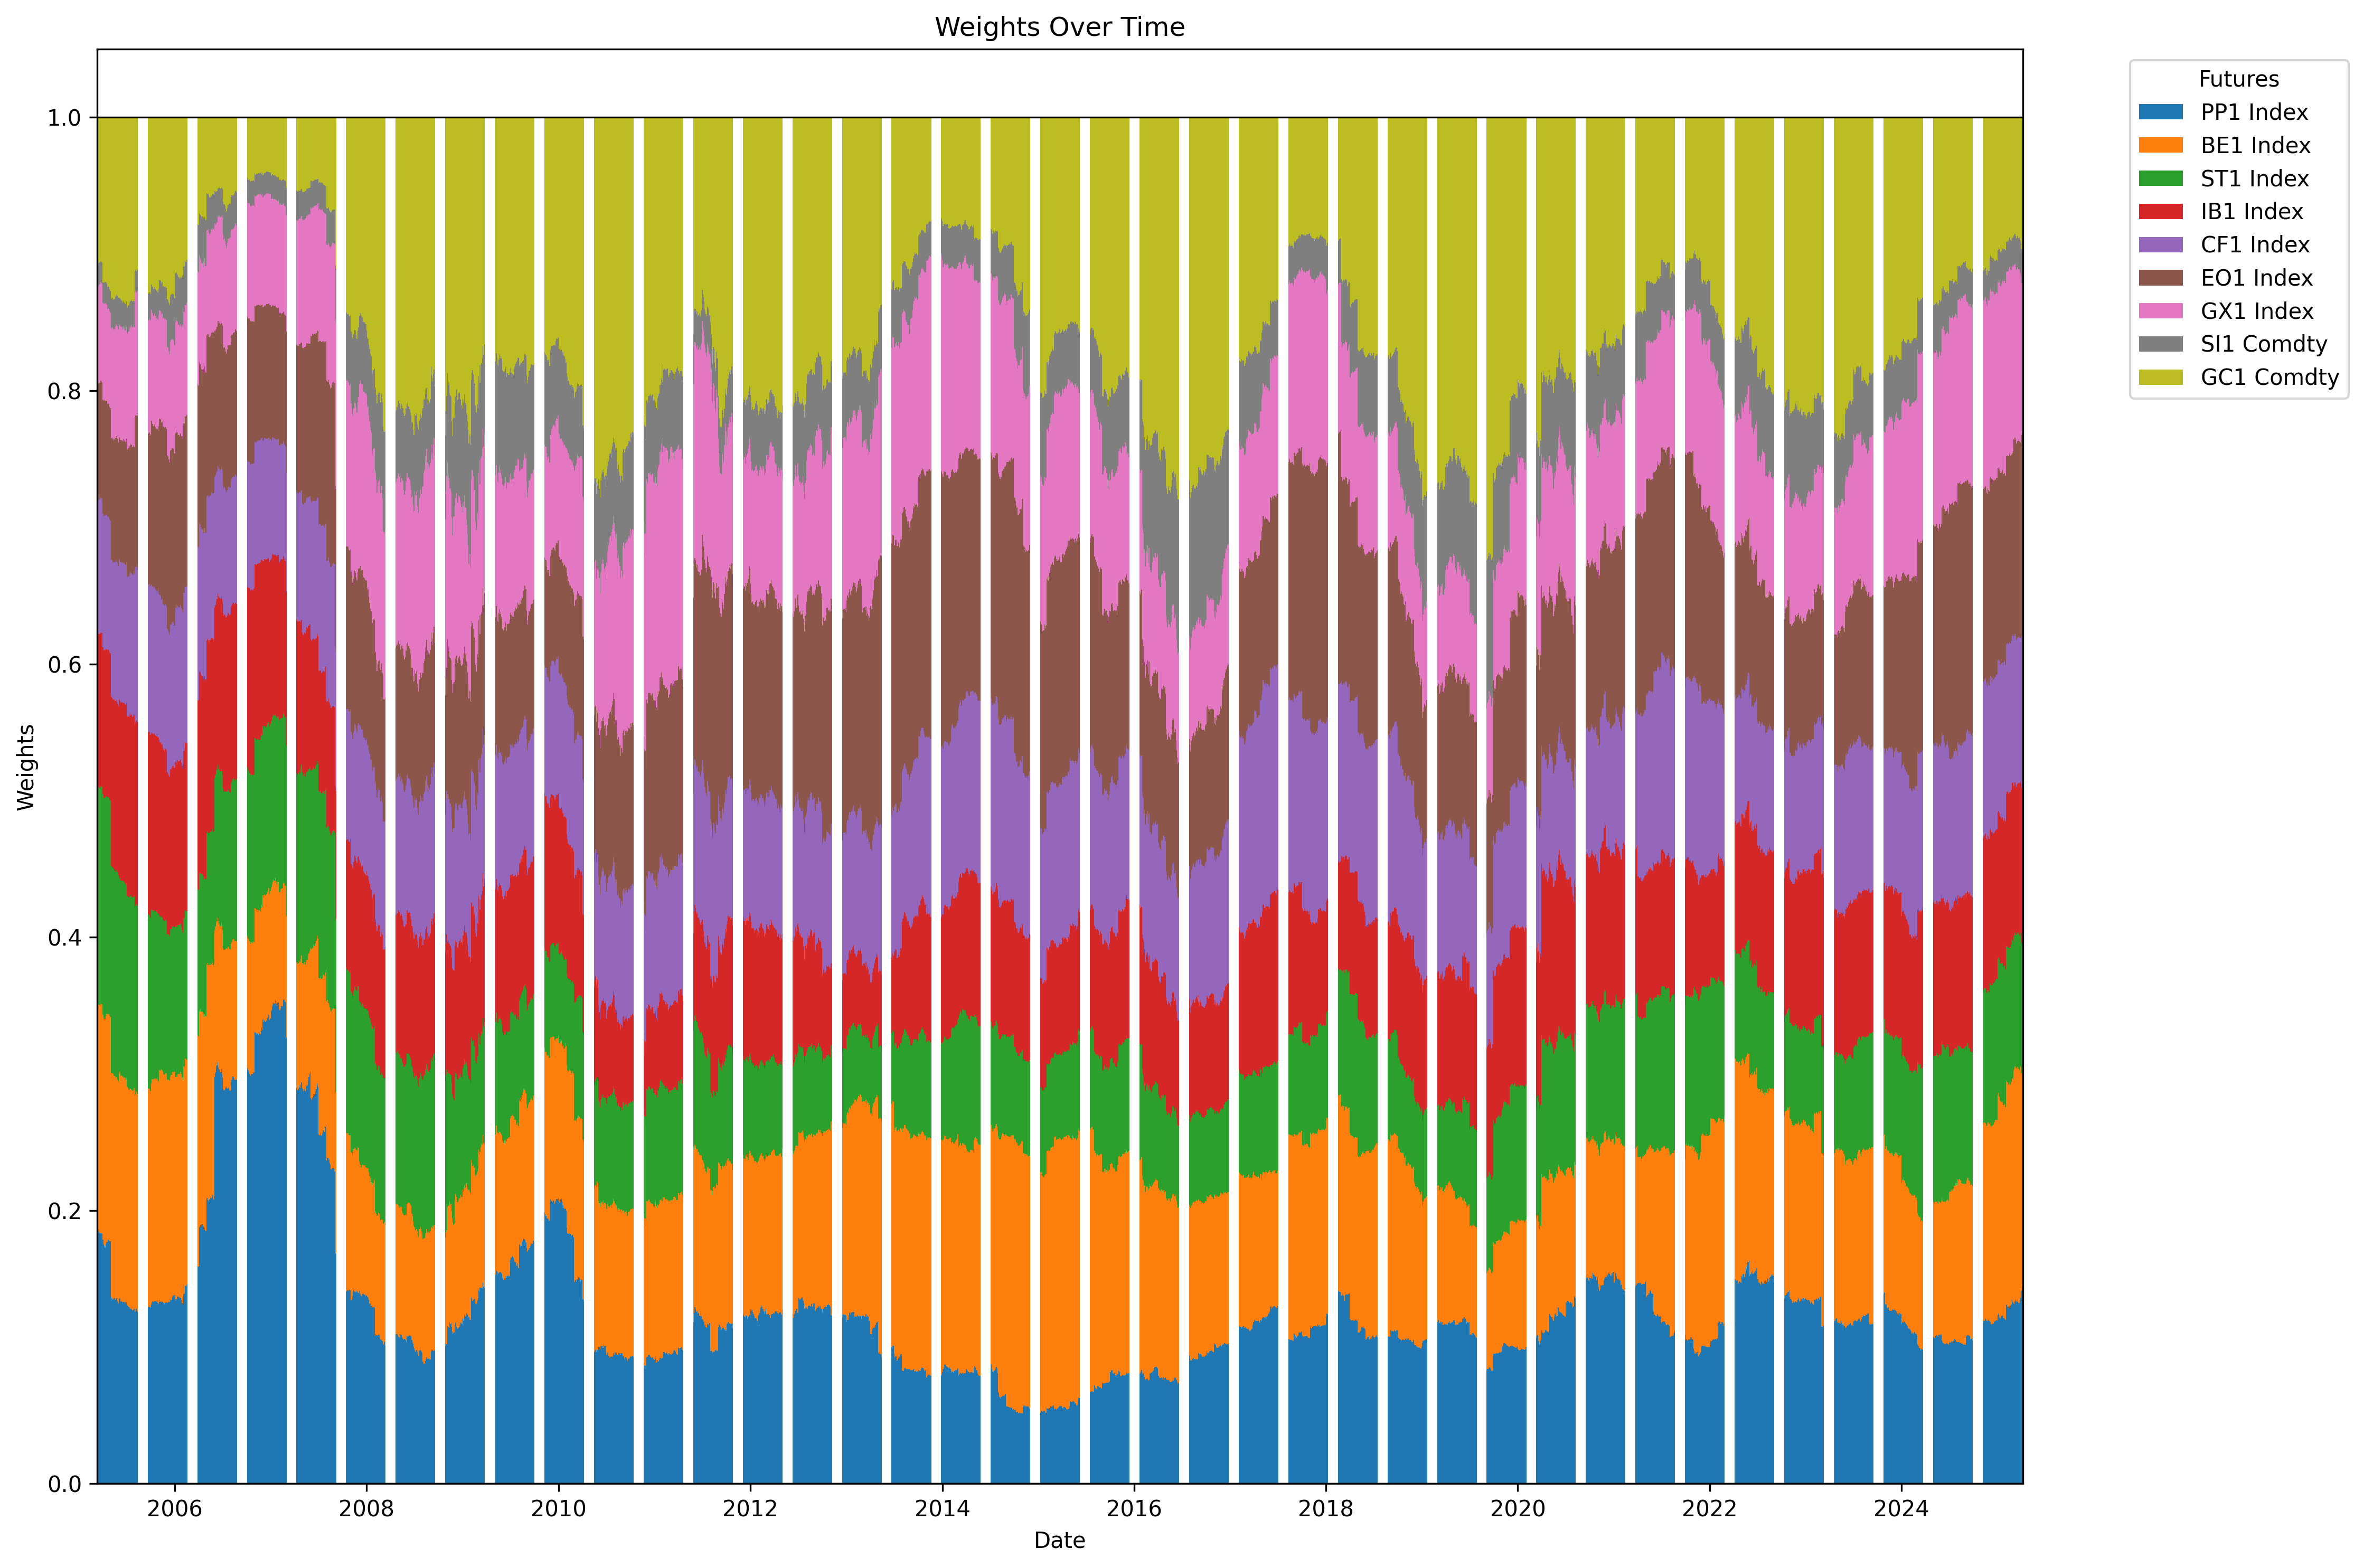

In [68]:
# Plotting weights
pb.plot_weights(sim_vol_1MREBAL_12MEST_DOWNVOL['Weights'], figsize=(15, 10))

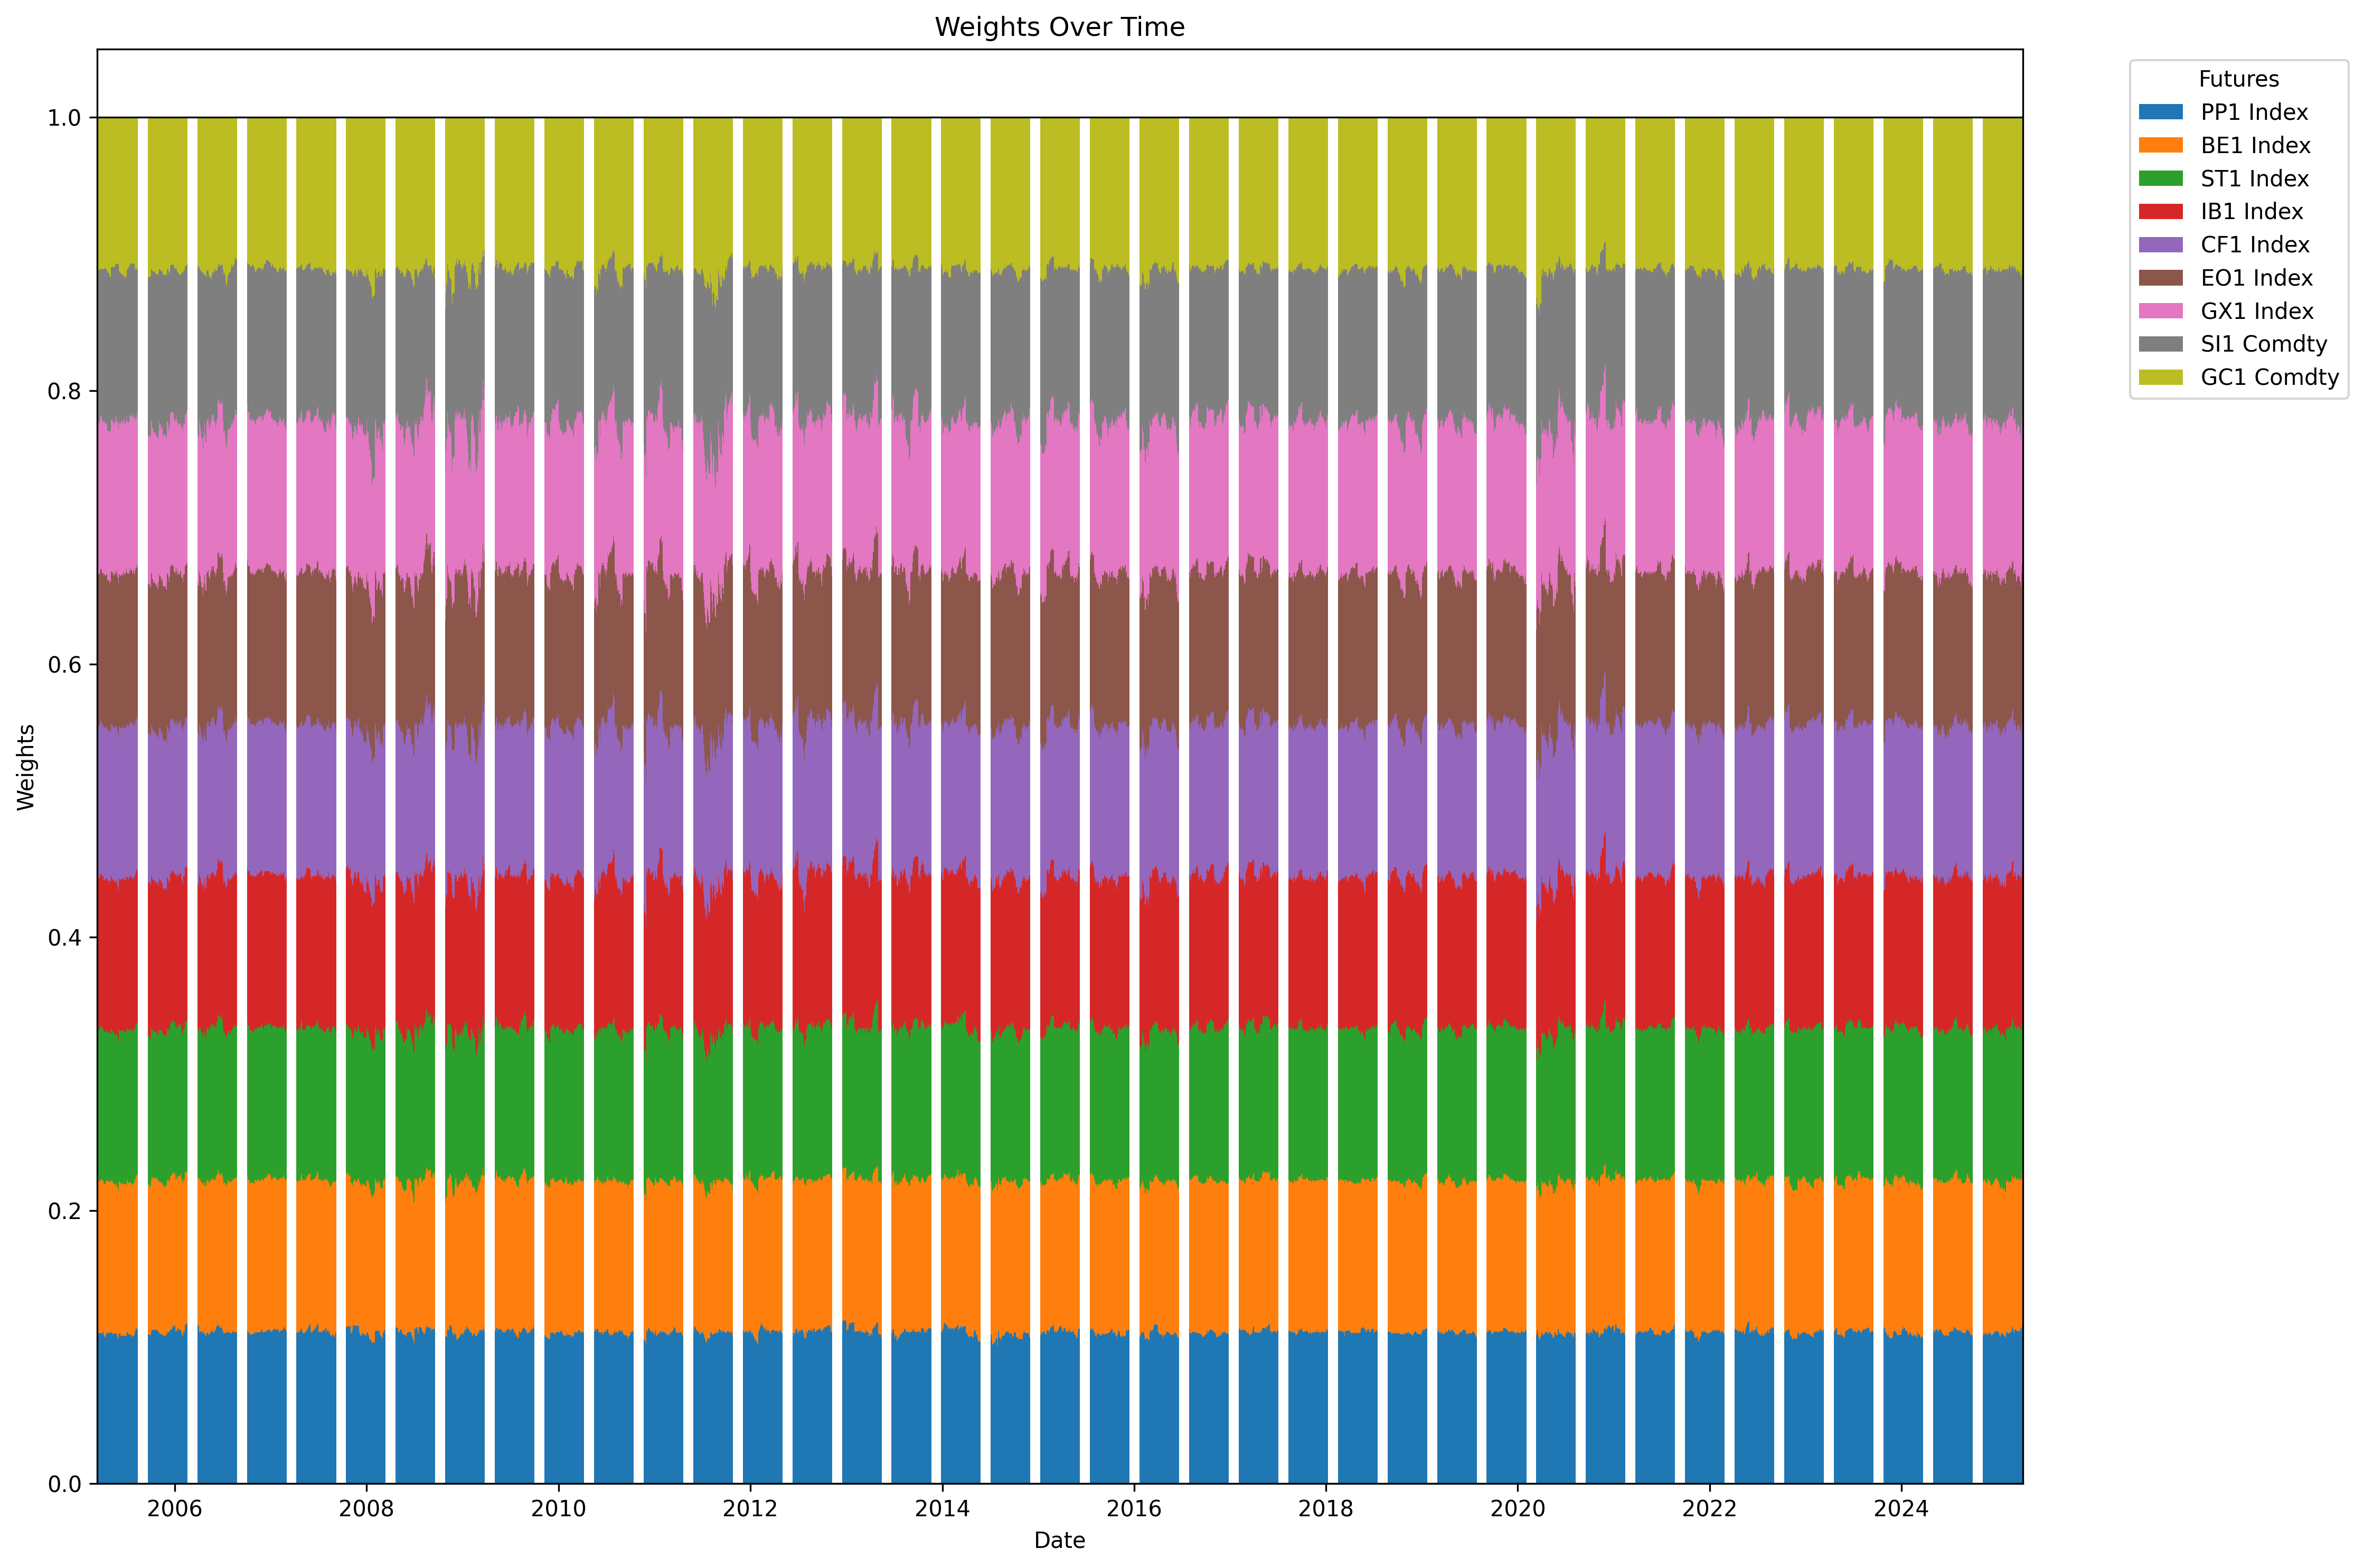

In [69]:
# Plotting weights
pb.plot_weights(sim_ew_1MREBAL['Weights'], figsize=(15, 10))

In [70]:
# Saving all the simulations
# Individually under outputs/strategies
for simulation in simulation_dict:
    with open(f'outputs/strategies/{simulation}.pkl', 'wb') as f:
        pickle.dump(simulation_dict[simulation], f)
        print(f"Simulation {simulation} saved successfully.")

Simulation sim_vol_1MREBAL_1MEST_NORMVOL saved successfully.
Simulation sim_vol_1MREBAL_3MEST_NORMVOL saved successfully.
Simulation sim_vol_1MREBAL_6MEST_NORMVOL saved successfully.
Simulation sim_vol_1MREBAL_12MEST_NORMVOL saved successfully.
Simulation sim_vol_1MREBAL_1MEST_DOWNVOL saved successfully.
Simulation sim_vol_1MREBAL_3MEST_DOWNVOL saved successfully.
Simulation sim_vol_1MREBAL_6MEST_DOWNVOL saved successfully.
Simulation sim_vol_1MREBAL_12MEST_DOWNVOL saved successfully.
Simulation sim_ew_1MREBAL saved successfully.


In [71]:
# Saving all the simulations all together
with open('outputs/strategies/simulations_all.pkl', 'wb') as f:
    pickle.dump(simulations, f)
    print("All simulations saved successfully.")

All simulations saved successfully.


In [85]:
print(sim_vol_1MREBAL_1MEST_NORMVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-14           0.066123               0.147202        0.4492   

            Sortino ratio  Maximum drawdown  
2005-03-14       0.550457          0.213172  


In [84]:
print(sim_vol_1MREBAL_3MEST_NORMVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-11           0.069158               0.148324      0.466266   

            Sortino ratio  Maximum drawdown  
2005-03-11       0.574856          0.202316  


In [83]:
print(sim_vol_1MREBAL_6MEST_NORMVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-14           0.068853               0.149238      0.461366   

            Sortino ratio  Maximum drawdown  
2005-03-14       0.570552          0.219714  


In [82]:
print(sim_vol_1MREBAL_12MEST_NORMVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-11            0.06596                 0.1496      0.440912   

            Sortino ratio  Maximum drawdown  
2005-03-11       0.547196          0.216893  


In [81]:
print(sim_vol_1MREBAL_1MEST_DOWNVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-14           0.066788               0.145878      0.457834   

            Sortino ratio  Maximum drawdown  
2005-03-14       0.566139          0.206777  


In [80]:
print(sim_vol_1MREBAL_3MEST_DOWNVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-11           0.068271               0.146132      0.467191   

            Sortino ratio  Maximum drawdown  
2005-03-11       0.575277          0.196463  


In [86]:
print(sim_vol_1MREBAL_6MEST_DOWNVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-14           0.070033               0.146705      0.477372   

            Sortino ratio  Maximum drawdown  
2005-03-14       0.591137          0.215691  


In [87]:
print(sim_vol_1MREBAL_12MEST_DOWNVOL['Performance'])

            Annualized return  Annualized volatility  Sharpe ratio  \
2005-03-11           0.067635               0.146931      0.460317   

            Sortino ratio  Maximum drawdown  
2005-03-11       0.572879          0.210163  
